<a href="https://colab.research.google.com/github/dagbolade/PL_prediction/blob/mine/Soccer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load the data**

In [1]:
import os
import pandas as pd

def load_football_data(folder_path):
    datasets = {}
    for filename in os.listdir(folder_path):
        if filename.endswith('.csv'):
            file_path = os.path.join(folder_path, filename)
            dataset_name = os.path.splitext(filename)[0]
            try:
                df = pd.read_csv(file_path)
                datasets[dataset_name] = df
                print(f"Loaded {dataset_name}:")
                print(f"  Shape: {df.shape}")
                print(f"  Columns: {', '.join(df.columns)}")
                print(f"  First few rows:")
                print(df.head())
                print("\n" + "="*50 + "\n")
            except Exception as e:
                print(f"Error loading {filename}: {str(e)}")
    return datasets

# Folder path
folder_path = 'data'

# Load the datasets
football_datasets = load_football_data(folder_path)

print(f"Total number of datasets loaded: {len(football_datasets)}")
print("Available datasets:")
for dataset_name in football_datasets.keys():
    print(f"- {dataset_name}")

Loaded B1:
  Shape: (312, 119)
  Columns: Div, Date, Time, HomeTeam, AwayTeam, FTHG, FTAG, FTR, HTHG, HTAG, HTR, HS, AS, HST, AST, HF, AF, HC, AC, HY, AY, HR, AR, B365H, B365D, B365A, BWH, BWD, BWA, BFH, BFD, BFA, PSH, PSD, PSA, WHH, WHD, WHA, 1XBH, 1XBD, 1XBA, MaxH, MaxD, MaxA, AvgH, AvgD, AvgA, BFEH, BFED, BFEA, B365>2.5, B365<2.5, P>2.5, P<2.5, Max>2.5, Max<2.5, Avg>2.5, Avg<2.5, BFE>2.5, BFE<2.5, AHh, B365AHH, B365AHA, PAHH, PAHA, MaxAHH, MaxAHA, AvgAHH, AvgAHA, BFEAHH, BFEAHA, B365CH, B365CD, B365CA, BWCH, BWCD, BWCA, BFCH, BFCD, BFCA, PSCH, PSCD, PSCA, WHCH, WHCD, WHCA, 1XBCH, 1XBCD, 1XBCA, MaxCH, MaxCD, MaxCA, AvgCH, AvgCD, AvgCA, BFECH, BFECD, BFECA, B365C>2.5, B365C<2.5, PC>2.5, PC<2.5, MaxC>2.5, MaxC<2.5, AvgC>2.5, AvgC<2.5, BFEC>2.5, BFEC<2.5, AHCh, B365CAHH, B365CAHA, PCAHH, PCAHA, MaxCAHH, MaxCAHA, AvgCAHH, AvgCAHA, BFECAHH, BFECAHA
  First few rows:
  Div        Date   Time      HomeTeam             AwayTeam  FTHG  FTAG FTR  \
0  B1  27/07/2024  19:45    Anderlecht       

**Time Conversion**

In [2]:
def convert_datetime(df):
    if 'Date' in df.columns and 'Time' in df.columns:
        df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M', errors='coerce')
        df.drop(['Date', 'Time'], axis=1, inplace=True)
    elif 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')
    return df

# Convert datetime for all datasets
for name, df in football_datasets.items():
    football_datasets[name] = convert_datetime(df)
    print(f"Converted datetime for {name}")
    if 'DateTime' in df.columns:
        print(f"  Date range: {df['DateTime'].min()} to {df['DateTime'].max()}")
    elif 'Date' in df.columns:
        print(f"  Date range: {df['Date'].min()} to {df['Date'].max()}")
    print()

print("Datetime conversion completed for all datasets.")

Converted datetime for B1
  Date range: 2024-07-26 19:45:00 to 2024-09-01 18:15:00

Converted datetime for E3_1
  Date range: 2023-08-05 15:00:00 to 2024-04-27 15:00:00

Converted datetime for E3
  Date range: 2024-08-09 20:00:00 to 2024-09-02 20:00:00

Converted datetime for P1_1
  Date range: 2023-08-11 20:15:00 to 2024-05-18 20:30:00

Converted datetime for F2
  Date range: 2024-08-16 19:00:00 to 2024-08-31 13:30:00

Converted datetime for SWZ
  Date range: 2012-07-13 18:45:00 to 2024-09-01 15:30:00

Converted datetime for D1
  Date range: 2024-08-23 19:30:00 to 2024-09-01 16:30:00

Converted datetime for SC0_1
  Date range: 2023-08-05 12:30:00 to 2024-05-19 15:00:00

Converted datetime for SP1_1
  Date range: 2023-08-11 18:30:00 to 2024-05-26 20:00:00

Converted datetime for ARG
  Date range: 2012-08-03 23:00:00 to 2024-09-02 23:00:00

Converted datetime for SC1
  Date range: 2024-08-02 19:45:00 to 2024-08-31 15:00:00

Converted datetime for POL
  Date range: 2012-08-17 17:00:00 to

**Data analysis**



Analyzing dataset: B1
Original shape: (312, 118)

B1: Descriptive statistics for Total Goals
count    46.000000
mean      2.695652
std       2.158905
min       0.000000
25%       1.000000
50%       2.000000
75%       4.000000
max       7.000000
Name: TotalGoals, dtype: float64


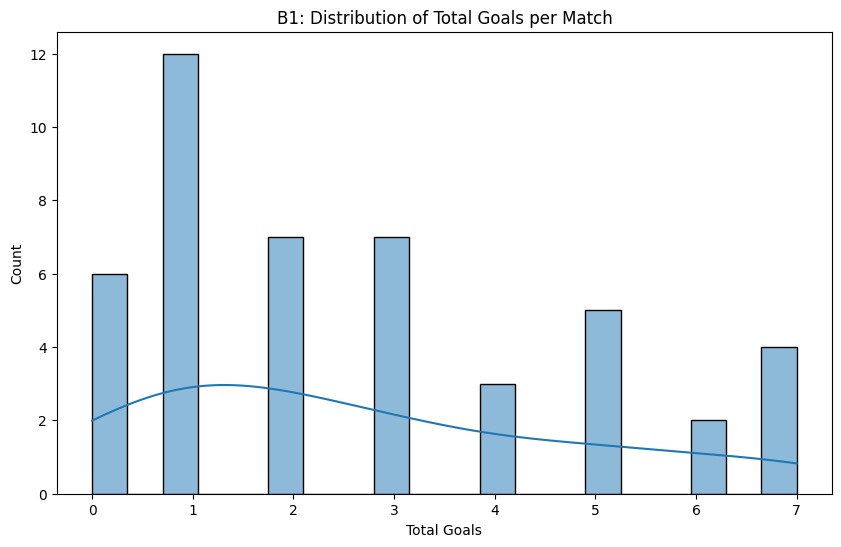


B1: Match Result Counts
Result
H    21
D    13
A    12
Name: count, dtype: int64


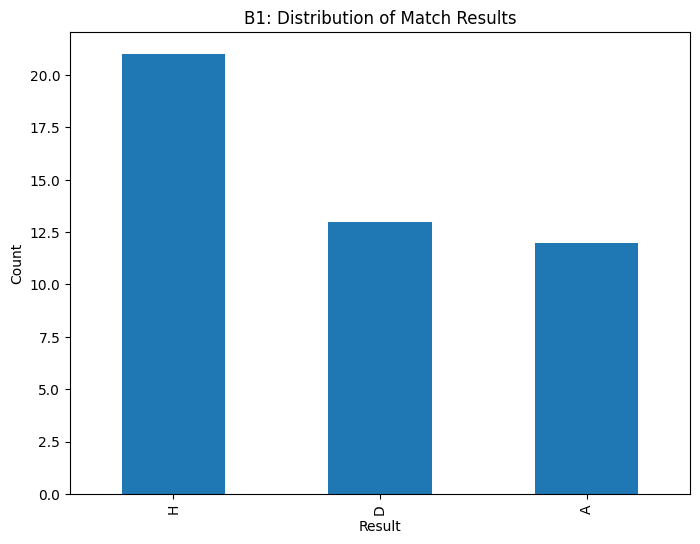


B1: Home Win Percentage: 6.73%

B1: Missing values
Div           266
Home          266
Away          266
HG            266
AG            266
             ... 
AvgCAHA       266
BFECAHH       266
BFECAHA       266
DateTime      266
TotalGoals    266
Length: 119, dtype: int64


Analyzing dataset: E3_1
Original shape: (552, 105)

E3_1: Descriptive statistics for Total Goals
count    552.000000
mean       2.980072
std        1.794719
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       11.000000
Name: TotalGoals, dtype: float64


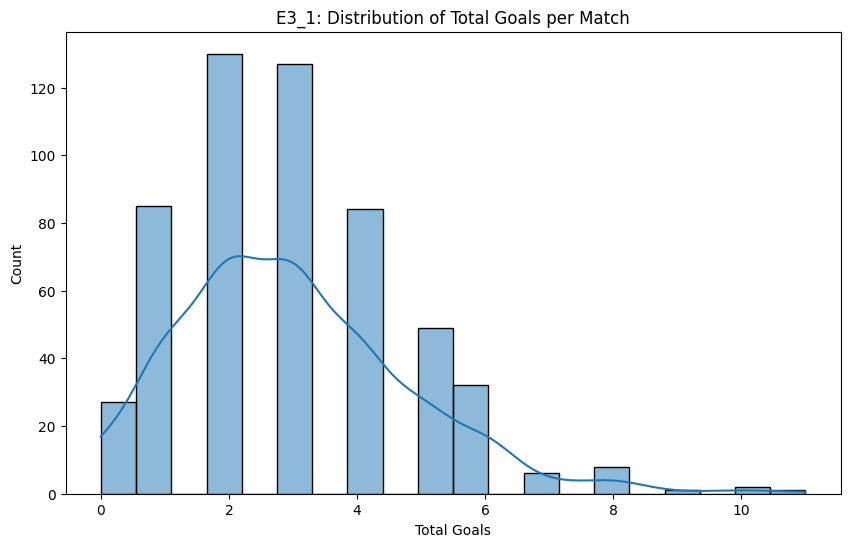


E3_1: Match Result Counts
Result
H    248
A    173
D    131
Name: count, dtype: int64


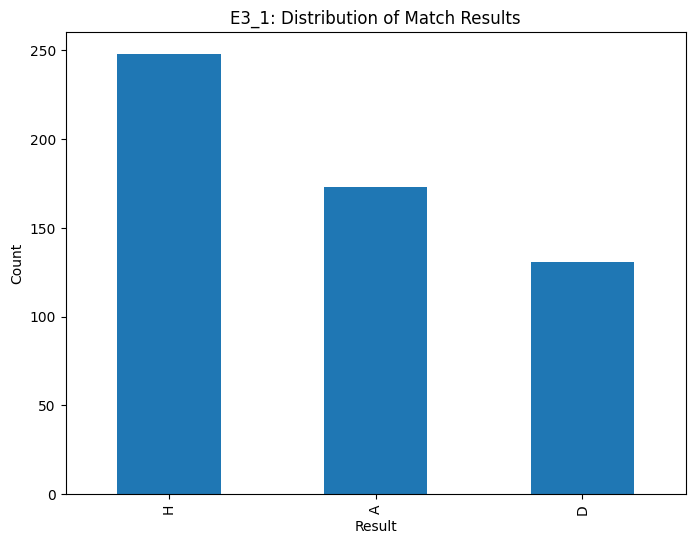


E3_1: Home Win Percentage: 44.93%

E3_1: Missing values
BWH      15
BWD      15
BWA      15
IWH     250
IWD     250
IWA     250
BWCH     14
BWCD     14
BWCA     14
IWCH    250
IWCD    250
IWCA    250
dtype: int64


Analyzing dataset: E3
Original shape: (48, 119)

E3: Descriptive statistics for Total Goals
count    48.000000
mean      2.500000
std       1.774524
min       0.000000
25%       1.000000
50%       2.000000
75%       4.000000
max       6.000000
Name: TotalGoals, dtype: float64


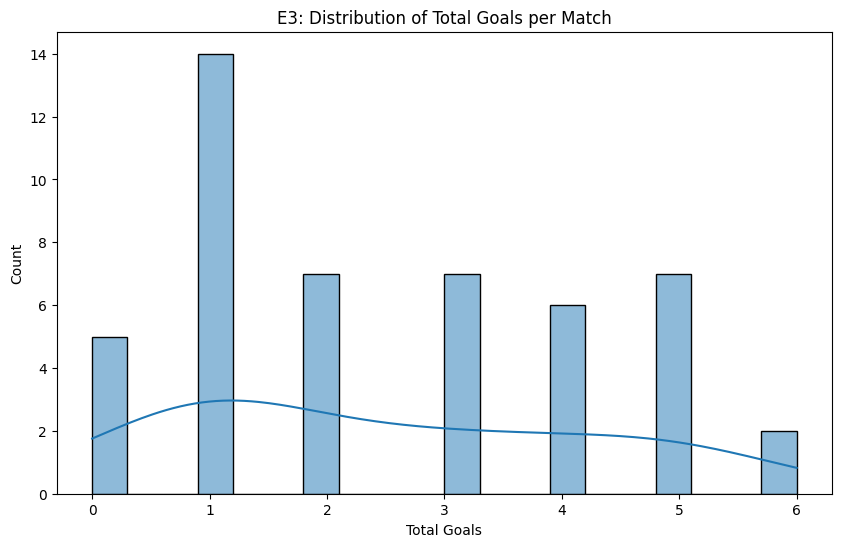


E3: Match Result Counts
Result
H    24
A    14
D    10
Name: count, dtype: int64


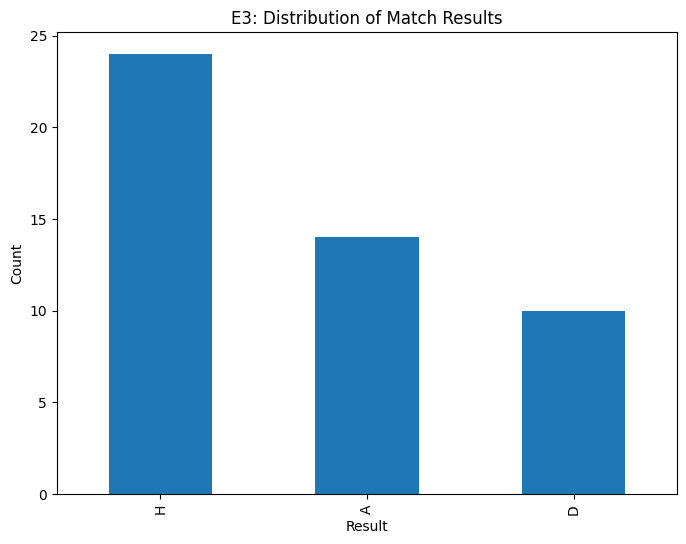


E3: Home Win Percentage: 50.00%

E3: Missing values
BFE>2.5    6
BFE<2.5    6
BFEAHH     2
BFEAHA     2
dtype: int64


Analyzing dataset: P1_1
Original shape: (306, 104)

P1_1: Descriptive statistics for Total Goals
count    306.000000
mean       2.866013
std        1.734422
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        8.000000
Name: TotalGoals, dtype: float64


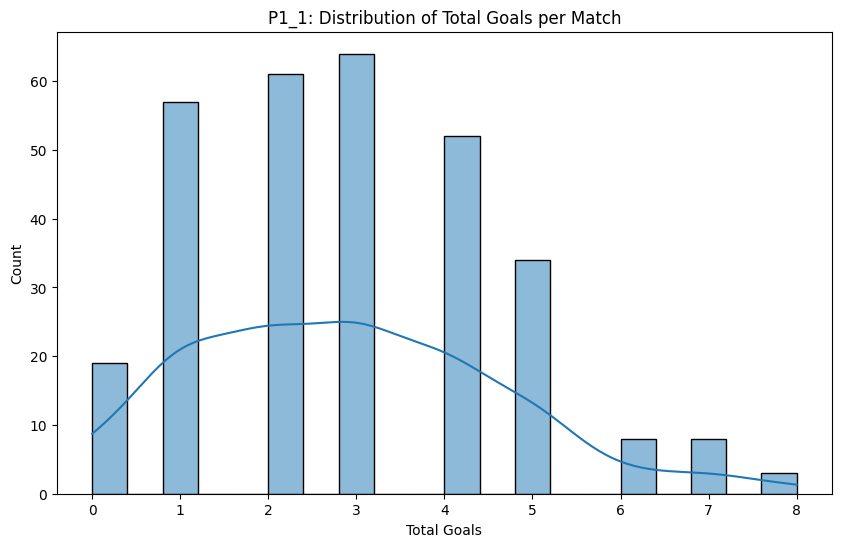


P1_1: Match Result Counts
Result
H    133
A     98
D     75
Name: count, dtype: int64


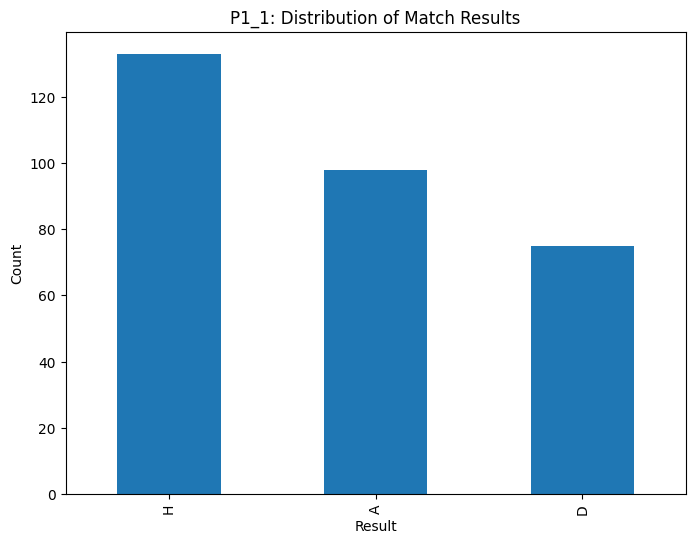


P1_1: Home Win Percentage: 43.46%

P1_1: Missing values
BWH        8
BWD        8
BWA        8
IWH      171
IWD      171
IWA      171
PSH        1
PSD        1
PSA        1
WHH        1
WHD        1
WHA        1
VCH        1
VCD        1
VCA        1
P>2.5      1
P<2.5      1
PAHH       1
PAHA       1
BWCH       7
BWCD       7
BWCA       7
IWCH     171
IWCD     171
IWCA     171
dtype: int64


Analyzing dataset: F2
Original shape: (27, 118)

F2: Descriptive statistics for Total Goals
count    27.000000
mean      2.370370
std       1.667521
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       7.000000
Name: TotalGoals, dtype: float64


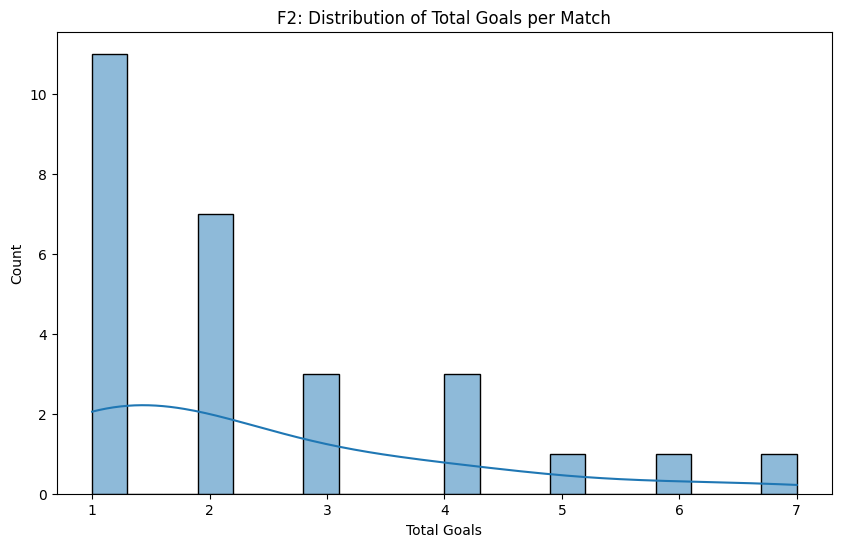


F2: Match Result Counts
Result
H    12
A    10
D     5
Name: count, dtype: int64


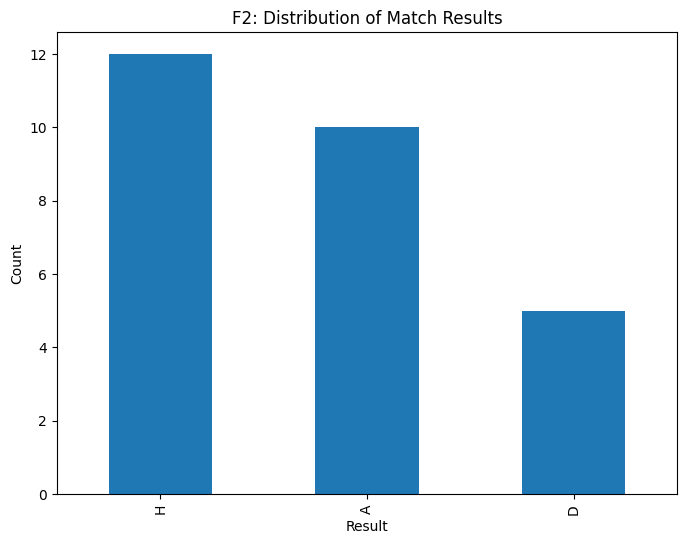


F2: Home Win Percentage: 44.44%

F2: Missing values
BFE>2.5    3
BFE<2.5    3
BFEAHH     2
BFEAHA     2
dtype: int64


Analyzing dataset: SWZ
Original shape: (2253, 21)

SWZ: Descriptive statistics for Total Goals
count    2253.000000
mean        2.978695
std         1.693024
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         9.000000
Name: TotalGoals, dtype: float64


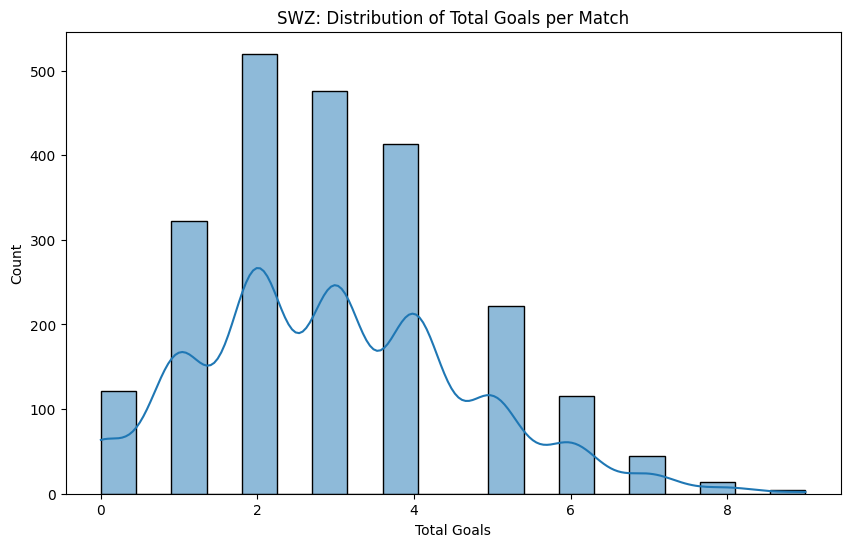


SWZ: Match Result Counts
Result
H    980
A    697
D    576
Name: count, dtype: int64


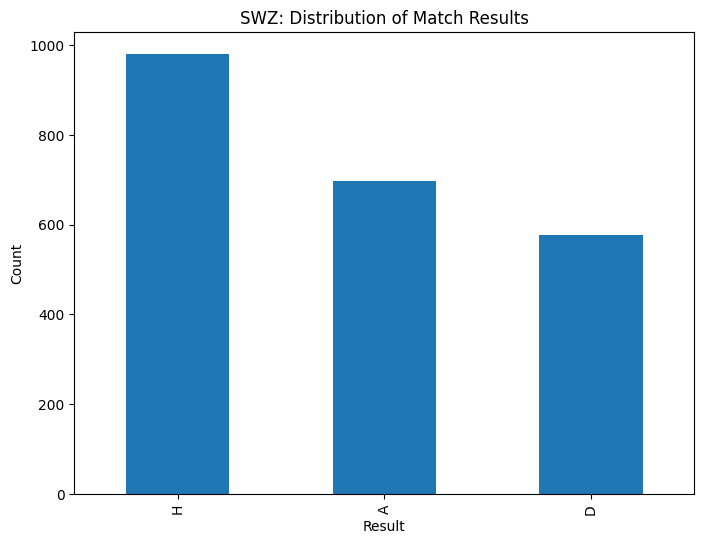


SWZ: Home Win Percentage: 43.50%

SWZ: Missing values
PSCH        3
PSCD        3
PSCA        3
MaxCH       1
MaxCD       1
MaxCA       1
AvgCH       1
AvgCD       1
AvgCA       1
BFECH    2219
BFECD    2219
BFECA    2219
dtype: int64


Analyzing dataset: D1
Original shape: (18, 118)

D1: Descriptive statistics for Total Goals
count    18.000000
mean      3.111111
std       1.745208
min       0.000000
25%       2.000000
50%       3.000000
75%       4.750000
max       6.000000
Name: TotalGoals, dtype: float64


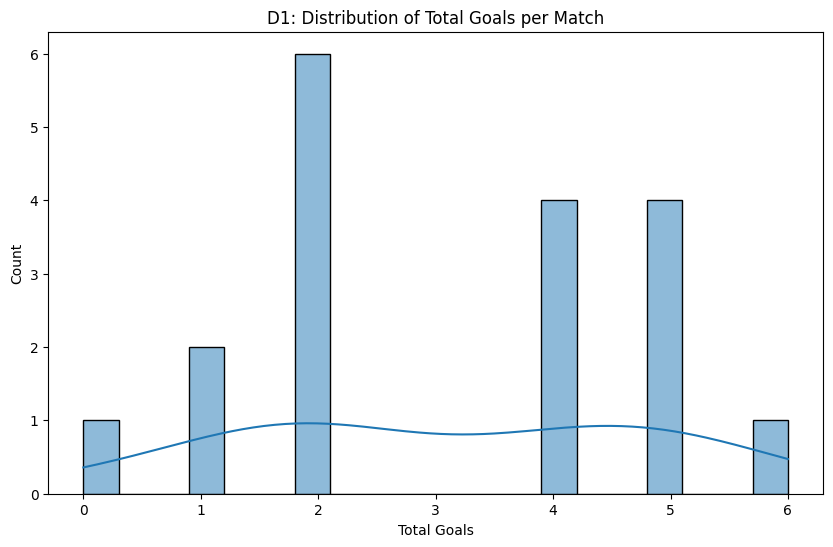


D1: Match Result Counts
Result
H    8
A    6
D    4
Name: count, dtype: int64


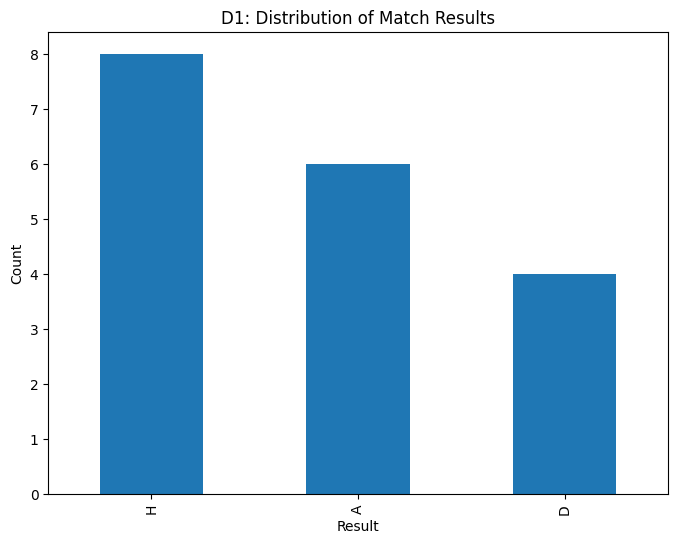


D1: Home Win Percentage: 44.44%

D1: Missing values
P>2.5      1
P<2.5      1
BFE>2.5    4
BFE<2.5    4
PC>2.5     1
PC<2.5     1
dtype: int64


Analyzing dataset: SC0_1
Original shape: (228, 105)

SC0_1: Descriptive statistics for Total Goals
count    228.000000
mean       2.758772
std        1.611813
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        8.000000
Name: TotalGoals, dtype: float64


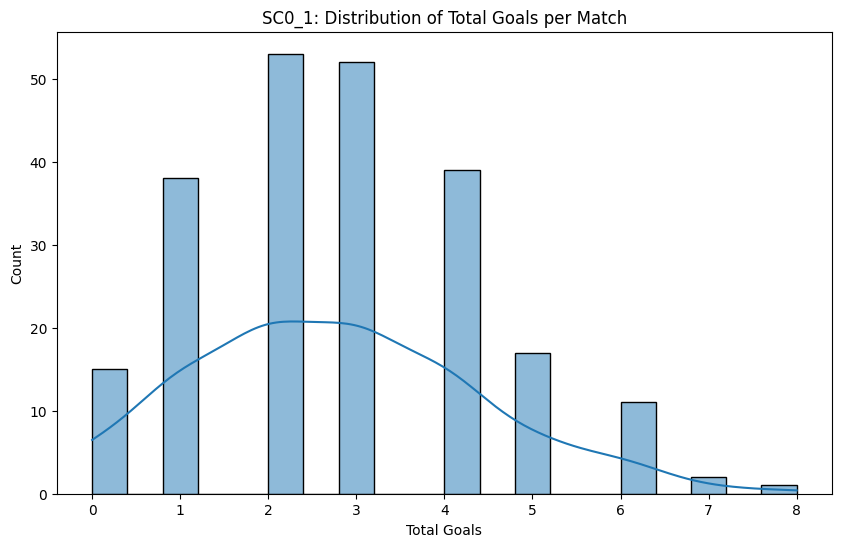


SC0_1: Match Result Counts
Result
H    98
A    69
D    61
Name: count, dtype: int64


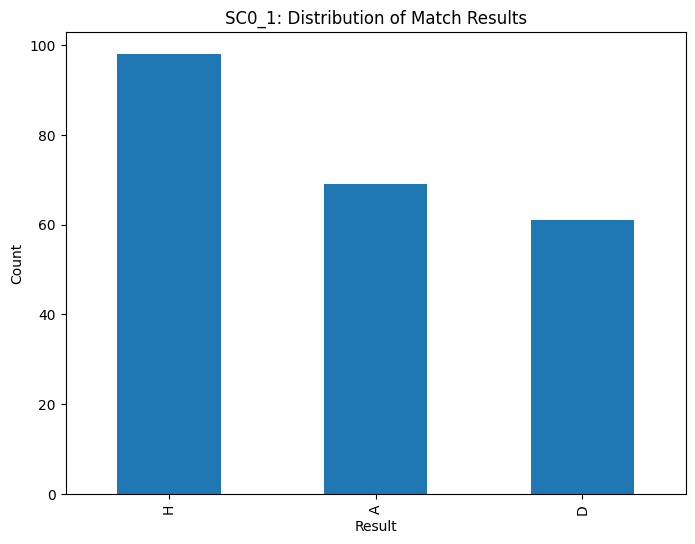


SC0_1: Home Win Percentage: 42.98%

SC0_1: Missing values
BWH       7
BWD       7
BWA       7
IWH     106
IWD     106
IWA     106
BWCH      7
BWCD      7
BWCA      7
IWCH    106
IWCD    106
IWCA    106
dtype: int64


Analyzing dataset: SP1_1
Original shape: (380, 104)

SP1_1: Descriptive statistics for Total Goals
count    380.000000
mean       2.644737
std        1.772734
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max        8.000000
Name: TotalGoals, dtype: float64


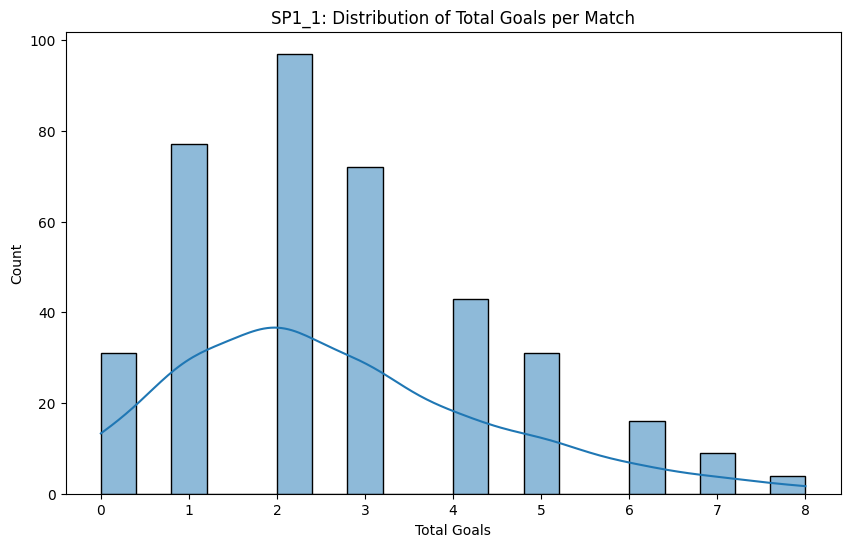


SP1_1: Match Result Counts
Result
H    167
D    107
A    106
Name: count, dtype: int64


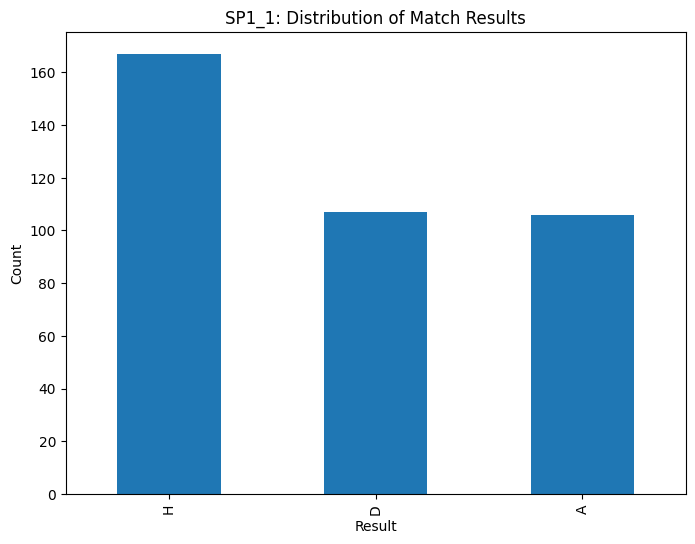


SP1_1: Home Win Percentage: 43.95%

SP1_1: Missing values
BWH       10
BWD       10
BWA       10
IWH      190
IWD      190
IWA      190
P>2.5      1
P<2.5      1
BWCH       8
BWCD       8
BWCA       8
IWCH     193
IWCD     193
IWCA     193
dtype: int64


Analyzing dataset: ARG
Original shape: (5274, 21)

ARG: Descriptive statistics for Total Goals
count    5274.000000
mean        2.269056
std         1.544781
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         9.000000
Name: TotalGoals, dtype: float64


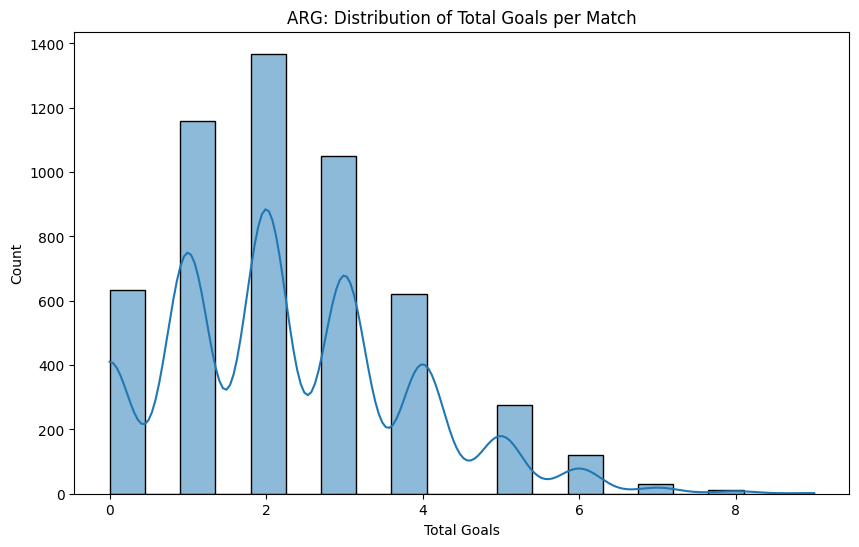


ARG: Match Result Counts
Result
H    2286
D    1578
A    1410
Name: count, dtype: int64


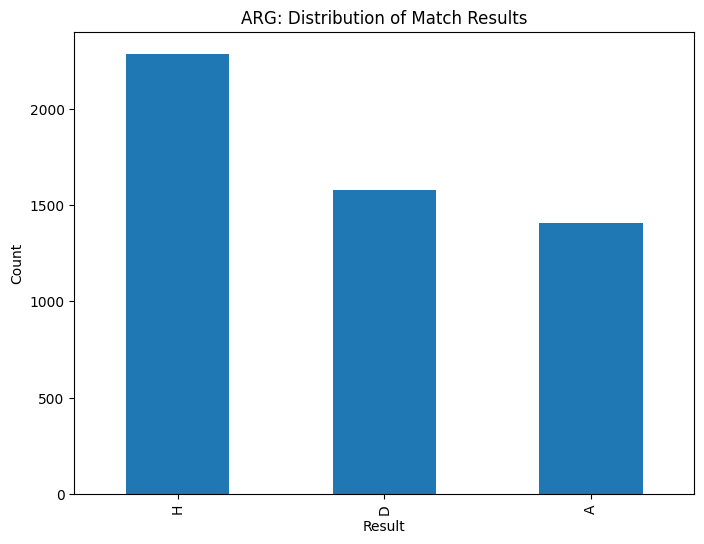


ARG: Home Win Percentage: 43.34%

ARG: Missing values
PSCH        7
PSCD        7
PSCA        7
BFECH    5162
BFECD    5162
BFECA    5162
dtype: int64


Analyzing dataset: SC1
Original shape: (21, 119)

SC1: Descriptive statistics for Total Goals
count    21.000000
mean      2.285714
std       1.488048
min       0.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       5.000000
Name: TotalGoals, dtype: float64


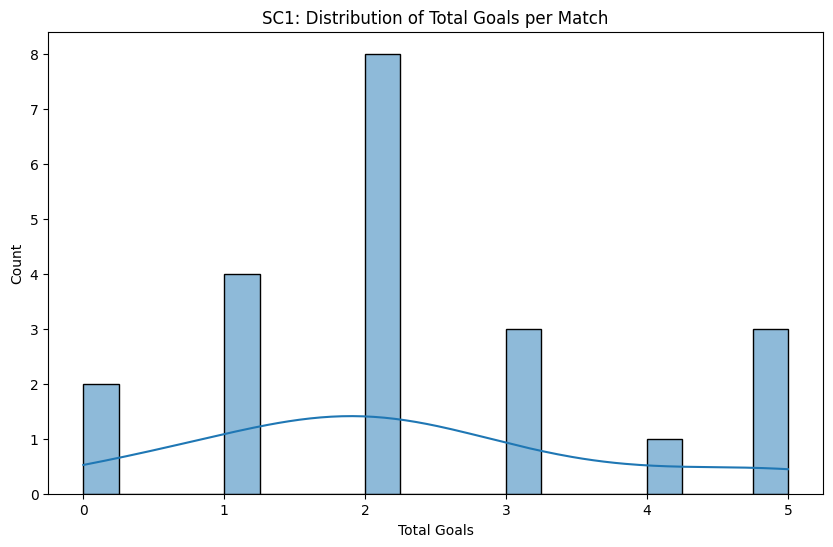


SC1: Match Result Counts
Result
H    10
D     6
A     5
Name: count, dtype: int64


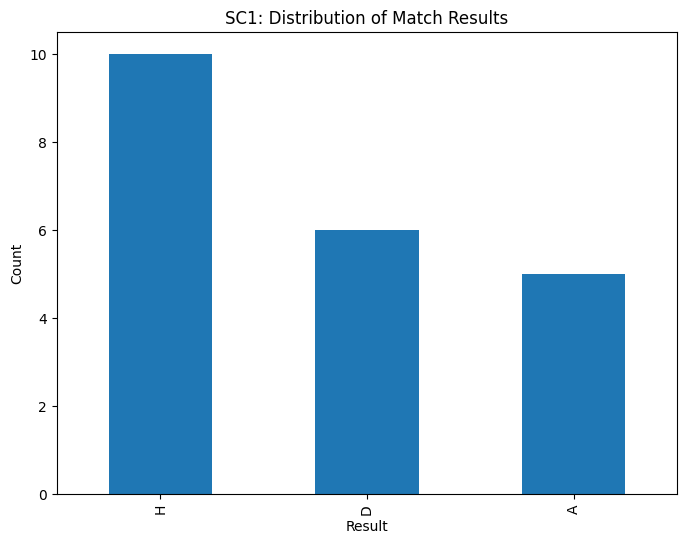


SC1: Home Win Percentage: 47.62%

SC1: Missing values
BFE>2.5    3
BFE<2.5    3
dtype: int64


Analyzing dataset: POL
Original shape: (3531, 21)

POL: Descriptive statistics for Total Goals
count    3531.000000
mean        2.627018
std         1.616994
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: TotalGoals, dtype: float64


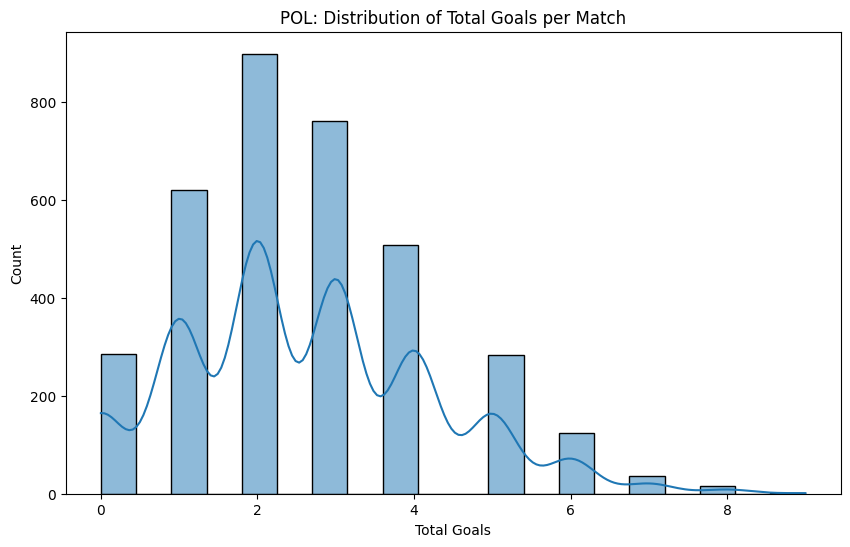


POL: Match Result Counts
Result
H    1545
A    1024
D     962
Name: count, dtype: int64


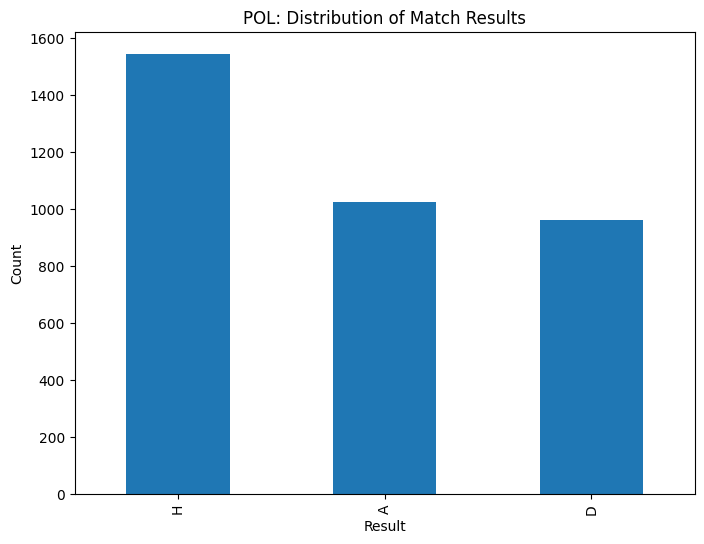


POL: Home Win Percentage: 43.76%

POL: Missing values
PSCH        1
PSCD        1
PSCA        1
BFECH    3470
BFECD    3470
BFECA    3470
dtype: int64


Analyzing dataset: F2_1
Original shape: (379, 104)

F2_1: Descriptive statistics for Total Goals
count    379.000000
mean       2.459103
std        1.647602
min        0.000000
25%        1.000000
50%        2.000000
75%        3.500000
max        8.000000
Name: TotalGoals, dtype: float64


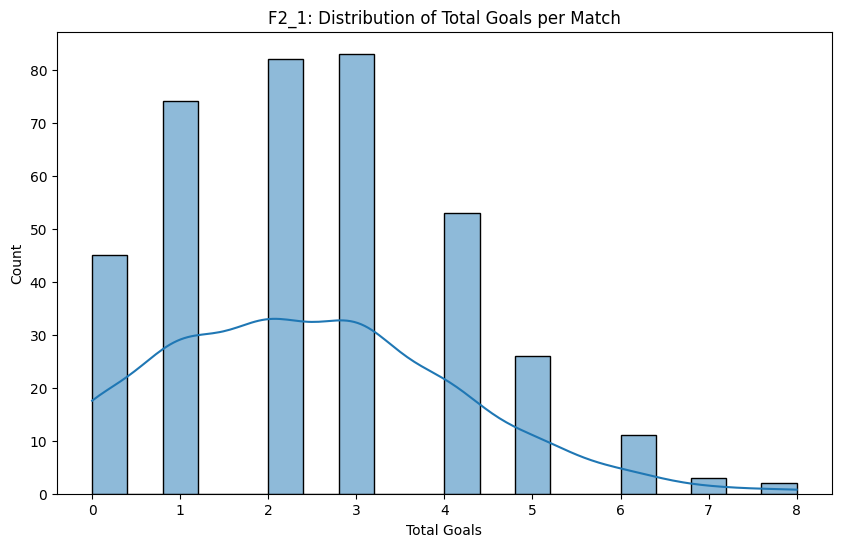


F2_1: Match Result Counts
Result
H    153
A    117
D    109
Name: count, dtype: int64


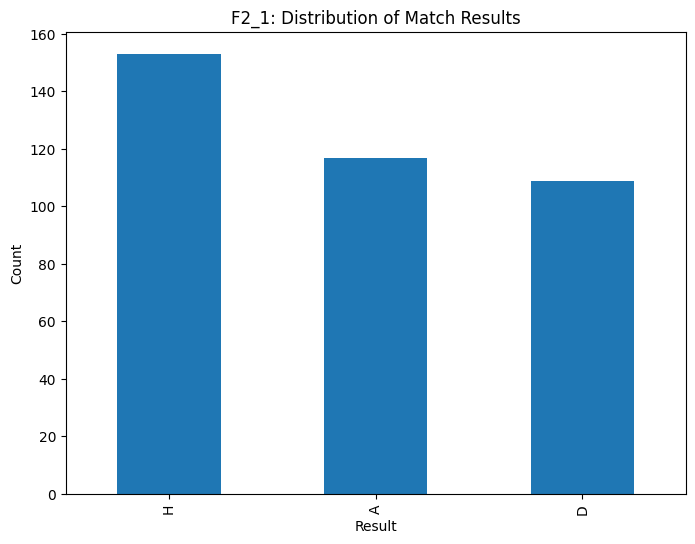


F2_1: Home Win Percentage: 40.37%

F2_1: Missing values
B365H         1
B365D         1
B365A         1
BWH          12
BWD          12
BWA          12
IWH         189
IWD         189
IWA         189
WHH           1
WHD           1
WHA           1
VCH          23
VCD          23
VCA          23
B365>2.5      2
B365<2.5      2
B365AHH       2
B365AHA       2
BWCH         11
BWCD         11
BWCA         11
IWCH        189
IWCD        189
IWCA        189
WHCH          1
WHCD          1
WHCA          1
VCCH          3
VCCD          3
VCCA          3
dtype: int64


Analyzing dataset: G1
Original shape: (21, 118)

G1: Descriptive statistics for Total Goals
count    21.000000
mean      2.285714
std       1.230563
min       0.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       5.000000
Name: TotalGoals, dtype: float64


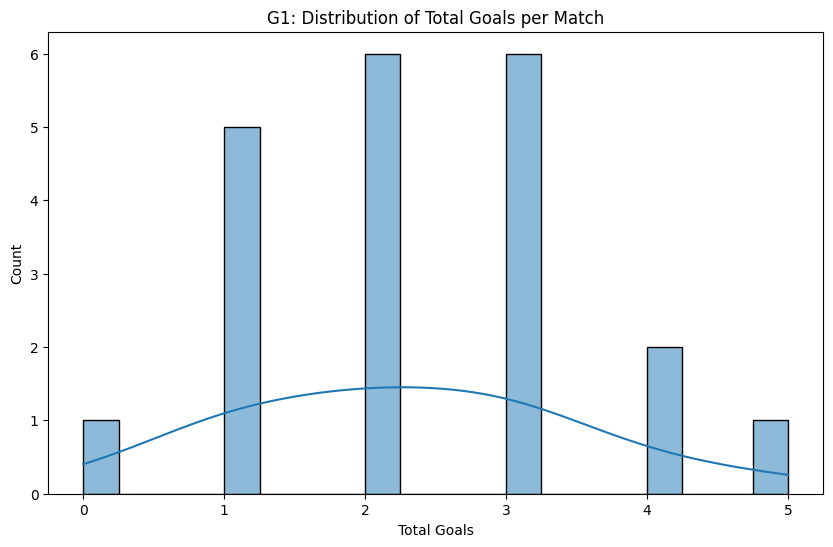


G1: Match Result Counts
Result
A    9
H    6
D    6
Name: count, dtype: int64


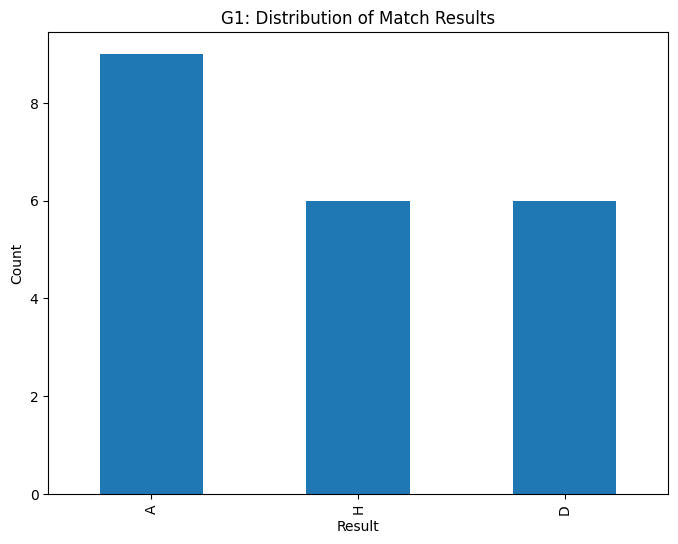


G1: Home Win Percentage: 28.57%

G1: Missing values
BFEH       1
BFED       1
BFEA       1
BFE>2.5    8
BFE<2.5    8
BFEAHH     4
BFEAHA     4
dtype: int64


Analyzing dataset: N1
Original shape: (33, 118)

N1: Descriptive statistics for Total Goals
count    33.000000
mean      2.696970
std       1.704495
min       0.000000
25%       2.000000
50%       3.000000
75%       3.000000
max       8.000000
Name: TotalGoals, dtype: float64


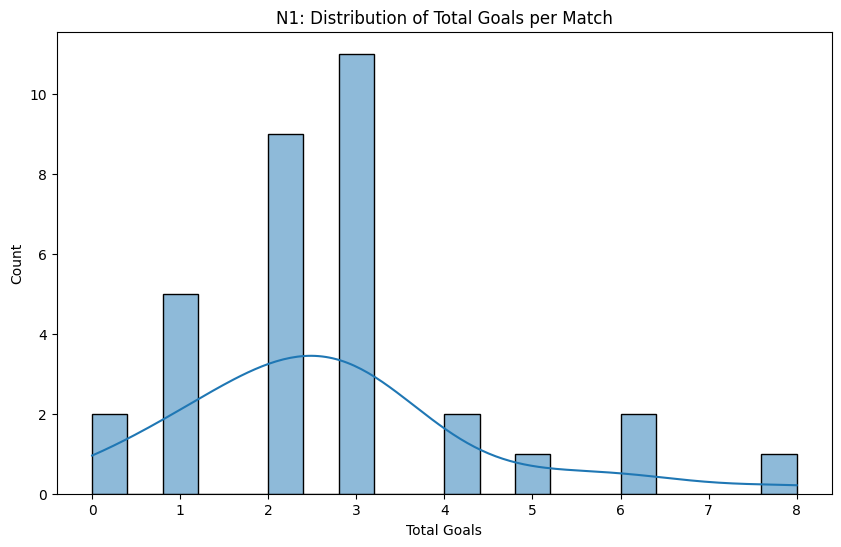


N1: Match Result Counts
Result
H    14
A    11
D     8
Name: count, dtype: int64


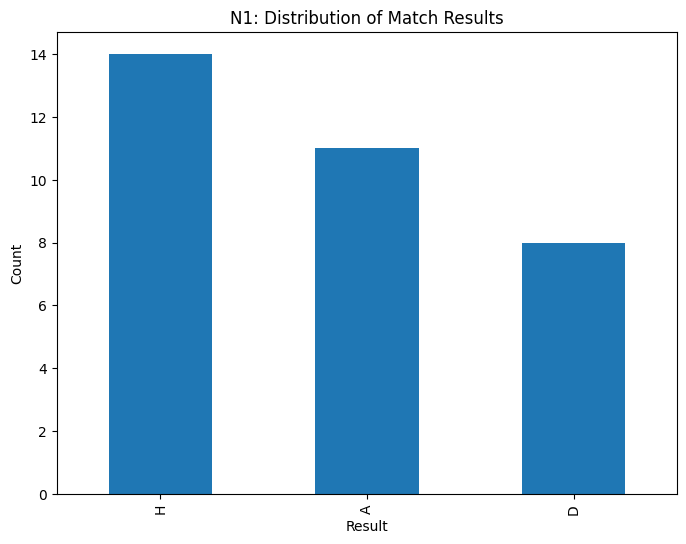


N1: Home Win Percentage: 42.42%

N1: Missing values
BFE>2.5    3
BFE<2.5    3
BFEAHH     6
BFEAHA     6
dtype: int64


Analyzing dataset: EC_1
Original shape: (552, 97)

EC_1: Descriptive statistics for Total Goals
count    552.000000
mean       2.940217
std        1.728919
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        8.000000
Name: TotalGoals, dtype: float64


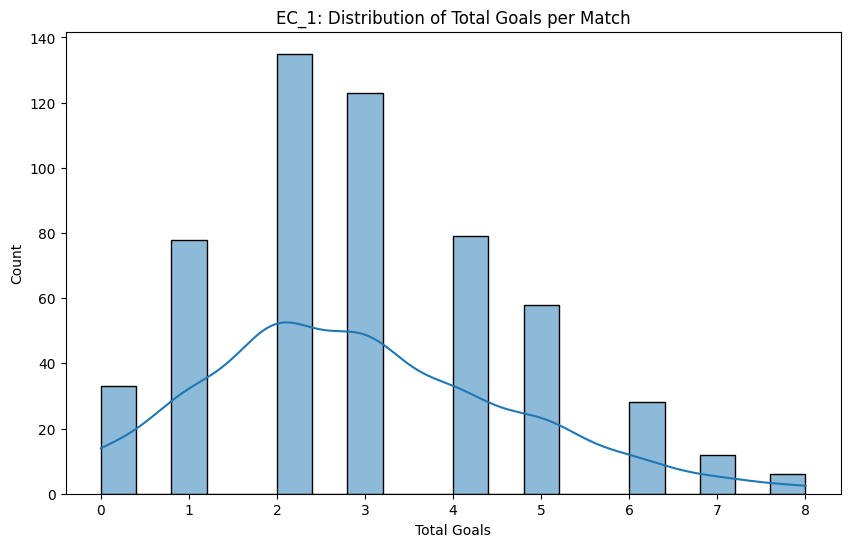


EC_1: Match Result Counts
Result
H    233
A    178
D    141
Name: count, dtype: int64


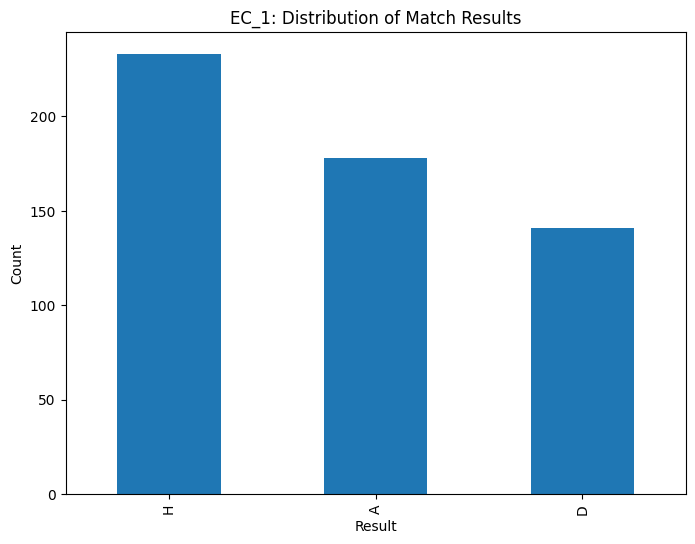


EC_1: Home Win Percentage: 42.21%

EC_1: Missing values
B365H         1
B365D         1
B365A         1
BWH          23
BWD          23
BWA          23
IWH         241
IWD         241
IWA         241
PSH           2
PSD           2
PSA           2
WHH          64
WHD          64
WHA          64
VCH           1
VCD           1
VCA           1
MaxH          1
MaxD          1
MaxA          1
AvgH          1
AvgD          1
AvgA          1
B365>2.5      1
B365<2.5      1
P>2.5         2
P<2.5         2
Max>2.5       1
Max<2.5       1
Avg>2.5       1
Avg<2.5       1
AHh           2
B365AHH       3
B365AHA       3
PAHH          2
PAHA          2
MaxAHH        1
MaxAHA        1
AvgAHH        1
AvgAHA        1
BWCH         21
BWCD         21
BWCA         21
IWCH        241
IWCD        241
IWCA        241
WHCH         52
WHCD         52
WHCA         52
dtype: int64


Analyzing dataset: SC0
Original shape: (24, 119)

SC0: Descriptive statistics for Total Goals
count    24.000000
mean      2.791

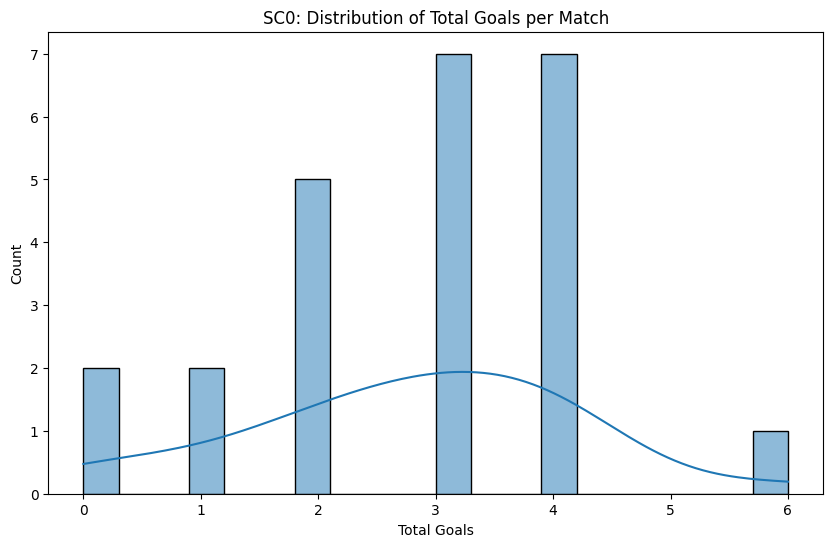


SC0: Match Result Counts
Result
H    10
D     7
A     7
Name: count, dtype: int64


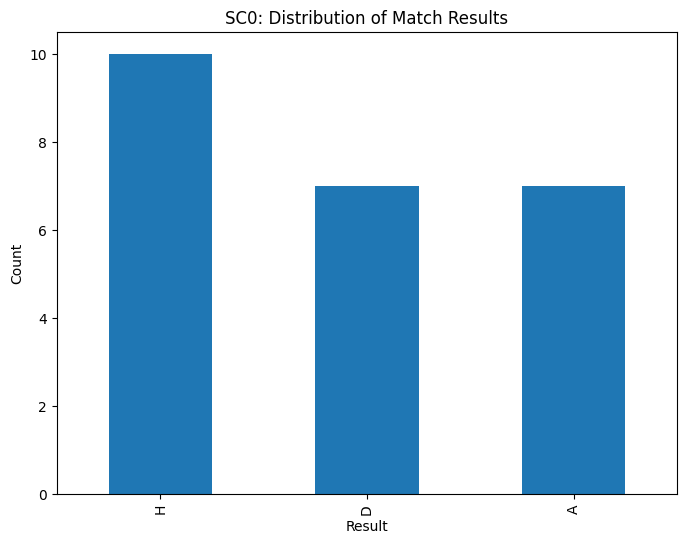


SC0: Home Win Percentage: 41.67%

SC0: Missing values
BFE>2.5    3
BFE<2.5    3
BFEAHH     1
BFEAHA     1
dtype: int64


Analyzing dataset: B1_1
Original shape: (312, 104)

B1_1: Descriptive statistics for Total Goals
count    312.000000
mean       2.817308
std        1.594390
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        8.000000
Name: TotalGoals, dtype: float64


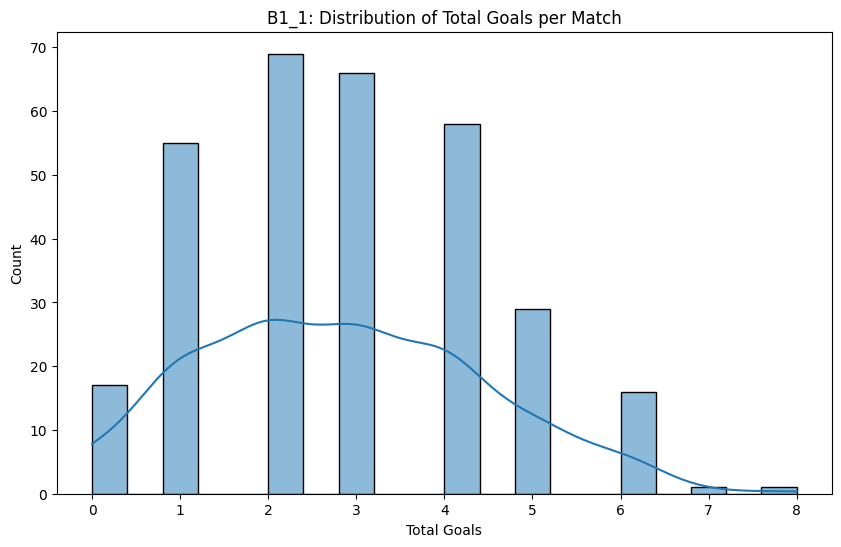


B1_1: Match Result Counts
Result
H    139
A     92
D     81
Name: count, dtype: int64


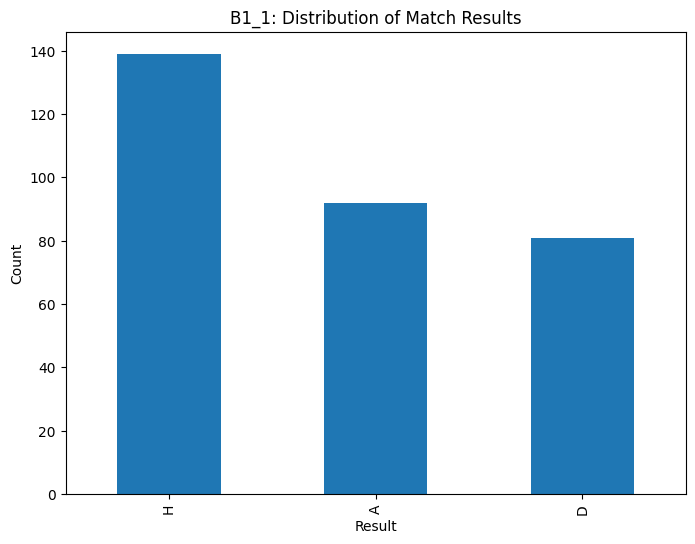


B1_1: Home Win Percentage: 44.55%

B1_1: Missing values
BWH       3
BWD       3
BWA       3
IWH     152
IWD     152
IWA     152
WHH     127
WHD     127
WHA     127
VCH       2
VCD       2
VCA       2
BWCH      8
BWCD      8
BWCA      8
IWCH    152
IWCD    152
IWCA    152
WHCH    127
WHCD    127
WHCA    127
VCCH      1
VCCD      1
VCCA      1
dtype: int64


Analyzing dataset: USA
Original shape: (5142, 21)

USA: Descriptive statistics for Total Goals
count    5142.000000
mean        2.875146
std         1.697043
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: TotalGoals, dtype: float64


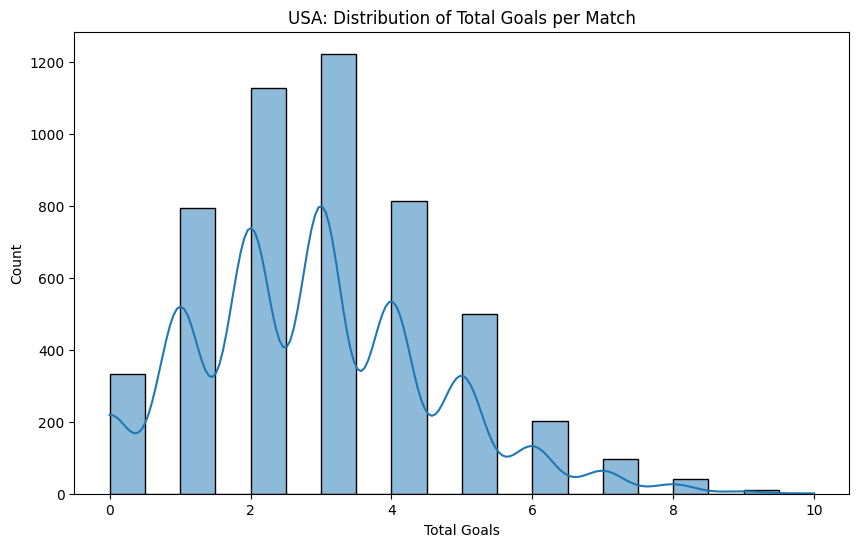


USA: Match Result Counts
Result
H    2582
D    1295
A    1265
Name: count, dtype: int64


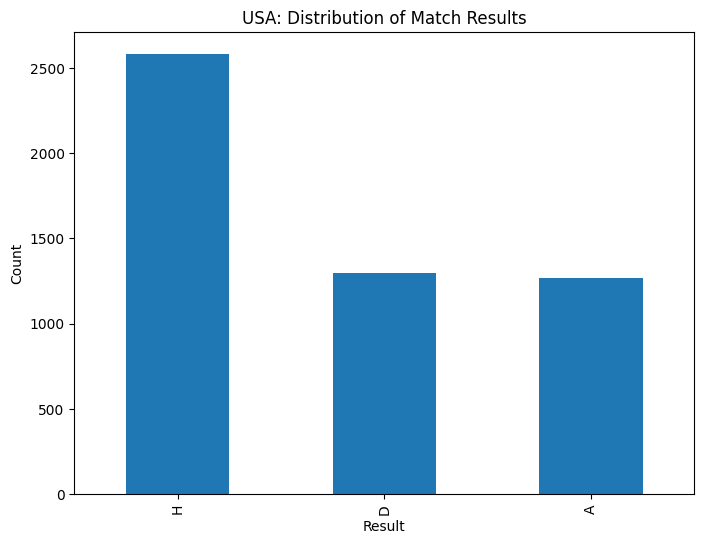


USA: Home Win Percentage: 50.21%

USA: Missing values
PSCH        1
PSCD        1
PSCA        1
BFECH    5073
BFECD    5073
BFECA    5073
dtype: int64


Analyzing dataset: BRA
Original shape: (4801, 21)

BRA: Descriptive statistics for Total Goals
count    4800.000000
mean        2.373542
std         1.533487
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        10.000000
Name: TotalGoals, dtype: float64


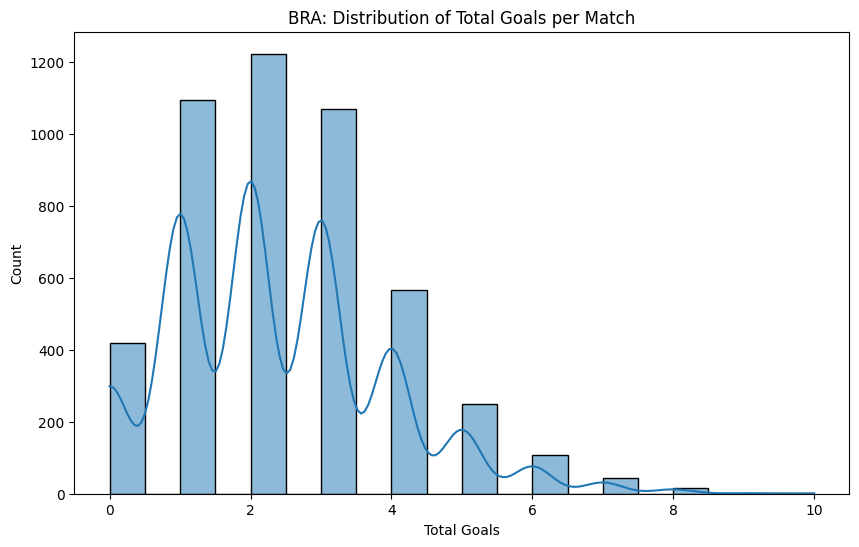


BRA: Match Result Counts
Result
H    2329
D    1287
A    1184
Name: count, dtype: int64


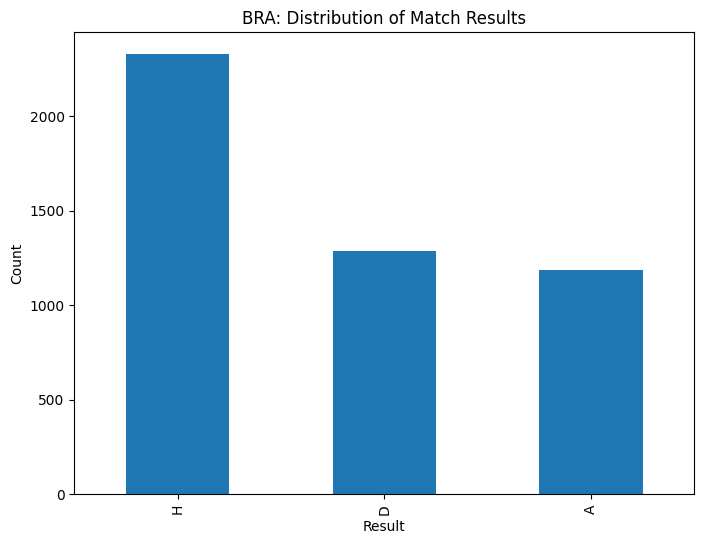


BRA: Home Win Percentage: 48.51%

BRA: Missing values
HG               1
AG               1
Result           1
PSCH             1
PSCD             1
PSCA             1
BFECH         4705
BFECD         4705
BFECA         4705
TotalGoals       1
dtype: int64


Analyzing dataset: EC
Original shape: (71, 111)

EC: Descriptive statistics for Total Goals
count    71.000000
mean      2.563380
std       1.704887
min       0.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       7.000000
Name: TotalGoals, dtype: float64


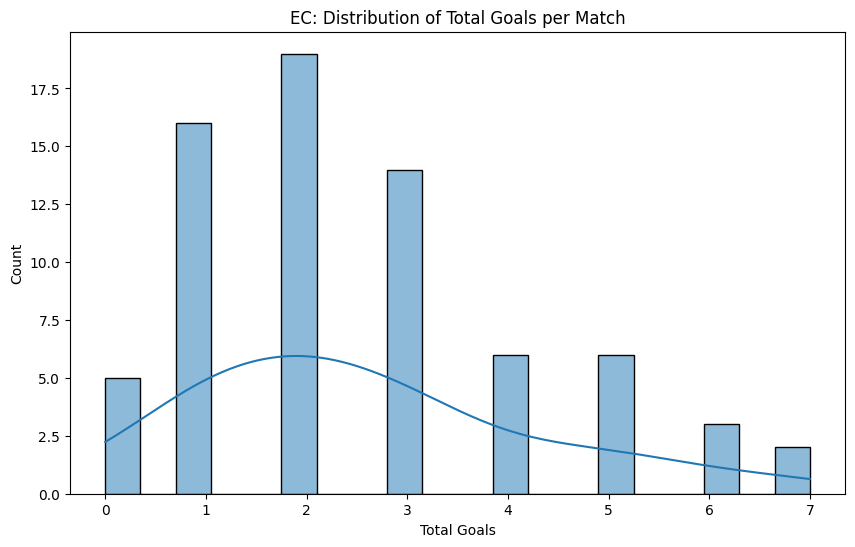


EC: Match Result Counts
Result
H    29
D    21
A    21
Name: count, dtype: int64


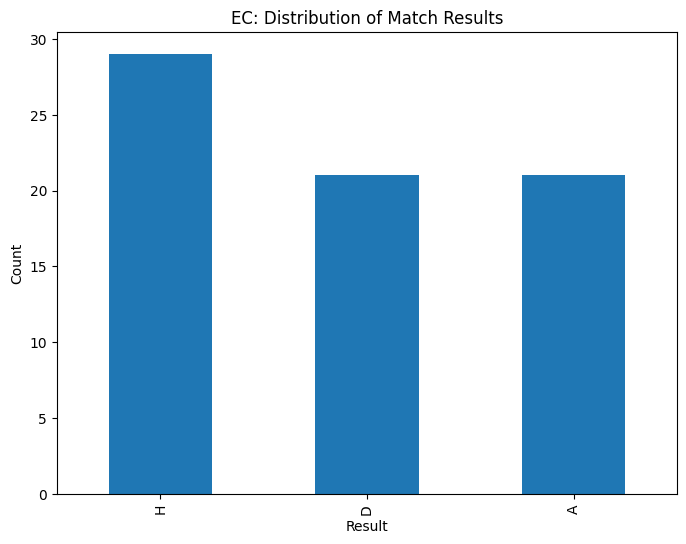


EC: Home Win Percentage: 40.85%

EC: Missing values
WHH        4
WHD        4
WHA        4
BFE>2.5    5
BFE<2.5    5
WHCH       4
WHCD       4
WHCA       4
dtype: int64


Analyzing dataset: I1_1
Original shape: (380, 104)

I1_1: Descriptive statistics for Total Goals
count    380.000000
mean       2.610526
std        1.583522
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max        7.000000
Name: TotalGoals, dtype: float64


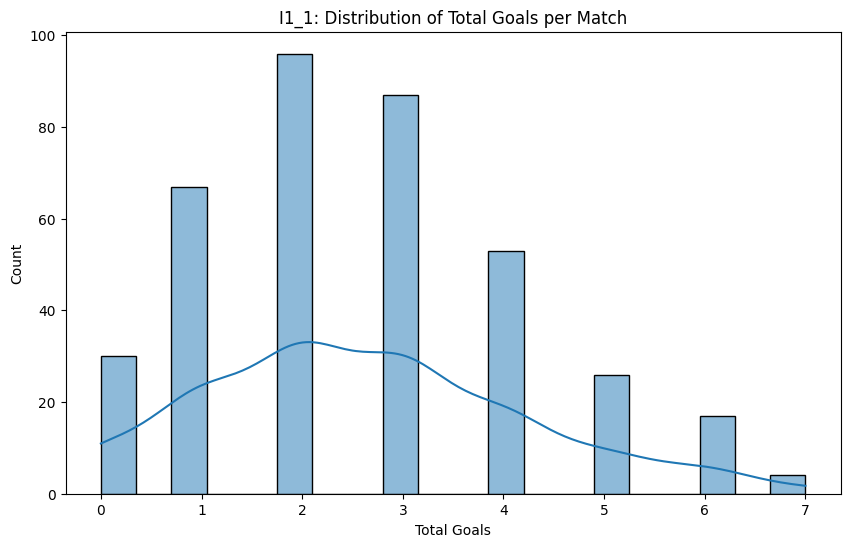


I1_1: Match Result Counts
Result
H    159
D    112
A    109
Name: count, dtype: int64


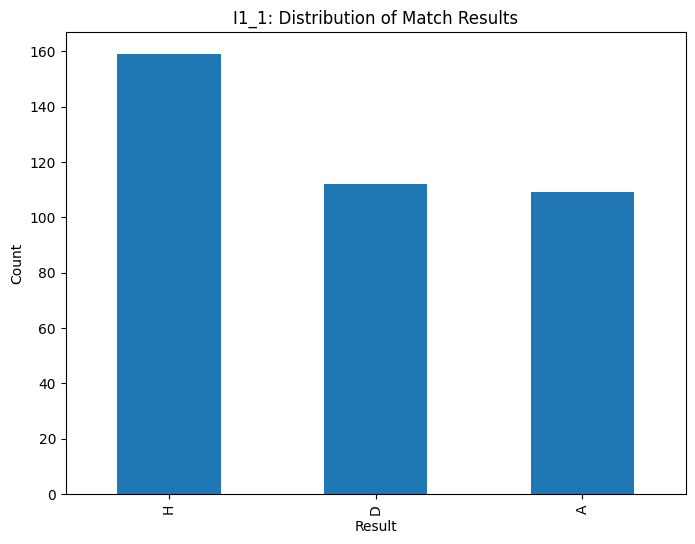


I1_1: Home Win Percentage: 41.84%

I1_1: Missing values
BWH      10
BWD      10
BWA      10
IWH     200
IWD     200
IWA     200
BWCH      8
BWCD      8
BWCA      8
IWCH    200
IWCD    200
IWCA    200
dtype: int64


Analyzing dataset: F1
Original shape: (27, 118)

F1: Descriptive statistics for Total Goals
count    27.000000
mean      3.185185
std       1.687899
min       0.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       7.000000
Name: TotalGoals, dtype: float64


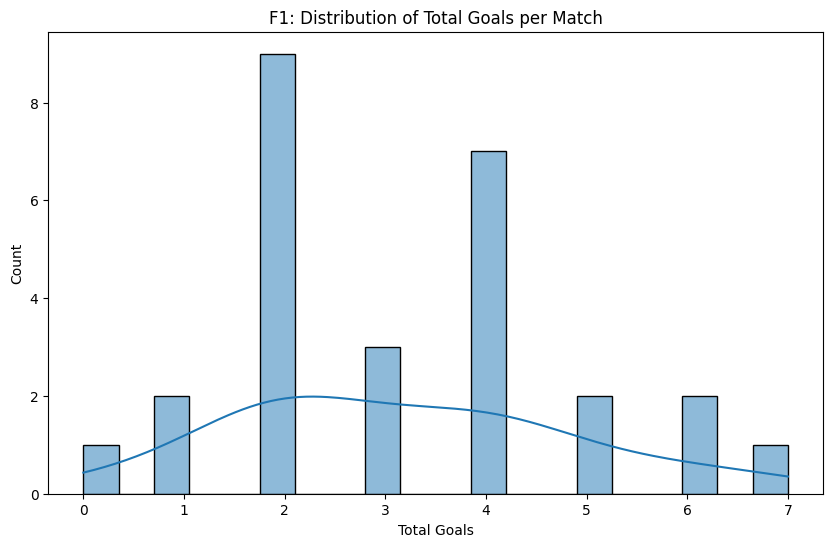


F1: Match Result Counts
Result
H    12
A    10
D     5
Name: count, dtype: int64


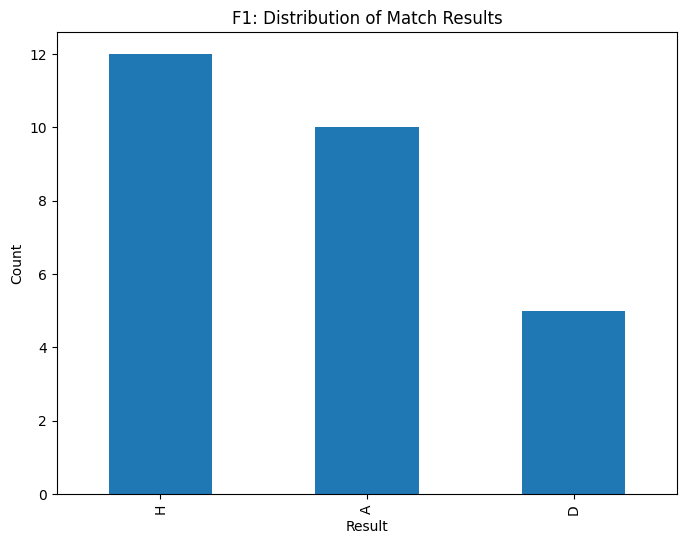


F1: Home Win Percentage: 44.44%

F1: Missing values
BFE>2.5    5
BFE<2.5    5
dtype: int64


Analyzing dataset: AUT
Original shape: (2283, 21)

AUT: Descriptive statistics for Total Goals
count    2283.000000
mean        2.938677
std         1.739047
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: TotalGoals, dtype: float64


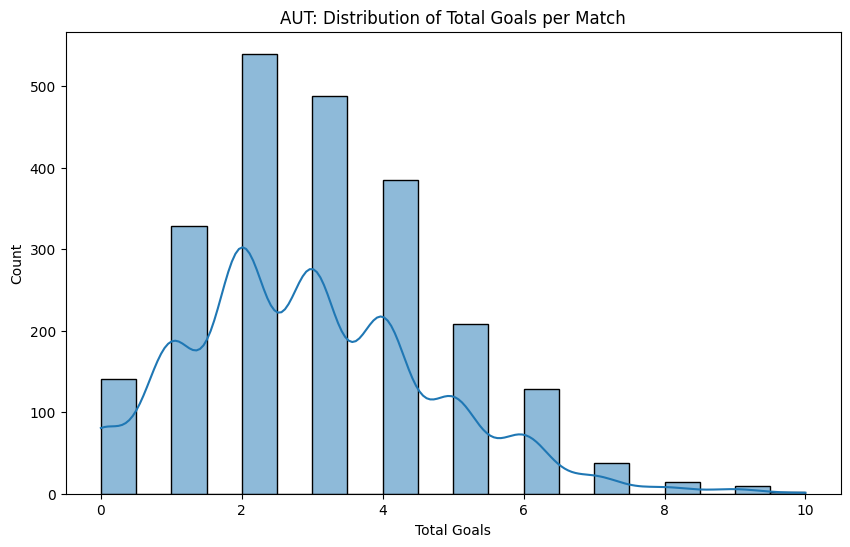


AUT: Match Result Counts
Result
H    962
A    756
D    565
Name: count, dtype: int64


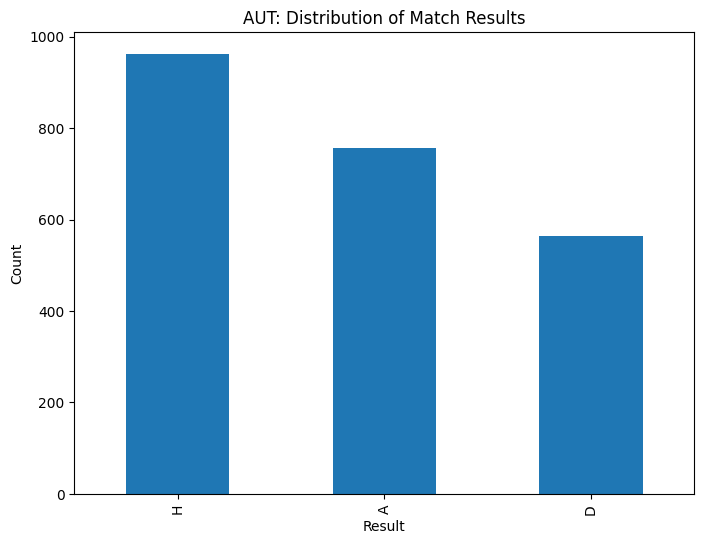


AUT: Home Win Percentage: 42.14%

AUT: Missing values
PSCH        3
PSCD        3
PSCA        3
BFECH    2254
BFECD    2254
BFECA    2254
dtype: int64


Analyzing dataset: D2
Original shape: (36, 118)

D2: Descriptive statistics for Total Goals
count    36.000000
mean      3.000000
std       1.772811
min       0.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       7.000000
Name: TotalGoals, dtype: float64


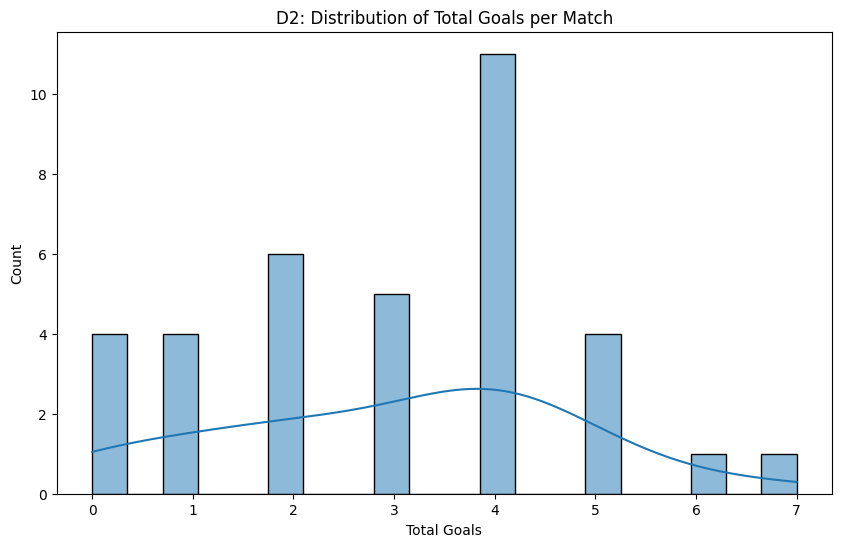


D2: Match Result Counts
Result
H    14
A    12
D    10
Name: count, dtype: int64


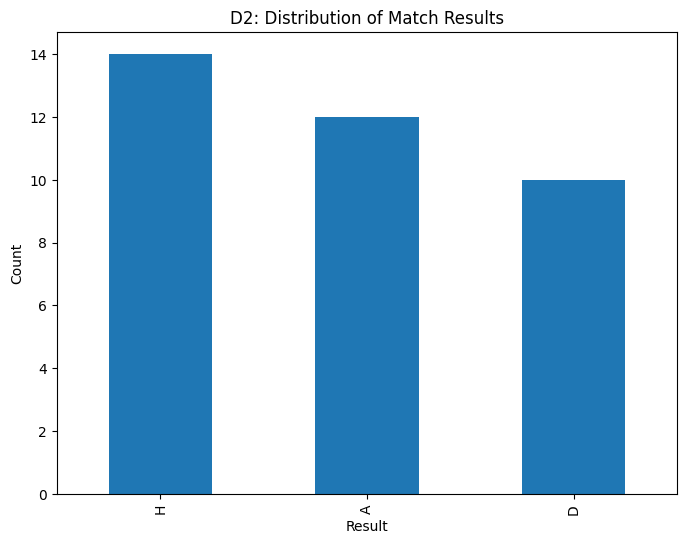


D2: Home Win Percentage: 38.89%

D2: Missing values
BFE>2.5    1
BFE<2.5    1
dtype: int64


Analyzing dataset: D1_1
Original shape: (306, 104)

D1_1: Descriptive statistics for Total Goals
count    306.000000
mean       3.218954
std        1.720017
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        9.000000
Name: TotalGoals, dtype: float64


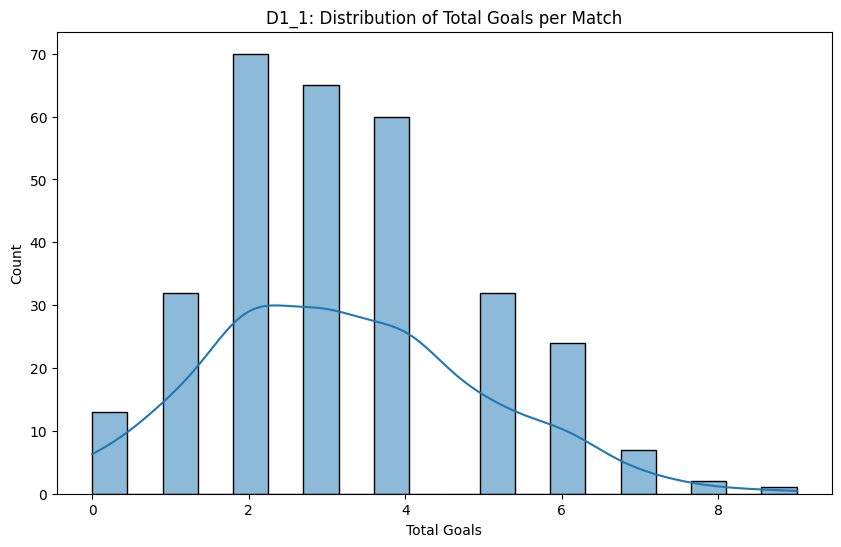


D1_1: Match Result Counts
Result
H    134
A     91
D     81
Name: count, dtype: int64


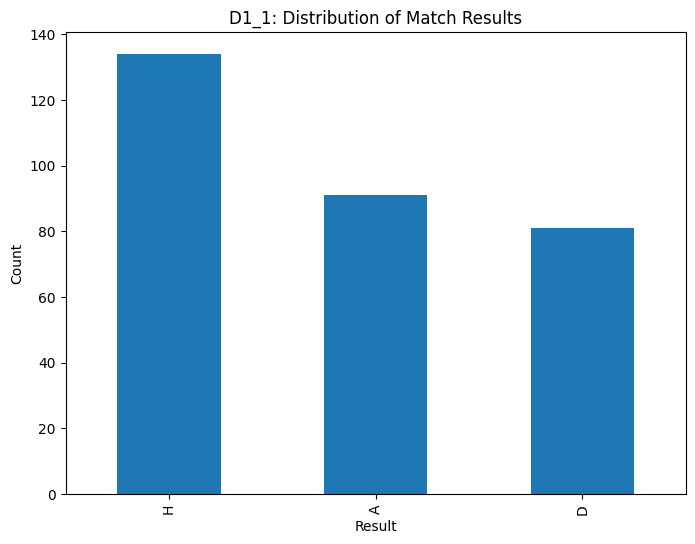


D1_1: Home Win Percentage: 43.79%

D1_1: Missing values
BWH         9
BWD         9
BWA         9
IWH       163
IWD       163
IWA       163
P>2.5      14
P<2.5      14
MaxAHH      1
MaxAHA      1
BWCH        9
BWCD        9
BWCA        9
IWCH      163
IWCD      163
IWCA      163
PC>2.5     13
PC<2.5     13
dtype: int64


Analyzing dataset: SP2_1
Original shape: (462, 104)

SP2_1: Descriptive statistics for Total Goals
count    462.000000
mean       2.248918
std        1.503701
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        9.000000
Name: TotalGoals, dtype: float64


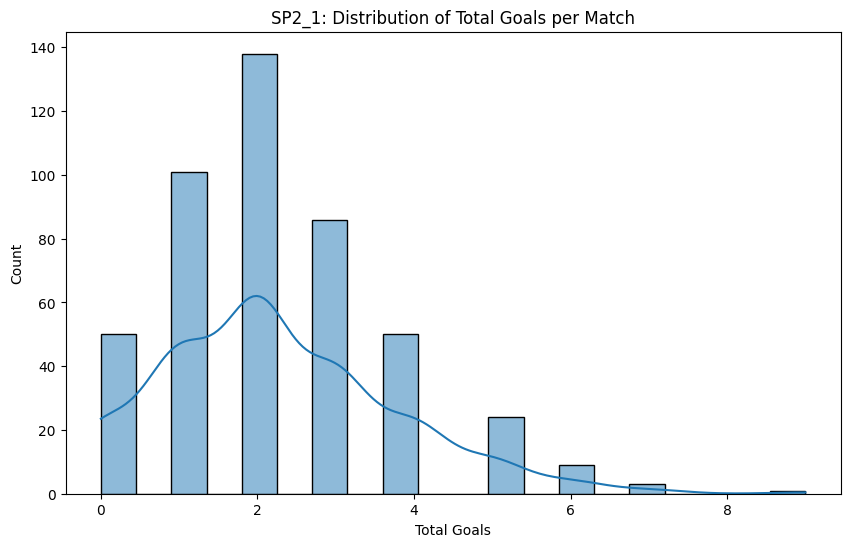


SP2_1: Match Result Counts
Result
H    215
D    139
A    108
Name: count, dtype: int64


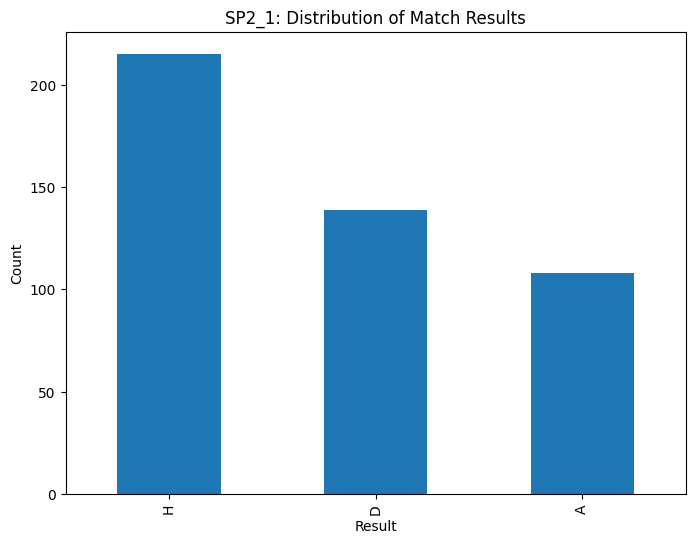


SP2_1: Home Win Percentage: 46.54%

SP2_1: Missing values
B365H         1
B365D         1
B365A         1
BWH          14
BWD          14
BWA          14
IWH         231
IWD         231
IWA         231
PSH           2
PSD           2
PSA           2
WHH         256
WHD         256
WHA         256
VCH           1
VCD           1
VCA           1
B365>2.5      1
B365<2.5      1
P>2.5         2
P<2.5         2
AHh           1
B365AHH       1
B365AHA       1
PAHH          2
PAHA          2
BWCH         12
BWCD         12
BWCA         12
IWCH        231
IWCD        231
IWCA        231
WHCH        247
WHCD        247
WHCA        247
dtype: int64


Analyzing dataset: DNK
Original shape: (2610, 21)

DNK: Descriptive statistics for Total Goals
count    2610.000000
mean        2.757854
std         1.626600
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         9.000000
Name: TotalGoals, dtype: float64


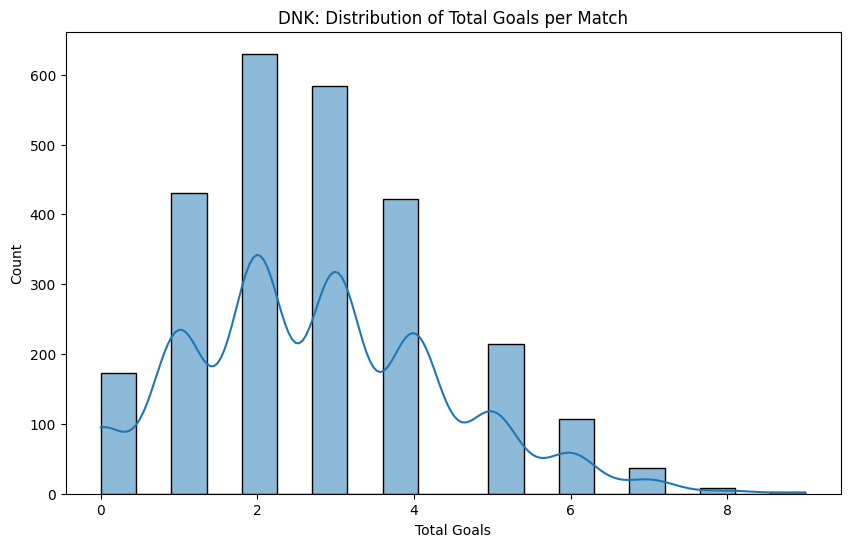


DNK: Match Result Counts
Result
H    1121
A     809
D     680
Name: count, dtype: int64


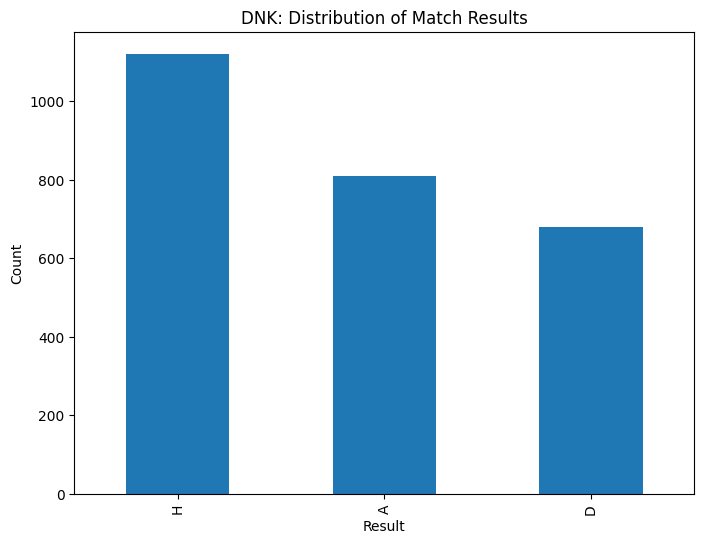


DNK: Home Win Percentage: 42.95%

DNK: Missing values
PSCH        4
PSCD        4
PSCA        4
BFECH    2568
BFECD    2568
BFECA    2568
dtype: int64


Analyzing dataset: I1
Original shape: (30, 118)

I1: Descriptive statistics for Total Goals
count    30.000000
mean      2.366667
std       1.351457
min       0.000000
25%       1.250000
50%       3.000000
75%       3.000000
max       4.000000
Name: TotalGoals, dtype: float64


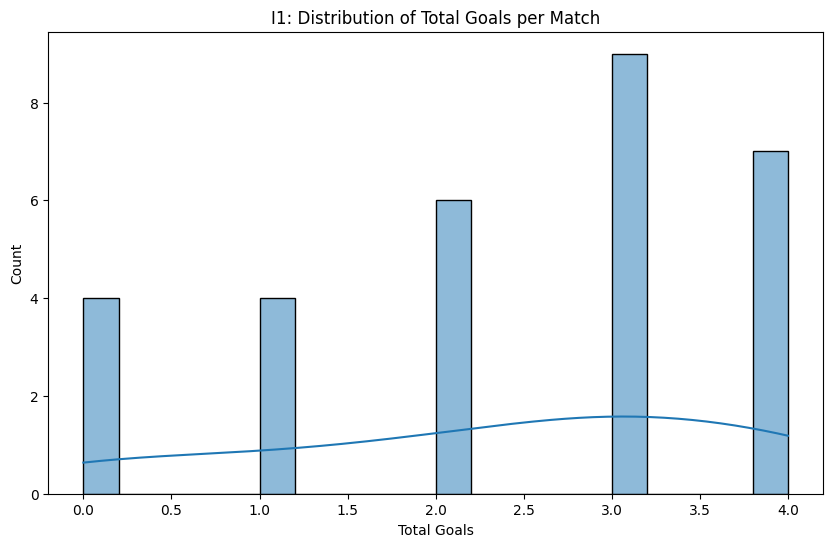


I1: Match Result Counts
Result
D    12
H    12
A     6
Name: count, dtype: int64


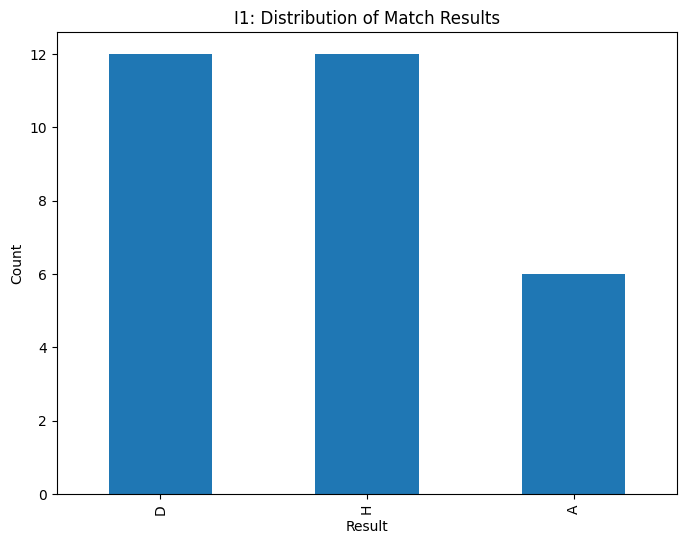


I1: Home Win Percentage: 40.00%

I1: Missing values
BFE>2.5    5
BFE<2.5    5
dtype: int64


Analyzing dataset: SC3_1
Original shape: (180, 105)

SC3_1: Descriptive statistics for Total Goals
count    180.000000
mean       2.594444
std        1.646724
min        0.000000
25%        1.750000
50%        2.000000
75%        4.000000
max        8.000000
Name: TotalGoals, dtype: float64


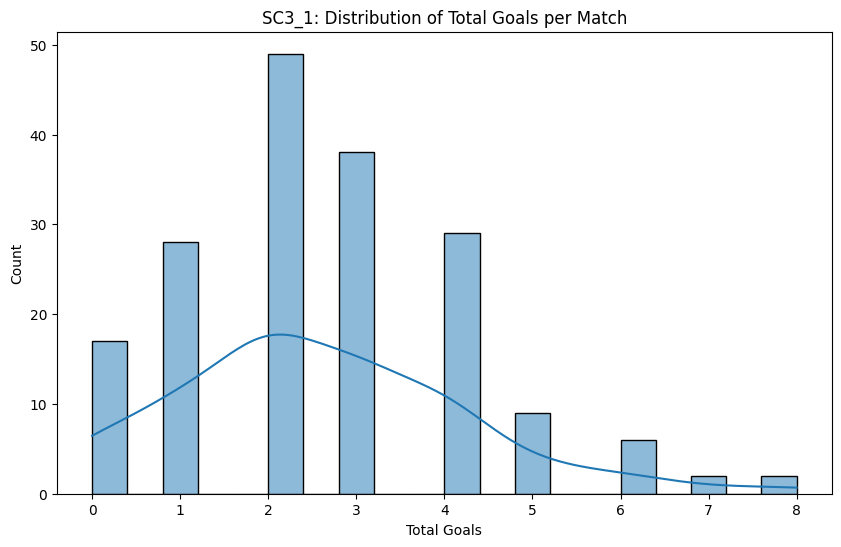


SC3_1: Match Result Counts
Result
H    73
D    58
A    49
Name: count, dtype: int64


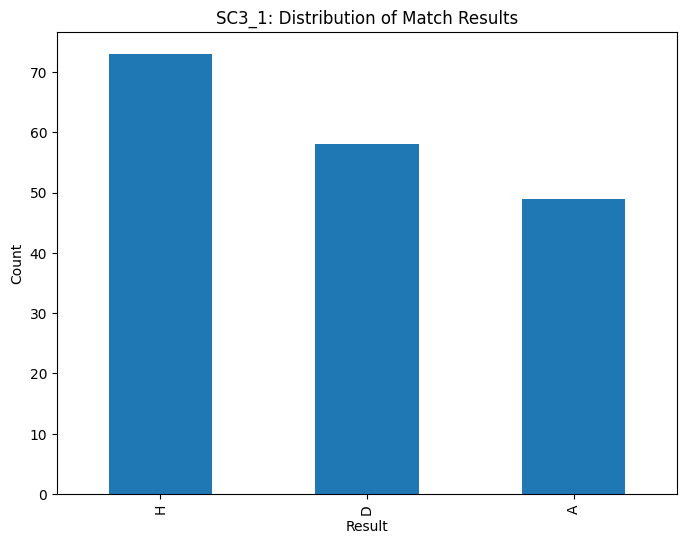


SC3_1: Home Win Percentage: 40.56%

SC3_1: Missing values
BWH         8
BWD         8
BWA         8
IWH        95
IWD        95
IWA        95
PSH         3
PSD         3
PSA         3
WHH         5
WHD         5
WHA         5
VCH         3
VCD         3
VCA         3
P>2.5       3
P<2.5       3
AHh         6
B365AHH     6
B365AHA     6
PAHH        3
PAHA        3
BWCH        8
BWCD        8
BWCA        8
IWCH       95
IWCD       95
IWCA       95
dtype: int64


Analyzing dataset: SWE
Original shape: (3069, 21)

SWE: Descriptive statistics for Total Goals
count    3069.000000
mean        2.802867
std         1.641196
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         9.000000
Name: TotalGoals, dtype: float64


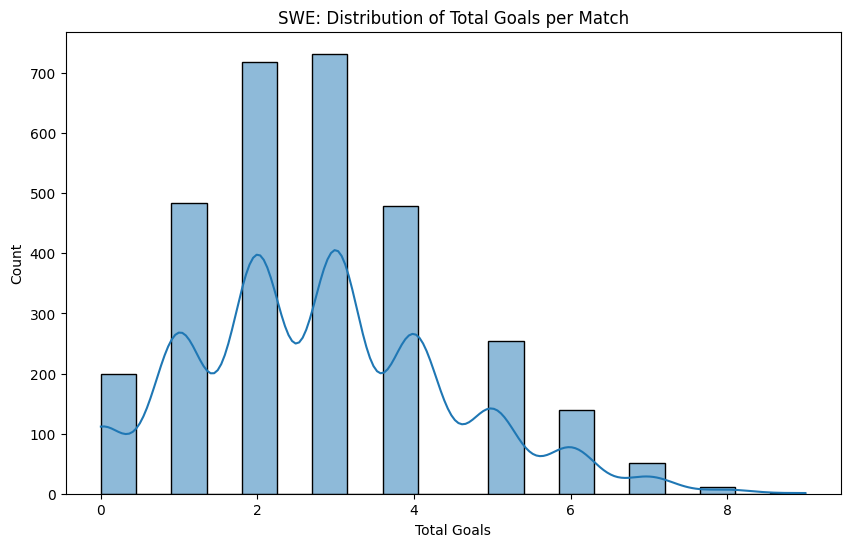


SWE: Match Result Counts
Result
H    1346
A     954
D     769
Name: count, dtype: int64


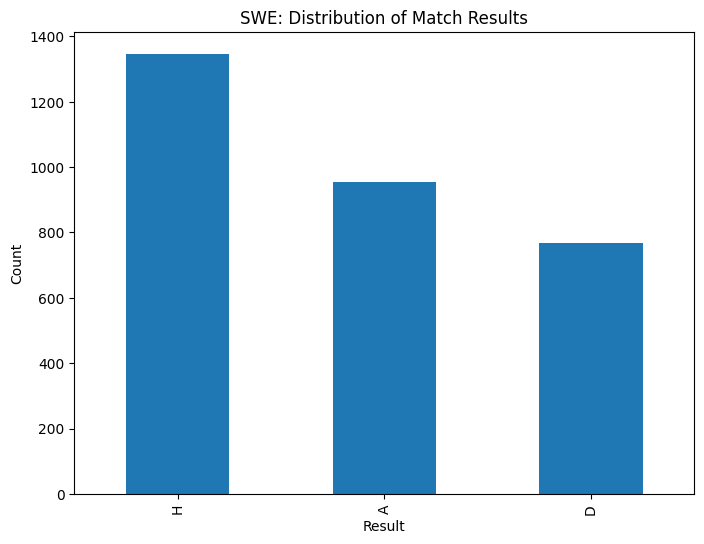


SWE: Home Win Percentage: 43.86%

SWE: Missing values
PSCH        2
PSCD        2
PSCA        2
BFECH    3008
BFECD    3008
BFECA    3008
dtype: int64


Analyzing dataset: FIN
Original shape: (2330, 21)

FIN: Descriptive statistics for Total Goals
count    2330.000000
mean        2.593133
std         1.638194
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        11.000000
Name: TotalGoals, dtype: float64


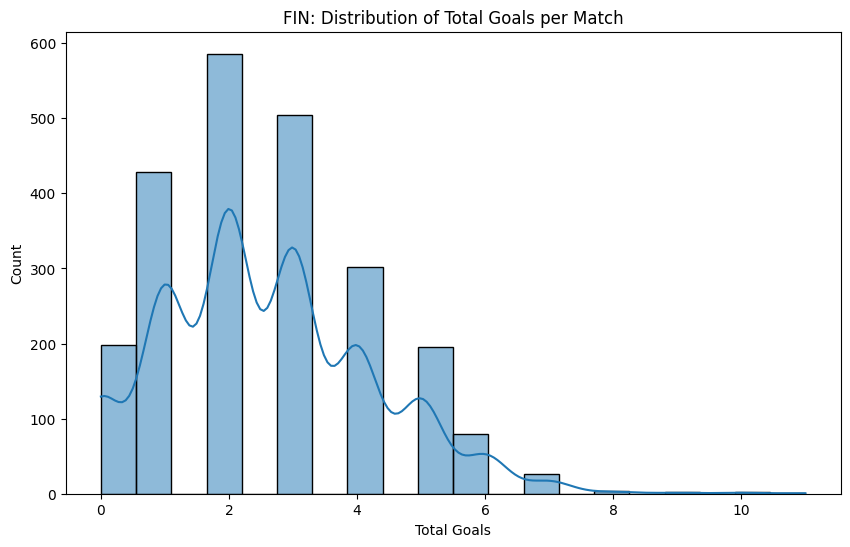


FIN: Match Result Counts
Result
H    1024
A     708
D     598
Name: count, dtype: int64


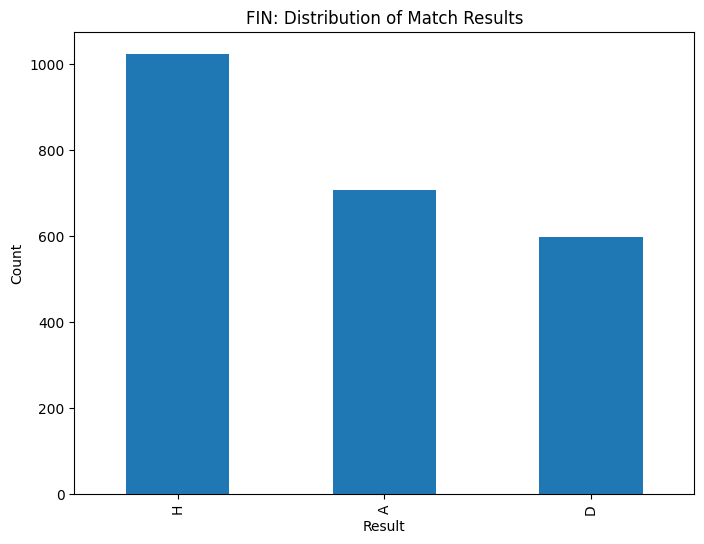


FIN: Home Win Percentage: 43.95%

FIN: Missing values
PSCH        5
PSCD        5
PSCA        5
BFECH    2286
BFECD    2286
BFECA    2286
dtype: int64


Analyzing dataset: E0_1
Original shape: (380, 105)

E0_1: Descriptive statistics for Total Goals
count    380.000000
mean       3.278947
std        1.656865
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        8.000000
Name: TotalGoals, dtype: float64


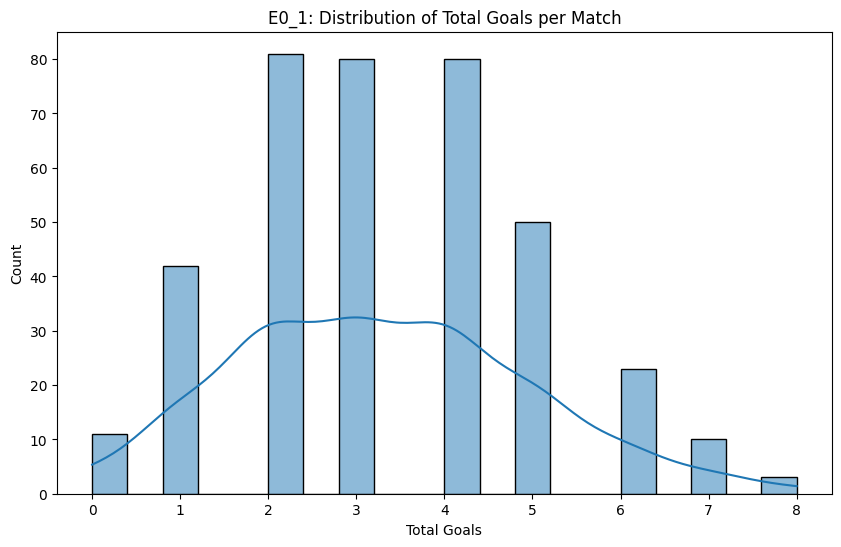


E0_1: Match Result Counts
Result
H    175
A    123
D     82
Name: count, dtype: int64


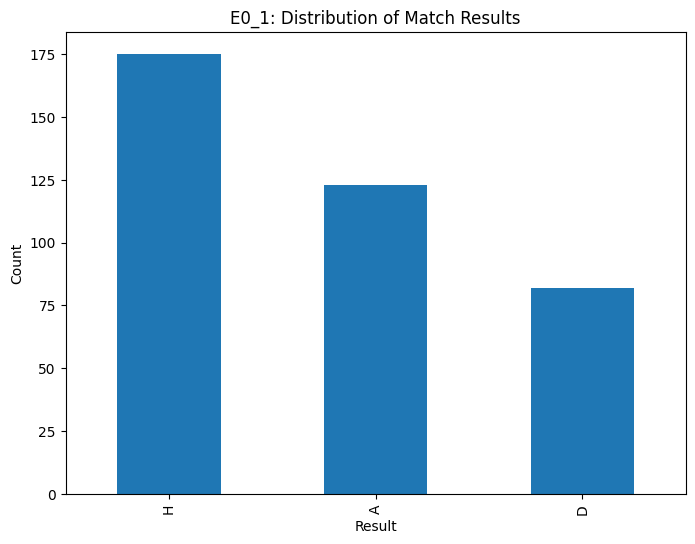


E0_1: Home Win Percentage: 46.05%

E0_1: Missing values
BWH          2
BWD          2
BWA          2
IWH        182
IWD        182
IWA        182
P>2.5        8
P<2.5        8
BWCH        12
BWCD        12
BWCA        12
IWCH       182
IWCD       182
IWCA       182
PC>2.5       7
PC<2.5       7
MaxCAHH      1
MaxCAHA      1
dtype: int64


Analyzing dataset: E1
Original shape: (48, 119)

E1: Descriptive statistics for Total Goals
count    48.000000
mean      2.708333
std       1.662584
min       0.000000
25%       1.750000
50%       2.000000
75%       4.000000
max       7.000000
Name: TotalGoals, dtype: float64


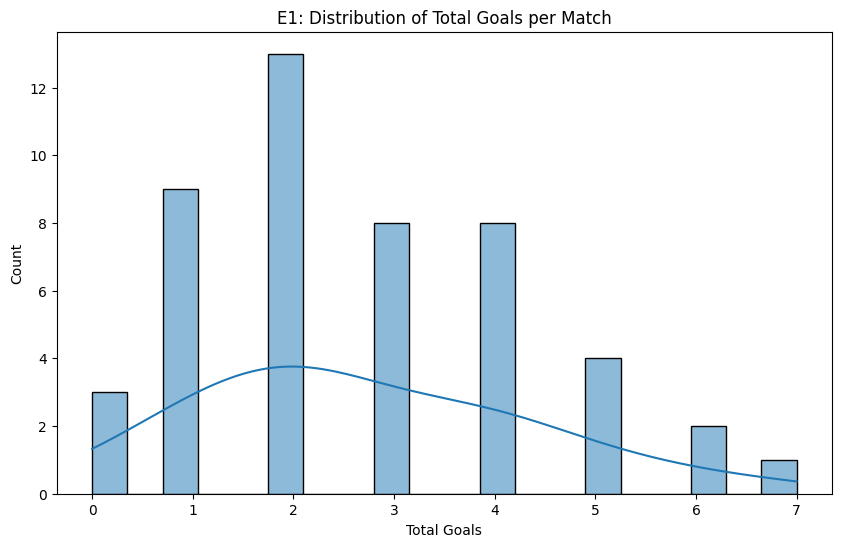


E1: Match Result Counts
Result
H    22
D    14
A    12
Name: count, dtype: int64


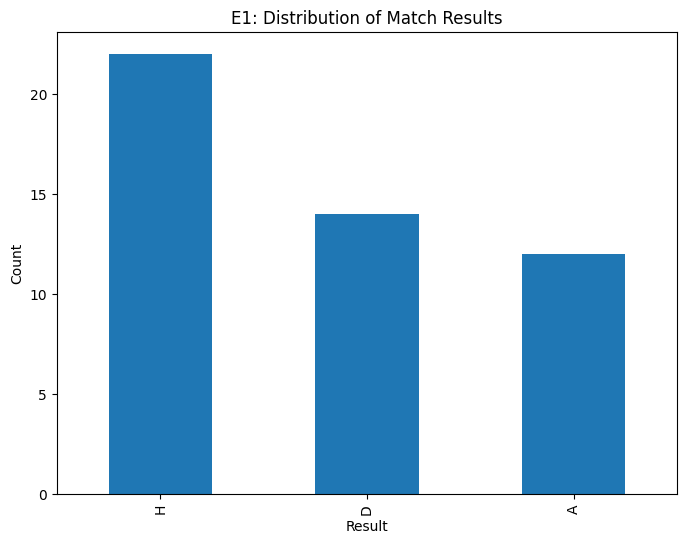


E1: Home Win Percentage: 45.83%

E1: Missing values
BFE>2.5    2
BFE<2.5    2
dtype: int64


Analyzing dataset: E2
Original shape: (48, 119)

E2: Descriptive statistics for Total Goals
count    48.000000
mean      2.541667
std       1.662584
min       0.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       8.000000
Name: TotalGoals, dtype: float64


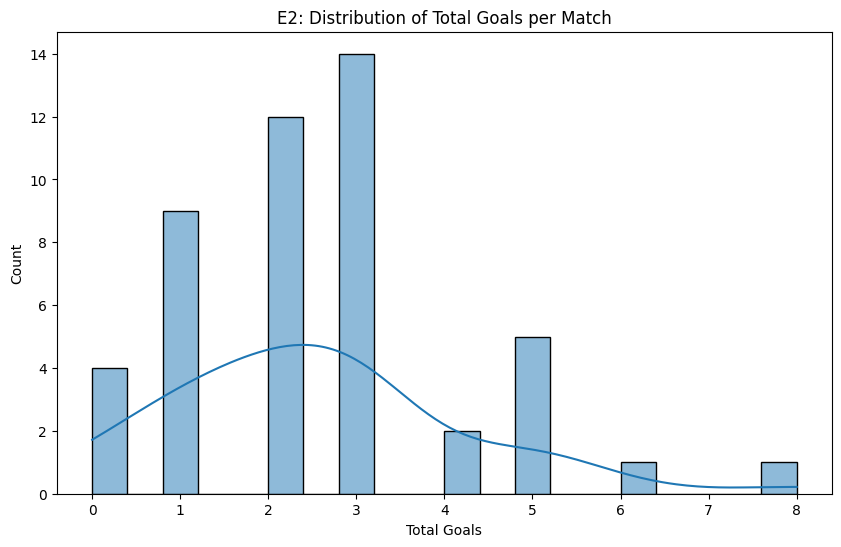


E2: Match Result Counts
Result
H    22
A    16
D    10
Name: count, dtype: int64


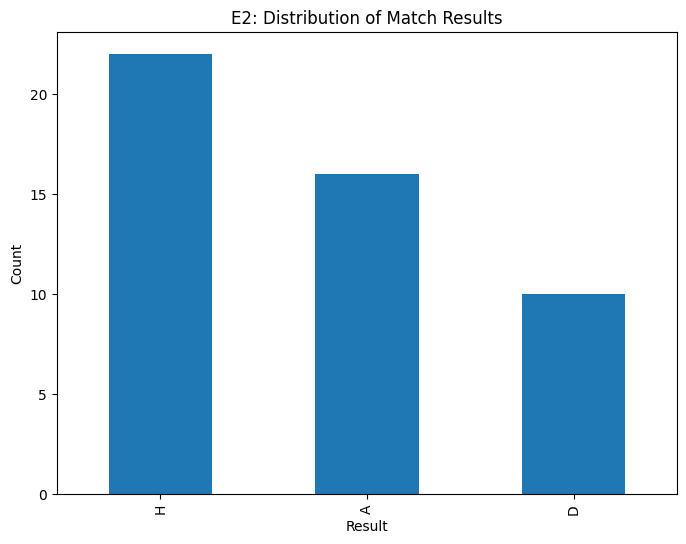


E2: Home Win Percentage: 45.83%

E2: Missing values
BFE>2.5    2
BFE<2.5    2
BFEAHH     1
BFEAHA     1
dtype: int64


Analyzing dataset: JPN
Original shape: (4047, 21)

JPN: Descriptive statistics for Total Goals
count    4047.000000
mean        2.637756
std         1.684373
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        10.000000
Name: TotalGoals, dtype: float64


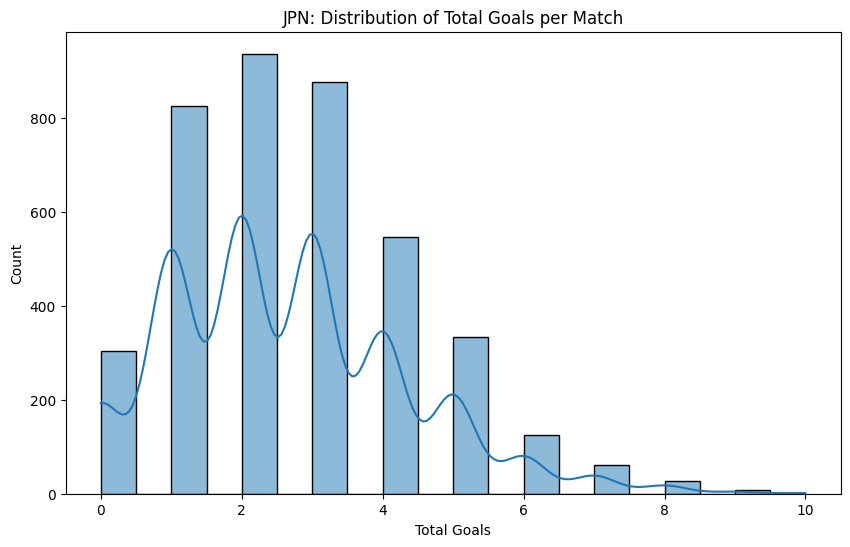


JPN: Match Result Counts
Result
H    1645
A    1399
D    1003
Name: count, dtype: int64


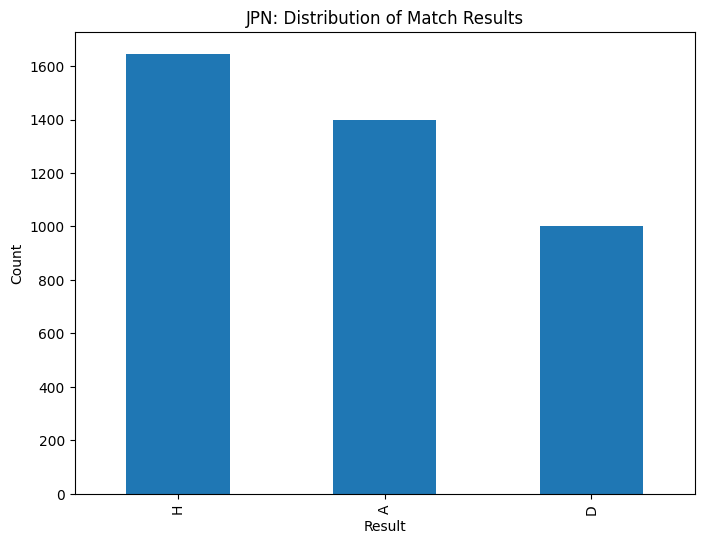


JPN: Home Win Percentage: 40.65%

JPN: Missing values
PSCH       10
PSCD       10
PSCA       10
BFECH    3983
BFECD    3983
BFECA    3983
dtype: int64


Analyzing dataset: P1
Original shape: (36, 118)

P1: Descriptive statistics for Total Goals
count    36.000000
mean      2.277778
std       1.666667
min       0.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       7.000000
Name: TotalGoals, dtype: float64


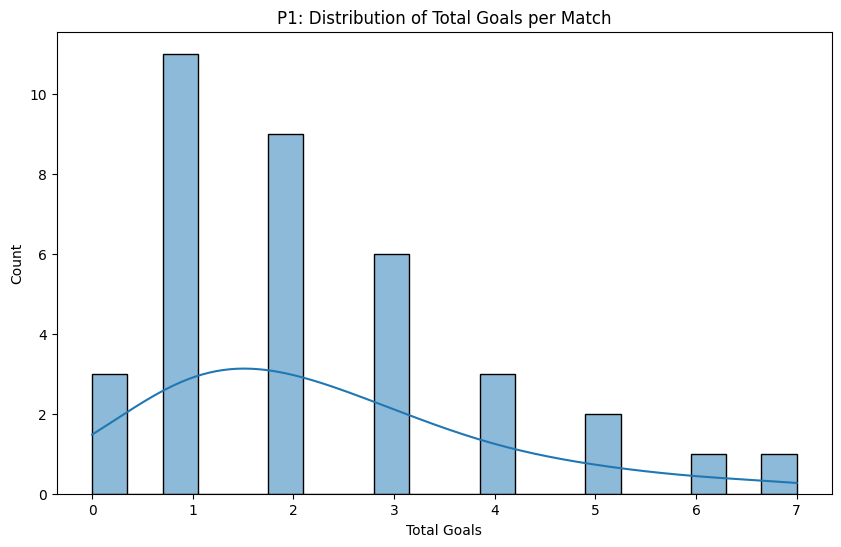


P1: Match Result Counts
Result
H    19
A    11
D     6
Name: count, dtype: int64


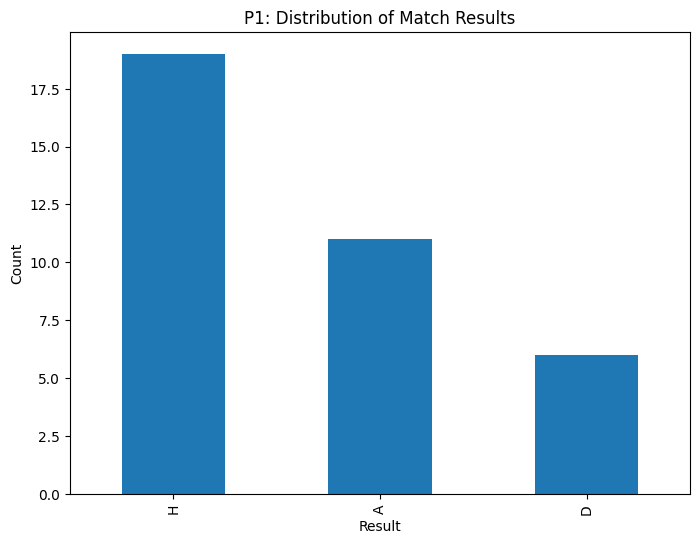


P1: Home Win Percentage: 52.78%

P1: Missing values
BFE>2.5     9
BFE<2.5     9
BFEAHH     11
BFEAHA     11
dtype: int64


Analyzing dataset: SC2
Original shape: (25, 119)

SC2: Descriptive statistics for Total Goals
count    25.000000
mean      2.240000
std       1.786057
min       0.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       6.000000
Name: TotalGoals, dtype: float64


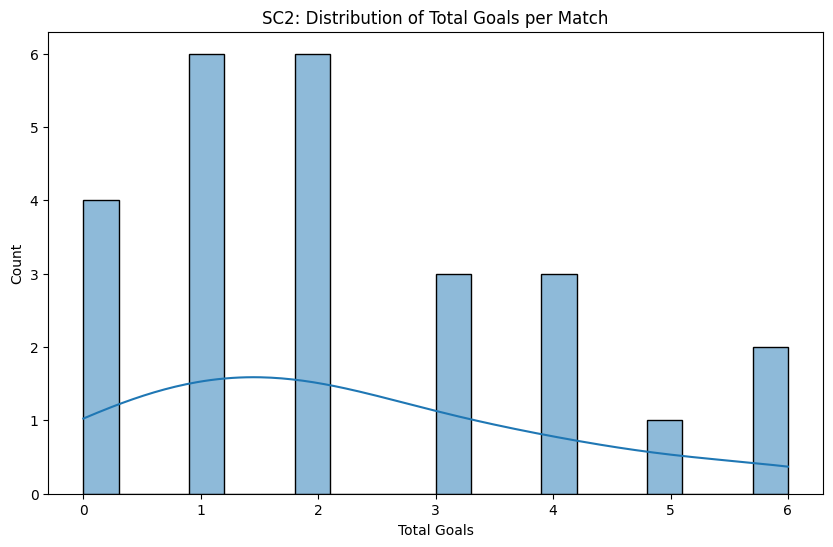


SC2: Match Result Counts
Result
D    11
H    11
A     3
Name: count, dtype: int64


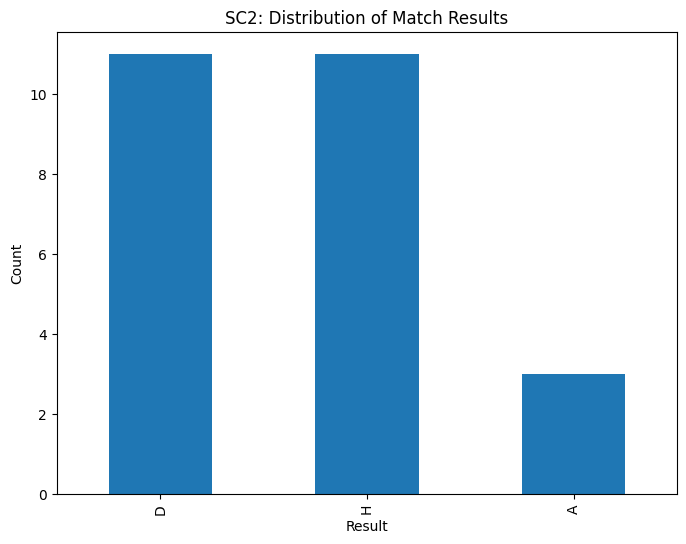


SC2: Home Win Percentage: 44.00%

SC2: Missing values
PSH        4
PSD        4
PSA        4
P>2.5      4
P<2.5      4
BFE>2.5    1
BFE<2.5    1
B365AHH    5
B365AHA    5
PAHH       4
PAHA       4
dtype: int64


Analyzing dataset: E0
Original shape: (30, 119)

E0: Descriptive statistics for Total Goals
count    30.000000
mean      2.766667
std       1.430778
min       1.000000
25%       2.000000
50%       2.000000
75%       3.000000
max       8.000000
Name: TotalGoals, dtype: float64


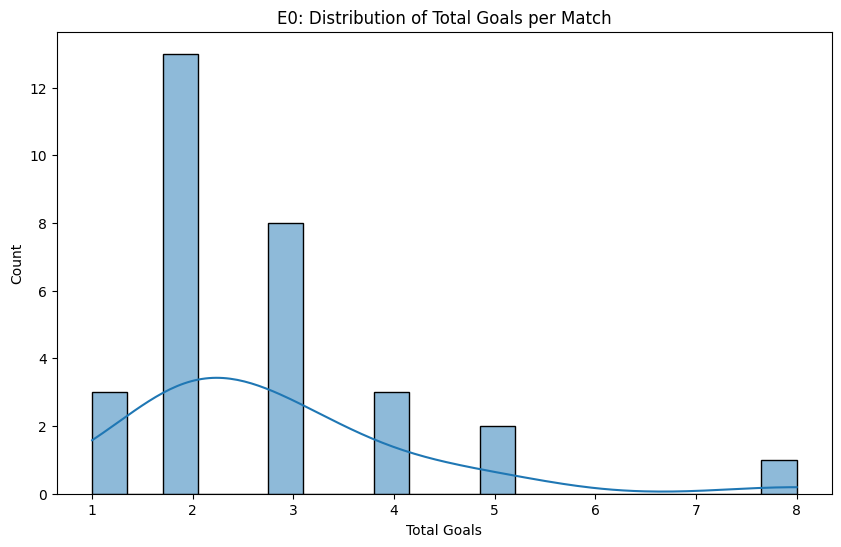


E0: Match Result Counts
Result
A    12
H    11
D     7
Name: count, dtype: int64


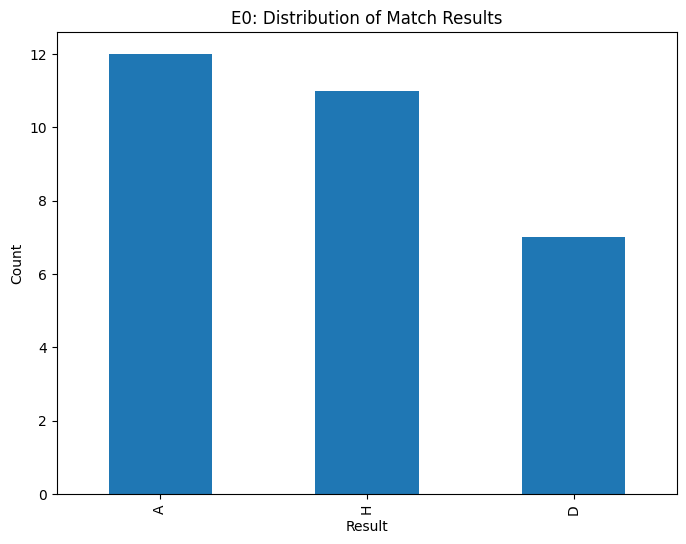


E0: Home Win Percentage: 36.67%

E0: Missing values
BFE>2.5    3
BFE<2.5    3
dtype: int64


Analyzing dataset: CHN
Original shape: (2520, 21)

CHN: Descriptive statistics for Total Goals
count    2520.000000
mean        2.875794
std         1.736071
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         9.000000
Name: TotalGoals, dtype: float64


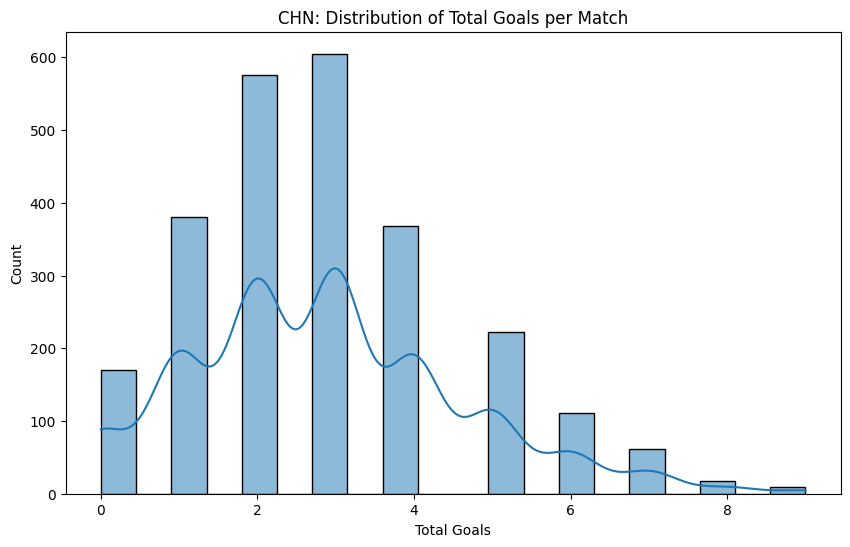


CHN: Match Result Counts
Result
H    1136
A     746
D     638
Name: count, dtype: int64


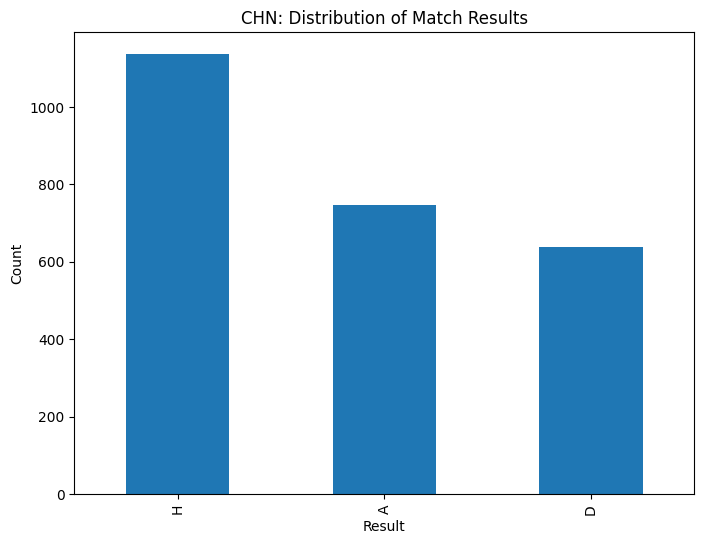


CHN: Home Win Percentage: 45.08%

CHN: Missing values
PSCH       33
PSCD       33
PSCA       33
MaxCH       6
MaxCD       6
MaxCA       6
AvgCH       6
AvgCD       6
AvgCA       6
BFECH    2472
BFECD    2472
BFECA    2472
dtype: int64


Analyzing dataset: I2_1
Original shape: (380, 104)

I2_1: Descriptive statistics for Total Goals
count    380.000000
mean       2.521053
std        1.582249
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        8.000000
Name: TotalGoals, dtype: float64


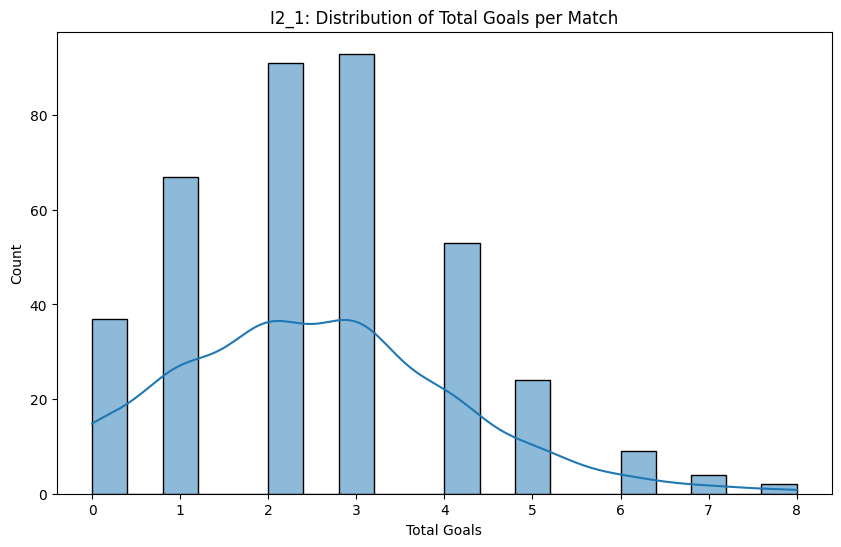


I2_1: Match Result Counts
Result
H    139
D    122
A    119
Name: count, dtype: int64


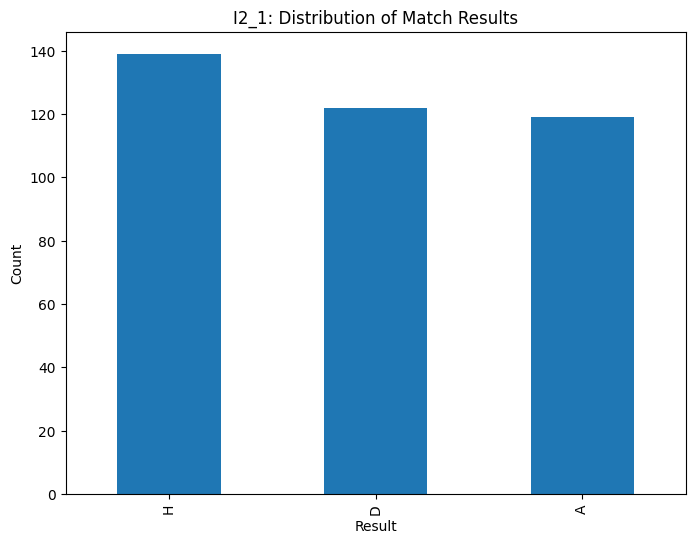


I2_1: Home Win Percentage: 36.58%

I2_1: Missing values
B365H         2
B365D         2
B365A         2
BWH          13
BWD          13
BWA          13
IWH         191
IWD         191
IWA         191
PSH           1
PSD           1
PSA           1
WHH          51
WHD          51
WHA          51
VCH           4
VCD           4
VCA           4
MaxH          1
MaxD          1
MaxA          1
AvgH          1
AvgD          1
AvgA          1
B365>2.5      2
B365<2.5      2
P>2.5         1
P<2.5         1
Max>2.5       1
Max<2.5       1
Avg>2.5       1
Avg<2.5       1
AHh           2
B365AHH       2
B365AHA       2
PAHH          1
PAHA          1
MaxAHH        1
MaxAHA        1
AvgAHH        1
AvgAHA        1
BWCH         12
BWCD         12
BWCA         12
IWCH        190
IWCD        190
IWCA        190
WHCH         49
WHCD         49
WHCA         49
dtype: int64


Analyzing dataset: MEX
Original shape: (4036, 21)

MEX: Descriptive statistics for Total Goals
count    4036.000000
mean        

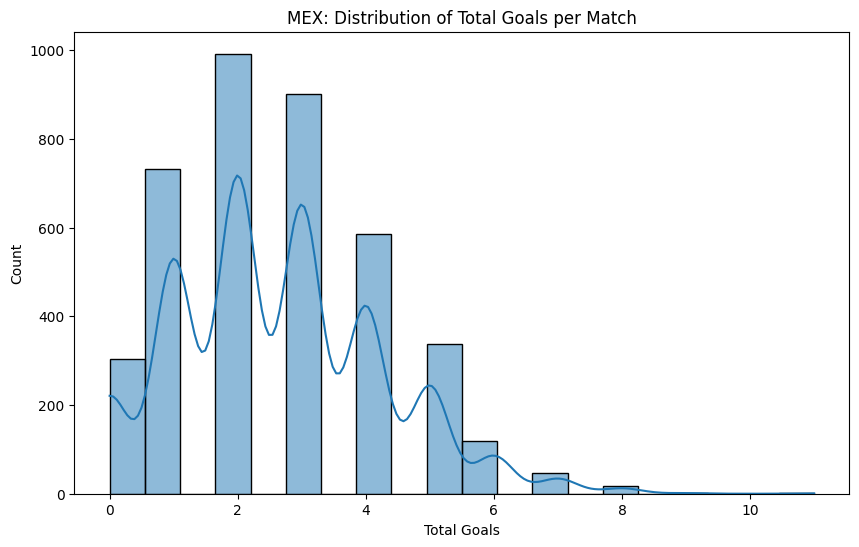


MEX: Match Result Counts
Result
H    1783
A    1139
D    1114
Name: count, dtype: int64


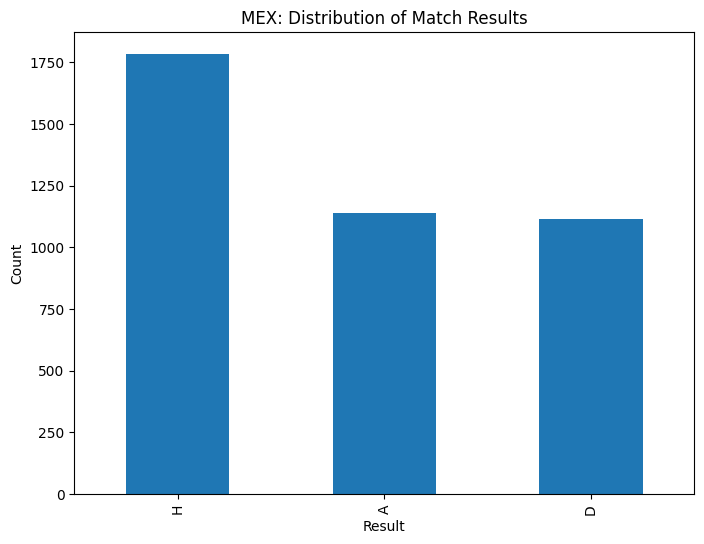


MEX: Home Win Percentage: 44.18%

MEX: Missing values
PSCH       17
PSCD       17
PSCA       17
BFECH    3988
BFECD    3988
BFECA    3988
dtype: int64


Analyzing dataset: NOR
Original shape: (3065, 21)

NOR: Descriptive statistics for Total Goals
count    3065.000000
mean        2.982382
std         1.716249
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: TotalGoals, dtype: float64


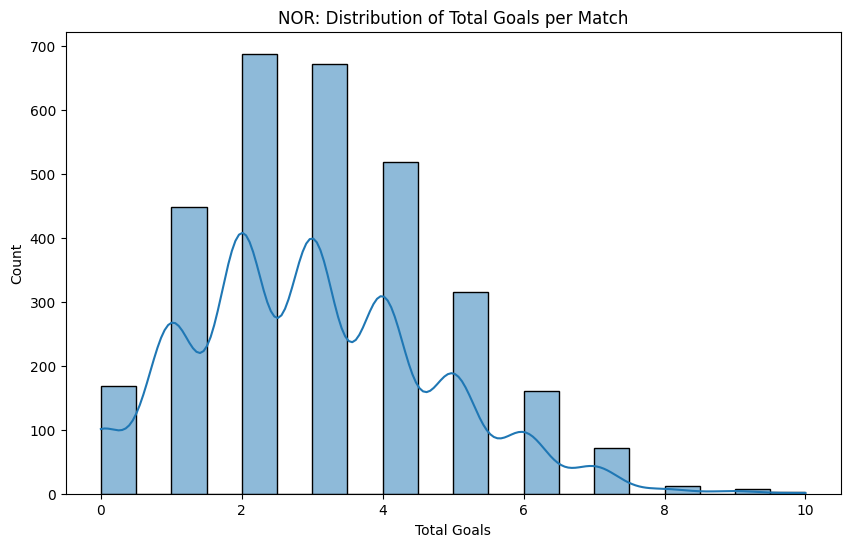


NOR: Match Result Counts
Result
H    1442
A     868
D     755
Name: count, dtype: int64


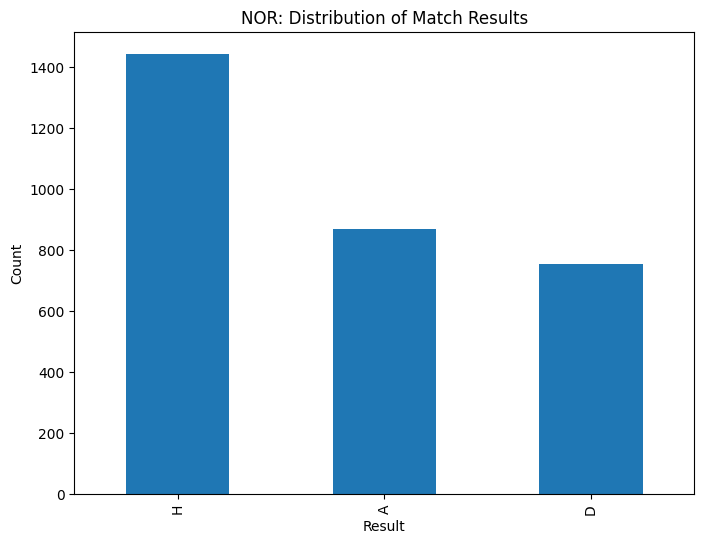


NOR: Home Win Percentage: 47.05%

NOR: Missing values
PSCH        2
PSCD        2
PSCA        2
BFECH    3008
BFECD    3008
BFECA    3008
dtype: int64


Analyzing dataset: ROU
Original shape: (3608, 21)

ROU: Descriptive statistics for Total Goals
count    3608.000000
mean        2.407151
std         1.593487
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        10.000000
Name: TotalGoals, dtype: float64


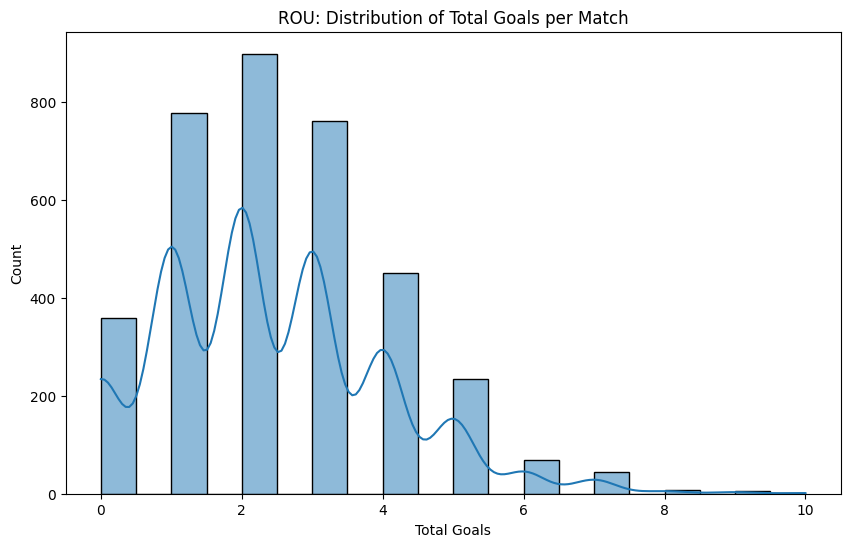


ROU: Match Result Counts
Result
H    1543
A    1069
D     996
Name: count, dtype: int64


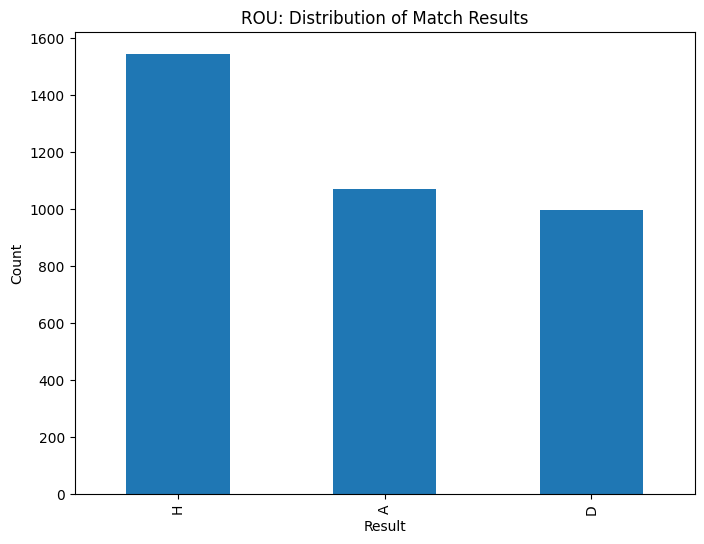


ROU: Home Win Percentage: 42.77%

ROU: Missing values
PSCH       23
PSCD       23
PSCA       23
BFECH    3546
BFECD    3546
BFECA    3546
dtype: int64


Analyzing dataset: G1_1
Original shape: (240, 104)

G1_1: Descriptive statistics for Total Goals
count    240.000000
mean       2.958333
std        1.516414
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        8.000000
Name: TotalGoals, dtype: float64


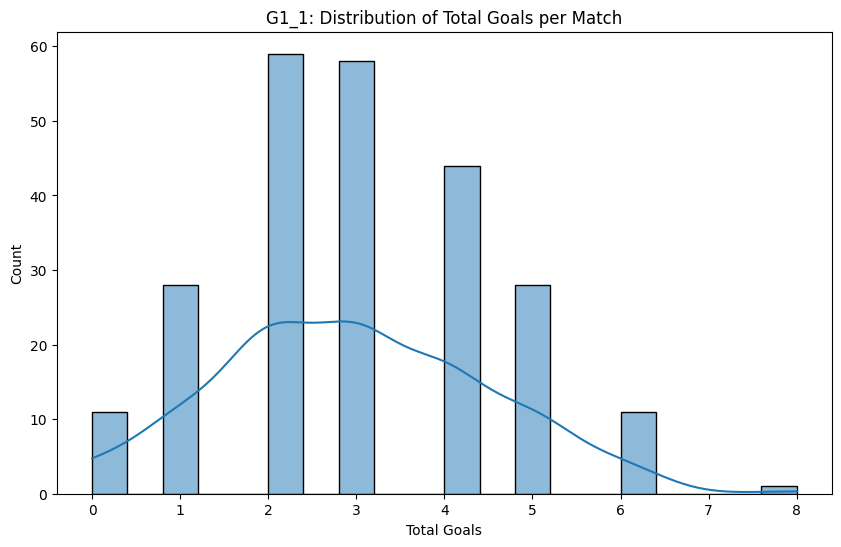


G1_1: Match Result Counts
Result
H    107
A     71
D     62
Name: count, dtype: int64


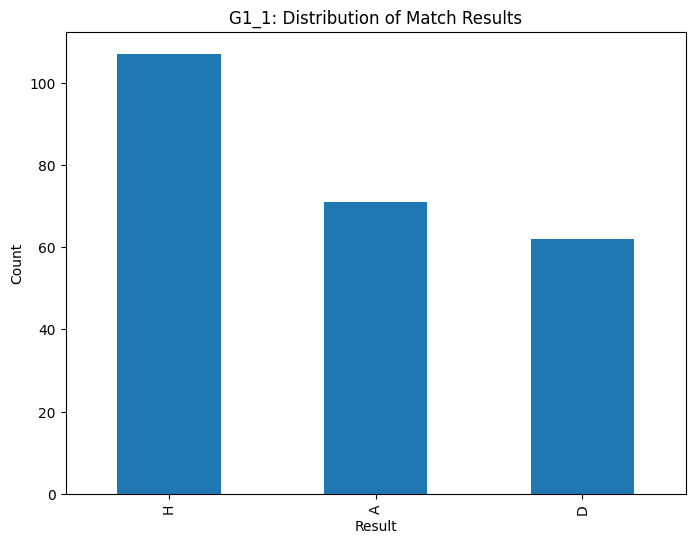


G1_1: Home Win Percentage: 44.58%

G1_1: Missing values
HTHG      1
HTAG      1
HTR       1
HS        1
AS        1
HST       1
AST       1
HF        1
AF        1
HC        1
AC        1
HY        1
AY        1
HR        1
AR        1
BWH       4
BWD       4
BWA       4
IWH     128
IWD     128
IWA     128
VCH       9
VCD       9
VCA       9
BWCH      9
BWCD      9
BWCA      9
IWCH    130
IWCD    130
IWCA    130
dtype: int64


Analyzing dataset: T1_1
Original shape: (380, 104)

T1_1: Descriptive statistics for Total Goals
count    380.000000
mean       2.794737
std        1.700527
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        8.000000
Name: TotalGoals, dtype: float64


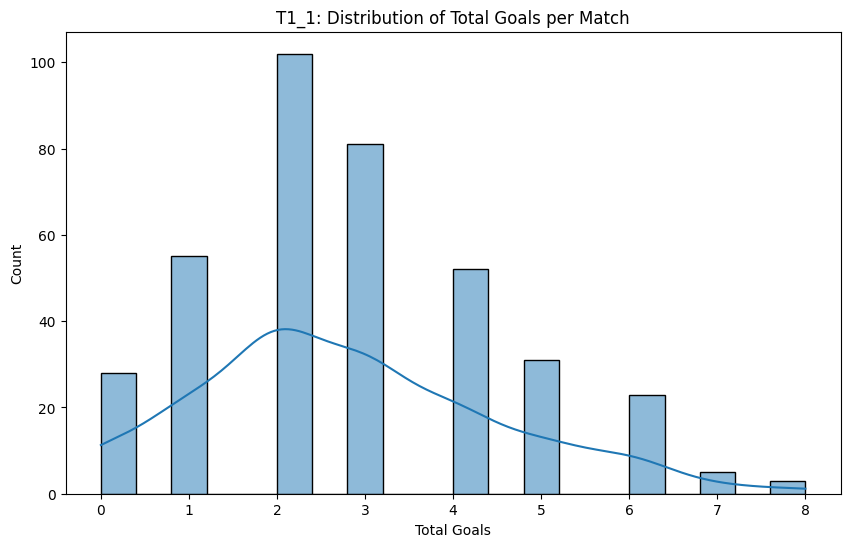


T1_1: Match Result Counts
Result
H    173
A    107
D    100
Name: count, dtype: int64


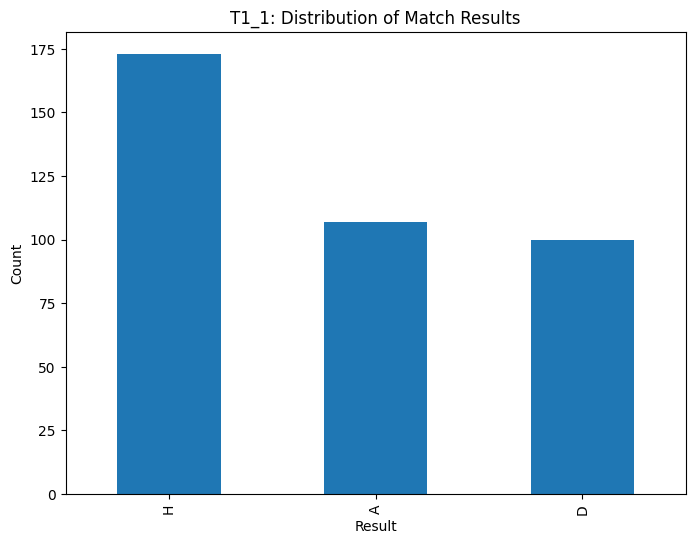


T1_1: Home Win Percentage: 45.53%

T1_1: Missing values
HTHG          1
HTAG          1
HTR           1
HS            1
AS            1
HST           1
AST           1
HF            1
AF            1
HC            1
AC            1
HY            1
AY            1
HR            1
AR            1
B365H         1
B365D         1
B365A         1
BWH           8
BWD           8
BWA           8
IWH         211
IWD         211
IWA         211
PSH           1
PSD           1
PSA           1
WHH           1
WHD           1
WHA           1
VCH           1
VCD           1
VCA           1
B365>2.5      1
B365<2.5      1
B365AHH       8
B365AHA       8
BWCH          8
BWCD          8
BWCA          8
IWCH        210
IWCD        210
IWCA        210
dtype: int64


Analyzing dataset: I2
Original shape: (40, 118)

I2: Descriptive statistics for Total Goals
count    40.000000
mean      2.350000
std       1.477177
min       0.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       5.000

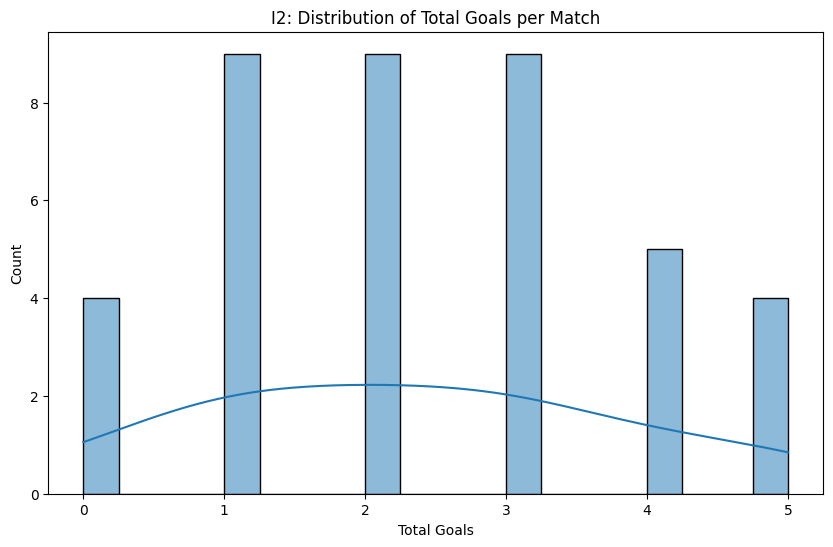


I2: Match Result Counts
Result
H    21
D    12
A     7
Name: count, dtype: int64


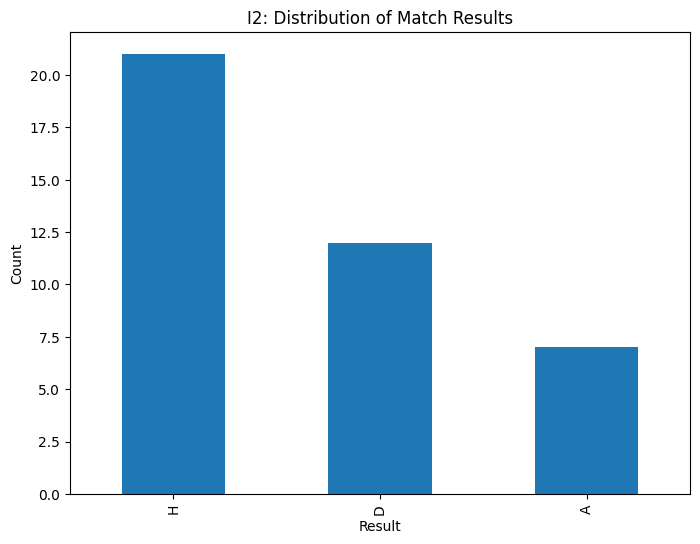


I2: Home Win Percentage: 52.50%

I2: Missing values
WHH        6
WHD        6
WHA        6
BFE>2.5    6
BFE<2.5    6
BFEAHH     7
BFEAHA     7
WHCH       6
WHCD       6
WHCA       6
dtype: int64


Analyzing dataset: E2_1
Original shape: (552, 105)

E2_1: Descriptive statistics for Total Goals
count    552.000000
mean       2.585145
std        1.520578
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max        7.000000
Name: TotalGoals, dtype: float64


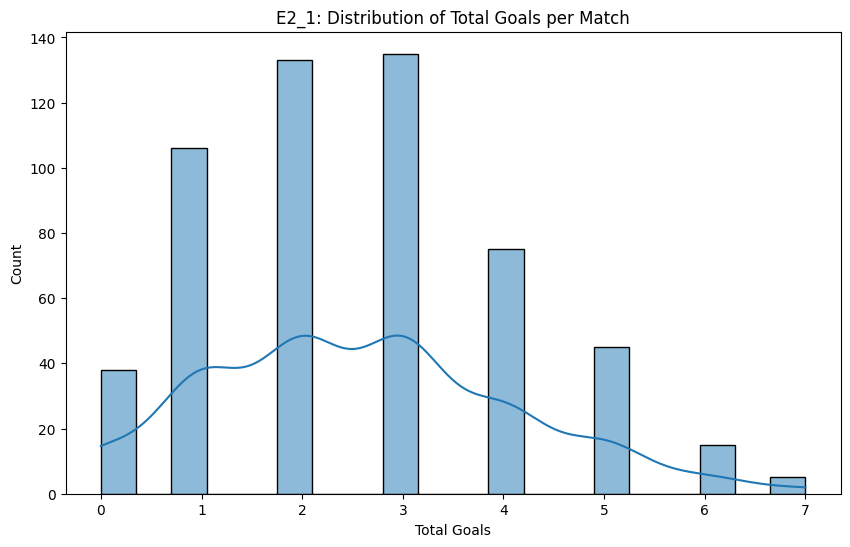


E2_1: Match Result Counts
Result
H    234
A    183
D    135
Name: count, dtype: int64


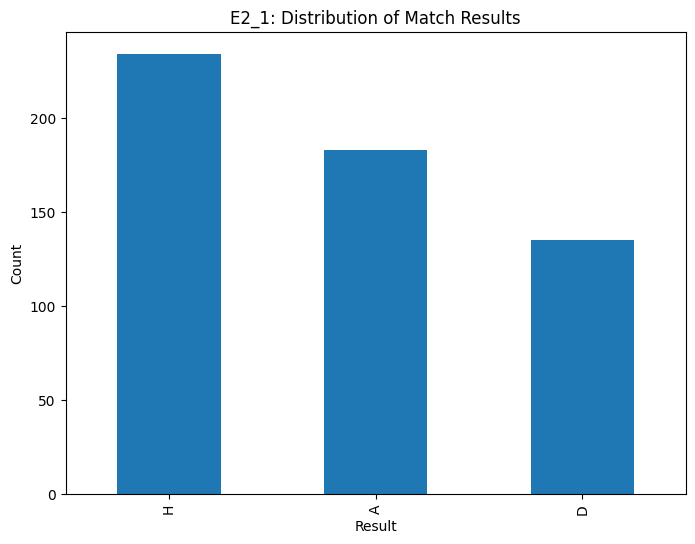


E2_1: Home Win Percentage: 42.39%

E2_1: Missing values
BWH       7
BWD       7
BWA       7
IWH     256
IWD     256
IWA     256
BWCH     17
BWCD     17
BWCA     17
IWCH    256
IWCD    256
IWCA    256
dtype: int64


Analyzing dataset: SC2_1
Original shape: (180, 105)

SC2_1: Descriptive statistics for Total Goals
count    180.000000
mean       3.172222
std        1.780812
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        9.000000
Name: TotalGoals, dtype: float64


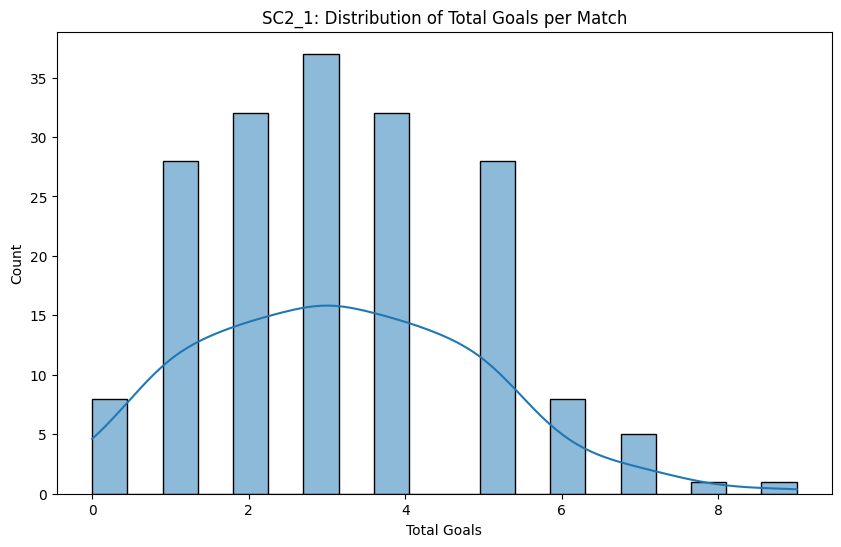


SC2_1: Match Result Counts
Result
H    74
A    65
D    41
Name: count, dtype: int64


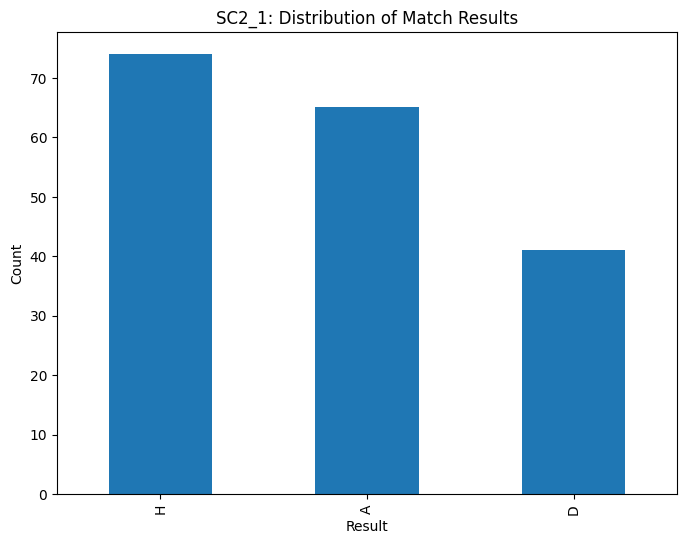


SC2_1: Home Win Percentage: 41.11%

SC2_1: Missing values
B365H        2
B365D        2
B365A        2
BWH         10
BWD         10
BWA         10
IWH         90
IWD         90
IWA         90
PSH         10
PSD         10
PSA         10
VCH          3
VCD          3
VCA          3
B365>2.5     2
B365<2.5     2
P>2.5       22
P<2.5       22
AHh         10
B365AHH     17
B365AHA     17
PAHH        10
PAHA        10
BWCH        10
BWCD        10
BWCA        10
IWCH        90
IWCD        90
IWCA        90
PC>2.5      13
PC<2.5      13
AHCh         1
B365CAHH     1
B365CAHA     1
dtype: int64


Analyzing dataset: RUS
Original shape: (2976, 21)

RUS: Descriptive statistics for Total Goals
count    2976.000000
mean        2.510417
std         1.620009
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        11.000000
Name: TotalGoals, dtype: float64


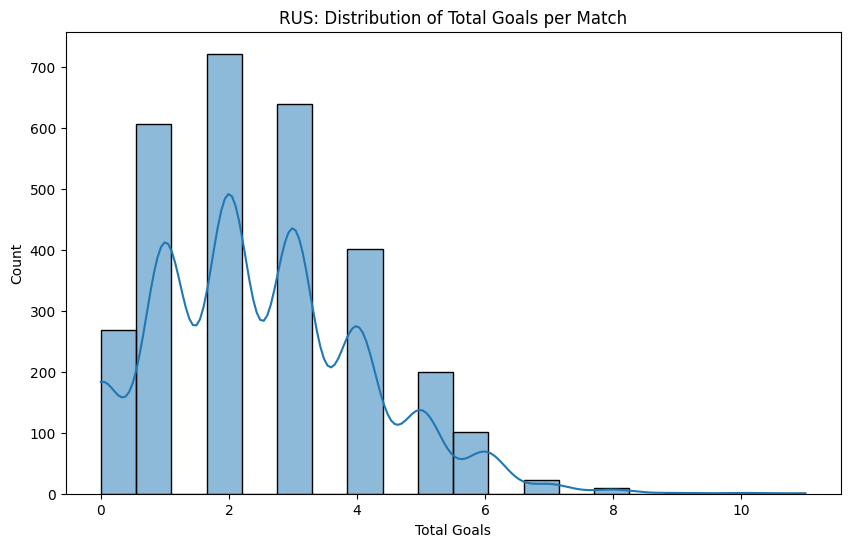


RUS: Match Result Counts
Result
H    1312
A     905
D     759
Name: count, dtype: int64


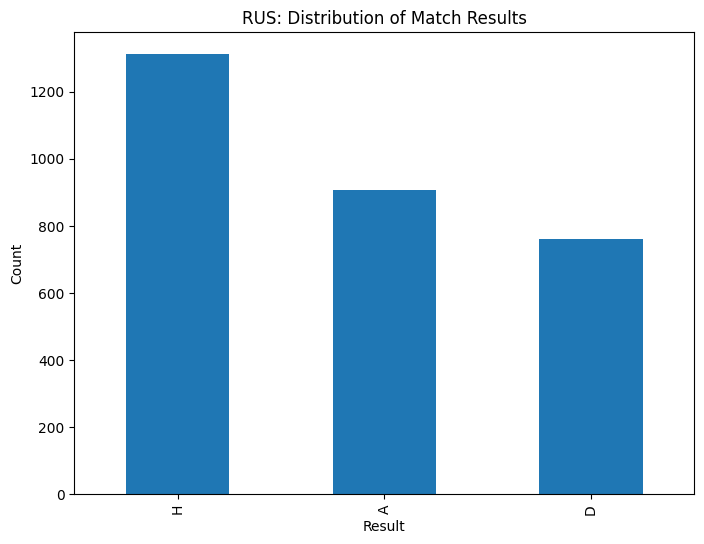


RUS: Home Win Percentage: 44.09%

RUS: Missing values
PSCH       35
PSCD       35
PSCA       35
MaxCH       2
MaxCD       2
MaxCA       2
AvgCH       2
AvgCD       2
AvgCA       2
BFECH    2976
BFECD    2976
BFECA    2976
dtype: int64


Analyzing dataset: N1_1
Original shape: (306, 104)

N1_1: Descriptive statistics for Total Goals
count    306.000000
mean       3.241830
std        1.714073
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        9.000000
Name: TotalGoals, dtype: float64


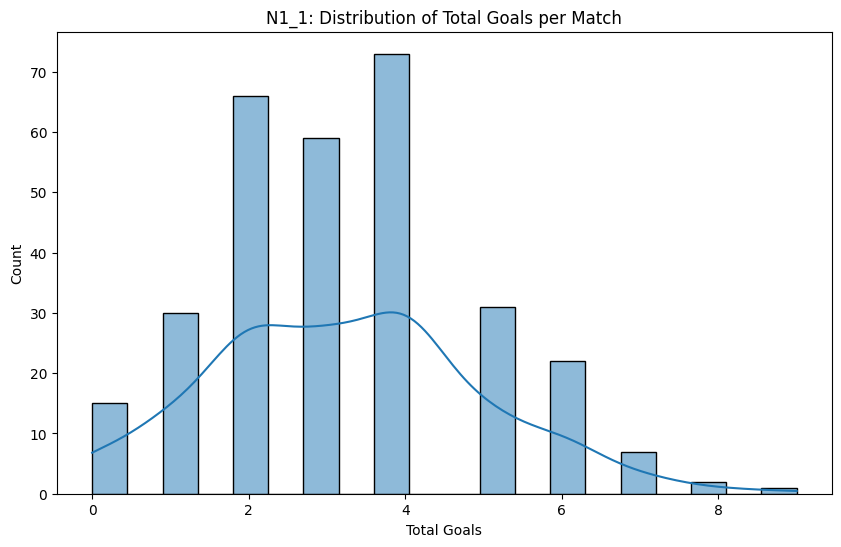


N1_1: Match Result Counts
Result
H    132
A     98
D     76
Name: count, dtype: int64


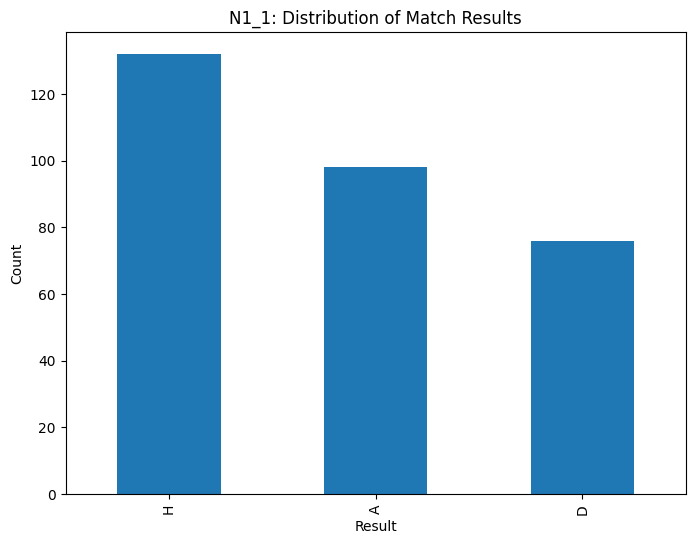


N1_1: Home Win Percentage: 43.14%

N1_1: Missing values
BWH       7
BWD       7
BWA       7
IWH     162
IWD     162
IWA     162
VCH       1
VCD       1
VCA       1
BWCH      6
BWCD      6
BWCA      6
IWCH    162
IWCD    162
IWCA    162
dtype: int64


Analyzing dataset: T1
Original shape: (33, 118)

T1: Descriptive statistics for Total Goals
count    33.000000
mean      2.848485
std       1.970425
min       0.000000
25%       1.000000
50%       3.000000
75%       4.000000
max       7.000000
Name: TotalGoals, dtype: float64


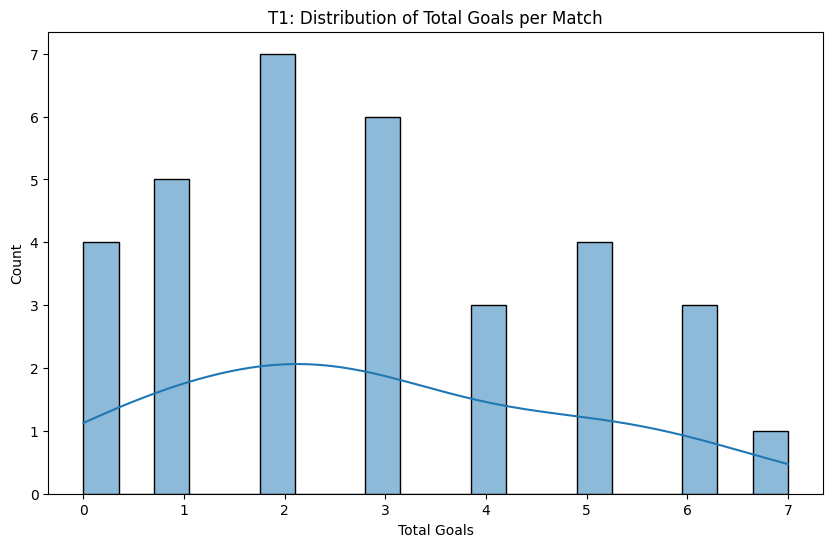


T1: Match Result Counts
Result
A    12
H    11
D    10
Name: count, dtype: int64


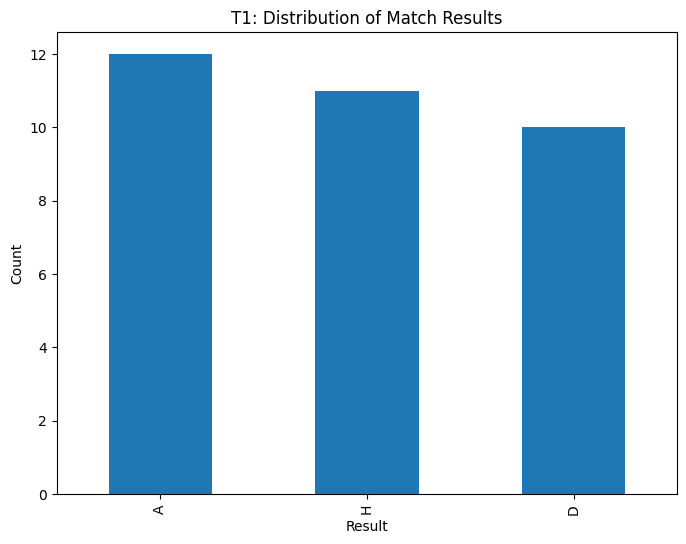


T1: Home Win Percentage: 33.33%

T1: Missing values
BFE>2.5     4
BFE<2.5     4
BFEAHH     17
BFEAHA     17
dtype: int64


Analyzing dataset: IRL
Original shape: (2343, 21)

IRL: Descriptive statistics for Total Goals
count    2343.000000
mean        2.584294
std         1.631655
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        11.000000
Name: TotalGoals, dtype: float64


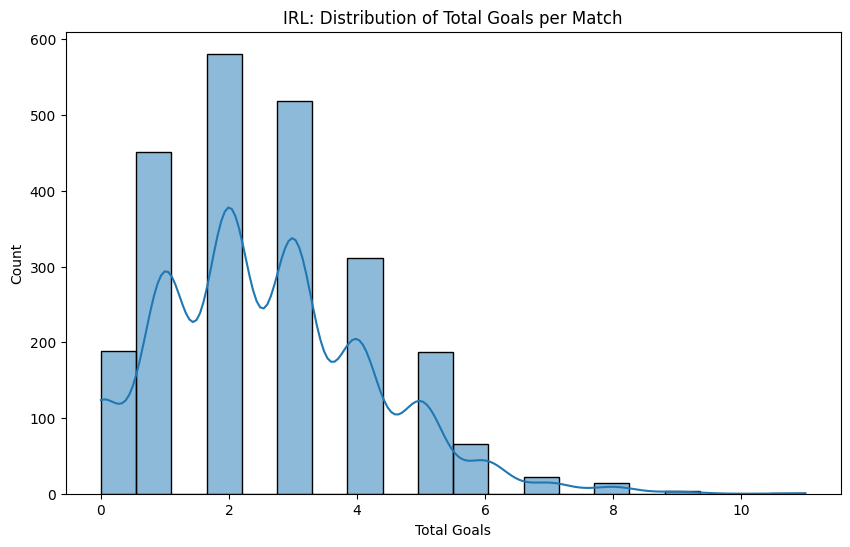


IRL: Match Result Counts
Result
H    1015
A     768
D     560
Name: count, dtype: int64


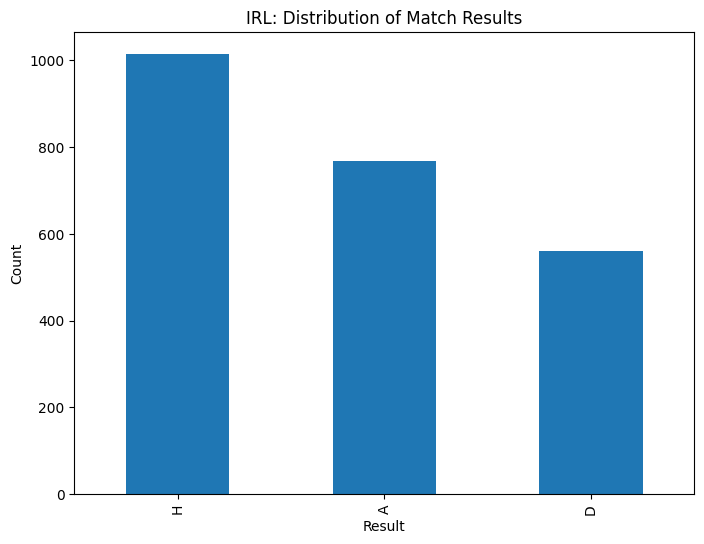


IRL: Home Win Percentage: 43.32%

IRL: Missing values
PSCH       14
PSCD       14
PSCA       14
BFECH    2318
BFECD    2318
BFECA    2318
dtype: int64


Analyzing dataset: E1_1
Original shape: (552, 105)

E1_1: Descriptive statistics for Total Goals
count    552.000000
mean       2.681159
std        1.579062
min        0.000000
25%        1.000000
50%        3.000000
75%        4.000000
max        8.000000
Name: TotalGoals, dtype: float64


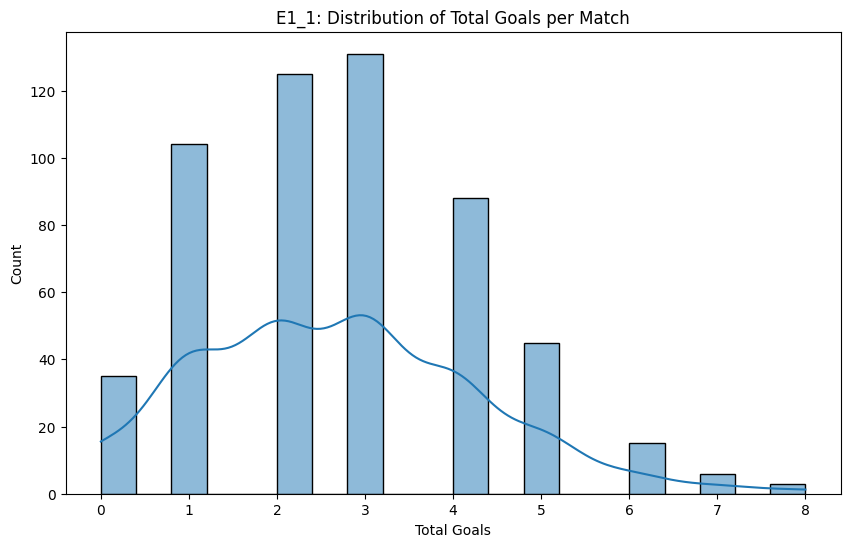


E1_1: Match Result Counts
Result
H    246
A    177
D    129
Name: count, dtype: int64


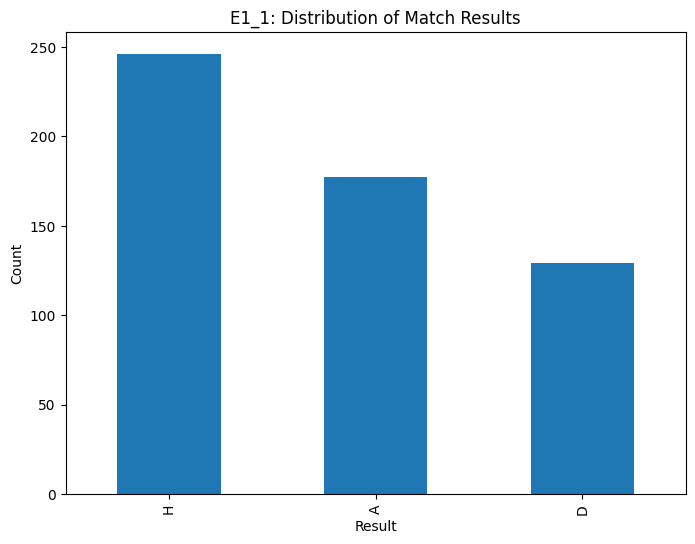


E1_1: Home Win Percentage: 44.57%

E1_1: Missing values
BWH       2
BWD       2
BWA       2
IWH     240
IWD     240
IWA     240
BWCH     14
BWCD     14
BWCA     14
IWCH    240
IWCD    240
IWCA    240
dtype: int64


Analyzing dataset: F1_1
Original shape: (306, 104)

F1_1: Descriptive statistics for Total Goals
count    306.000000
mean       2.699346
std        1.671693
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        9.000000
Name: TotalGoals, dtype: float64


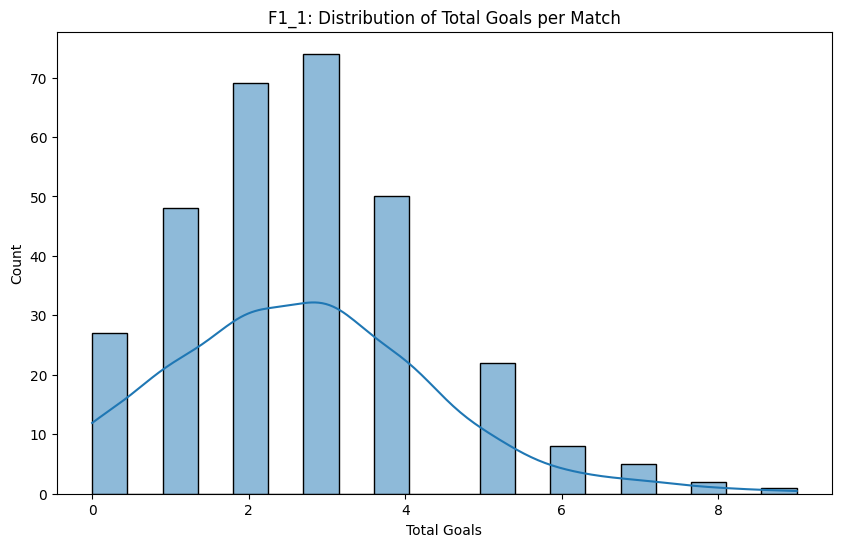


F1_1: Match Result Counts
Result
H    120
A    105
D     81
Name: count, dtype: int64


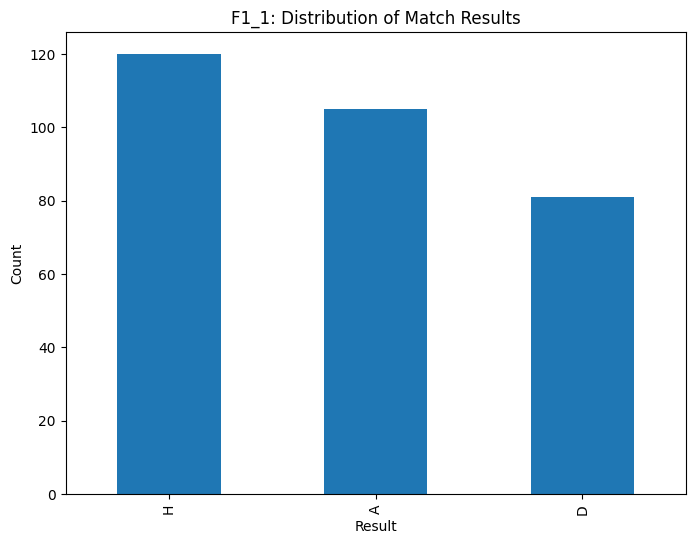


F1_1: Home Win Percentage: 39.22%

F1_1: Missing values
BWH       9
BWD       9
BWA       9
IWH     153
IWD     153
IWA     153
BWCH      9
BWCD      9
BWCA      9
IWCH    153
IWCD    153
IWCA    153
dtype: int64


Analyzing dataset: D2_1
Original shape: (306, 104)

D2_1: Descriptive statistics for Total Goals
count    306.000000
mean       3.094771
std        1.729448
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       10.000000
Name: TotalGoals, dtype: float64


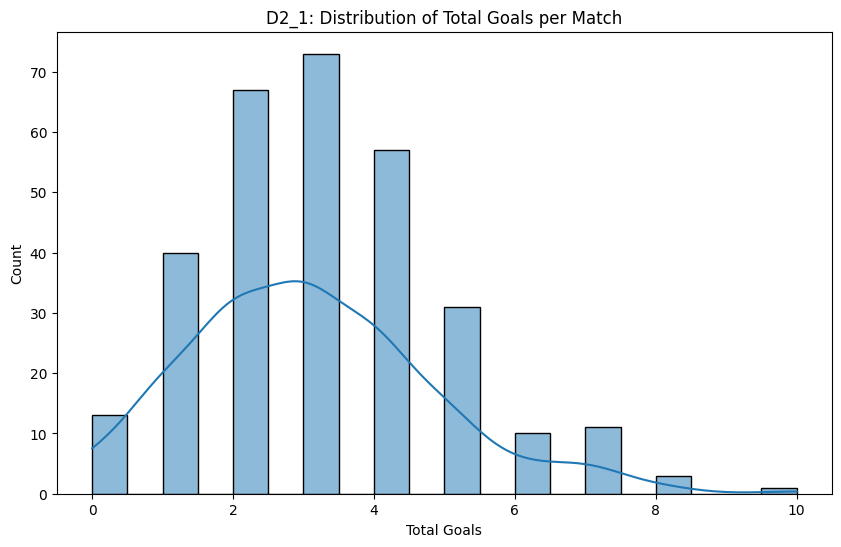


D2_1: Match Result Counts
Result
H    140
A     95
D     71
Name: count, dtype: int64


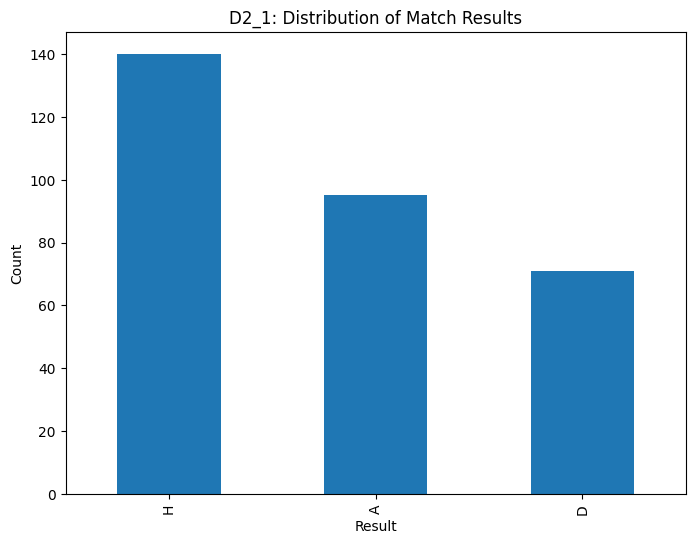


D2_1: Home Win Percentage: 45.75%

D2_1: Missing values
BWH       9
BWD       9
BWA       9
IWH     153
IWD     153
IWA     153
BWCH      9
BWCD      9
BWCA      9
IWCH    153
IWCD    153
IWCA    153
dtype: int64


Analyzing dataset: SP2
Original shape: (33, 118)

SP2: Descriptive statistics for Total Goals
count    33.000000
mean      2.454545
std       1.416221
min       0.000000
25%       1.000000
50%       3.000000
75%       4.000000
max       4.000000
Name: TotalGoals, dtype: float64


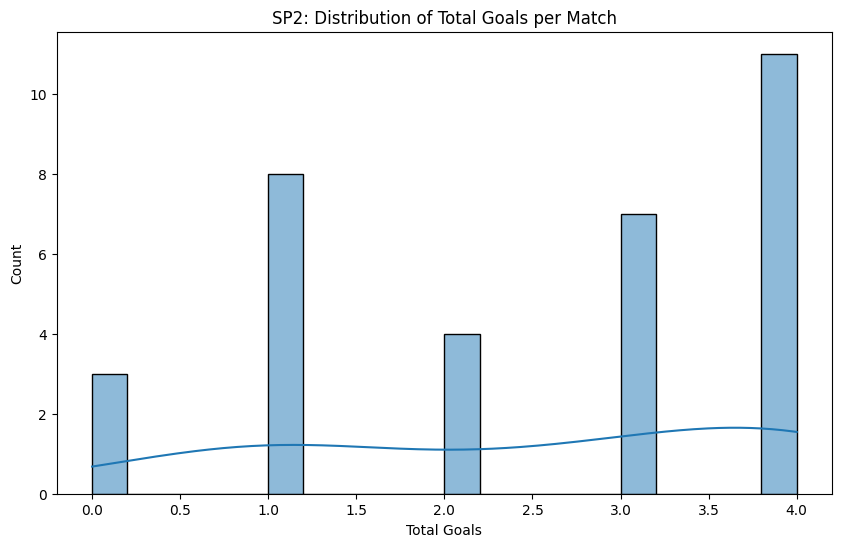


SP2: Match Result Counts
Result
A    12
D    12
H     9
Name: count, dtype: int64


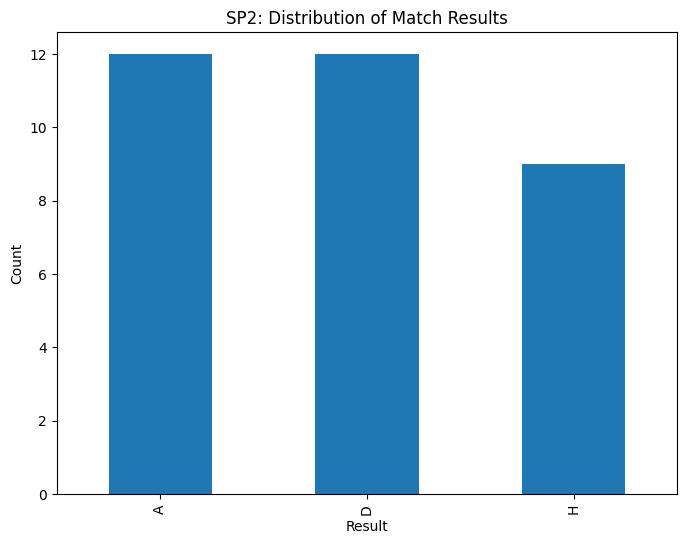


SP2: Home Win Percentage: 27.27%

SP2: Missing values
WHH        11
WHD        11
WHA        11
BFE>2.5    11
BFE<2.5    11
BFEAHH     15
BFEAHA     15
WHCH        9
WHCD        9
WHCA        9
dtype: int64


Analyzing dataset: SC1_1
Original shape: (180, 105)

SC1_1: Descriptive statistics for Total Goals
count    180.000000
mean       2.794444
std        1.700139
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        8.000000
Name: TotalGoals, dtype: float64


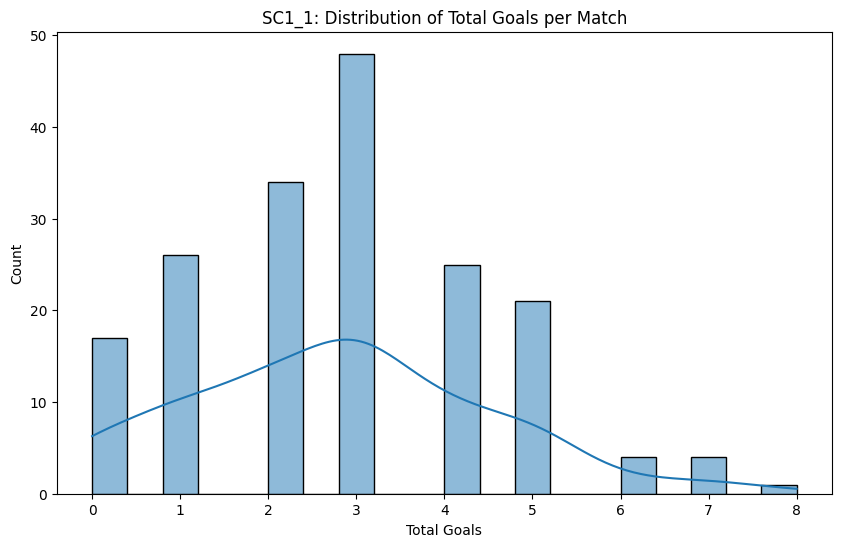


SC1_1: Match Result Counts
Result
A    67
H    66
D    47
Name: count, dtype: int64


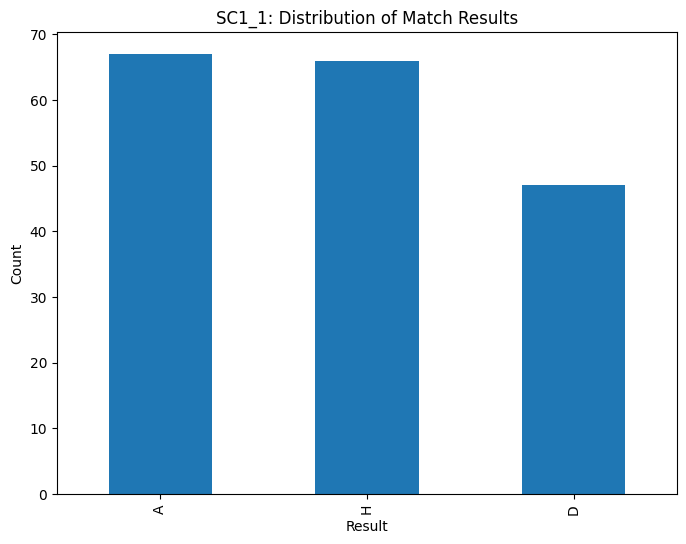


SC1_1: Home Win Percentage: 36.67%

SC1_1: Missing values
BWH         7
BWD         7
BWA         7
IWH        88
IWD        88
IWA        88
PSH         1
PSD         1
PSA         1
P>2.5       1
P<2.5       1
B365AHH     1
B365AHA     1
PAHH        1
PAHA        1
BWCH        7
BWCD        7
BWCA        7
IWCH       88
IWCD       88
IWCA       88
dtype: int64


Analyzing dataset: SP1
Original shape: (39, 118)

SP1: Descriptive statistics for Total Goals
count    39.000000
mean      2.358974
std       1.708911
min       0.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       7.000000
Name: TotalGoals, dtype: float64


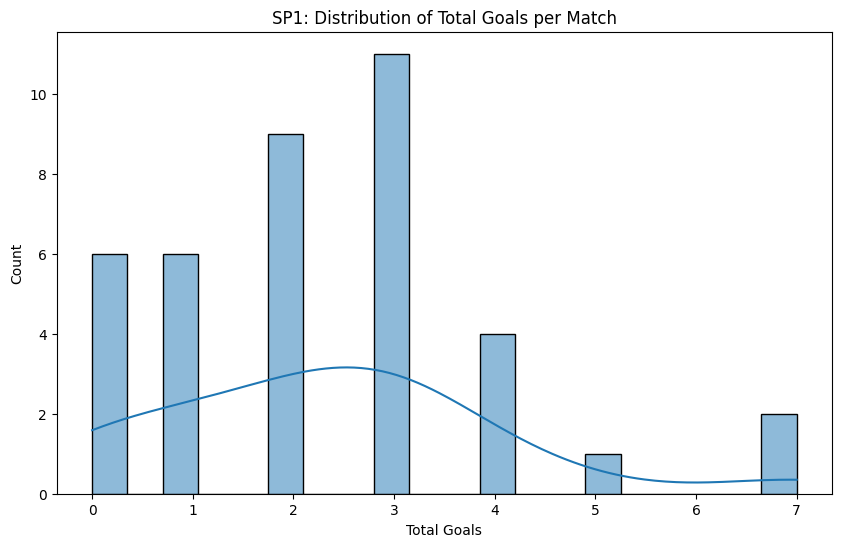


SP1: Match Result Counts
Result
H    16
D    14
A     9
Name: count, dtype: int64


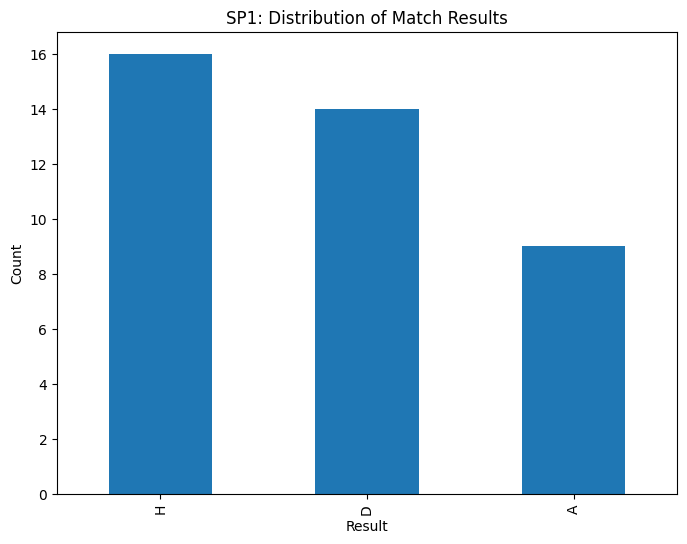


SP1: Home Win Percentage: 41.03%

SP1: Missing values
BFE>2.5    7
BFE<2.5    7
dtype: int64


Analyzing dataset: SC3
Original shape: (24, 119)

SC3: Descriptive statistics for Total Goals
count    24.000000
mean      2.500000
std       1.615146
min       0.000000
25%       1.000000
50%       2.000000
75%       3.250000
max       6.000000
Name: TotalGoals, dtype: float64


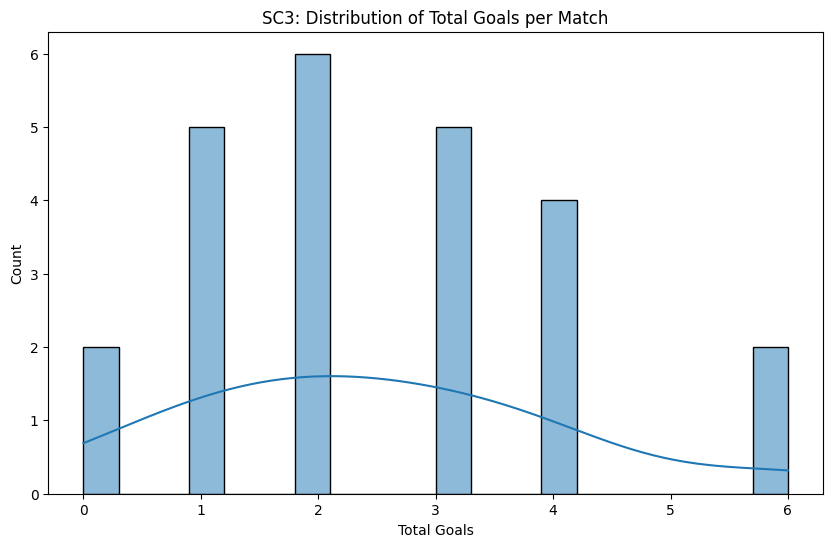


SC3: Match Result Counts
Result
H    11
A     7
D     6
Name: count, dtype: int64


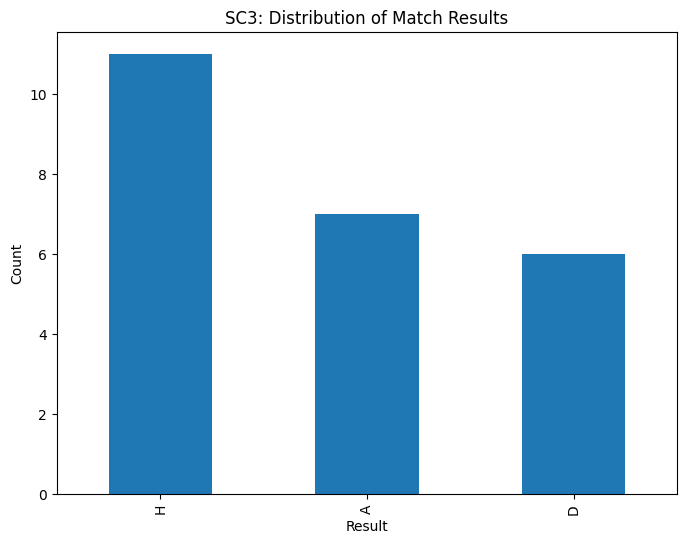


SC3: Home Win Percentage: 45.83%

SC3: Missing values
PSH        2
PSD        2
PSA        2
P>2.5      2
P<2.5      2
B365AHH    2
B365AHA    2
PAHH       2
PAHA       2
BFEAHH     1
BFEAHA     1
dtype: int64
Data analysis completed for all datasets.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to analyze each dataset
def analyze_dataset(df, name):
    print(f"\n\nAnalyzing dataset: {name}")
    print(f"Original shape: {df.shape}")

    # Automatically detect columns and standardize names
    rename_columns = {
        'HomeTeam': 'Home',
        'AwayTeam': 'Away',
        'FTHG': 'HG',
        'FTAG': 'AG',
        'FTR': 'Result',
        'Res': 'Result'
    }
    df.rename(columns=rename_columns, inplace=True)

    # Convert Date and Time to datetime if applicable
    if 'Date' in df.columns and 'Time' in df.columns:
        df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M')
        df.drop(['Date', 'Time'], axis=1, inplace=True)
    elif 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

    # Descriptive statistics for goals
    if 'HG' in df.columns and 'AG' in df.columns:
        df['TotalGoals'] = df['HG'] + df['AG']
        print(f"\n{name}: Descriptive statistics for Total Goals")
        print(df['TotalGoals'].describe())

        plt.figure(figsize=(10, 6))
        sns.histplot(df['TotalGoals'].dropna(), kde=True, bins=20)
        plt.title(f'{name}: Distribution of Total Goals per Match')
        plt.xlabel('Total Goals')
        plt.show()

    # Match results distribution
    if 'Result' in df.columns:
        print(f"\n{name}: Match Result Counts")
        result_counts = df['Result'].value_counts()
        print(result_counts)

        plt.figure(figsize=(8, 6))
        result_counts.plot(kind='bar')
        plt.title(f'{name}: Distribution of Match Results')
        plt.xlabel('Result')
        plt.ylabel('Count')
        plt.show()

    # Home advantage analysis
    if 'Result' in df.columns:
        home_wins = (df['Result'] == 'H').sum()
        total_games = len(df)
        home_win_percentage = home_wins / total_games * 100
        print(f"\n{name}: Home Win Percentage: {home_win_percentage:.2f}%")

    # Handle missing values
    missing_data = df.isnull().sum()
    if missing_data.sum() > 0:
        print(f"\n{name}: Missing values")
        print(missing_data[missing_data > 0])

# Perform analysis on all datasets
def analyze_all_datasets(datasets):
    for name, df in datasets.items():
        analyze_dataset(df, name)

# Analyze all datasets that were already loaded and datetime converted
analyze_all_datasets(football_datasets)

print("Data analysis completed for all datasets.")

**Feature Engineering**

In [4]:
import pandas as pd
import numpy as np
from datetime import timedelta

# Function to drop unwanted columns
def drop_unwanted_columns(df):
    columns_to_drop = [
        'B365', 'BF', 'BW', 'PS', 'WH', 'Max', 'Avg', 'Bb', '1X', 'LB', 'IW', 'VC', 'SO', 'PCAHA',
        'SJ', 'SY', 'GB', 'SB', 'SJD', 'SYD', 'SYA', 'VCH', 'VCD', 'VCA', 'BFE', 'IWH', 'IWD', 'PCAHH',
        'IWA', 'PAHH', 'PAHA', 'MaxAHH', 'MaxAHA', 'AvgAHH', 'AvgAHA', 'LBAH', 'LBAHH', 'LBAHA', 'PC<2.5',
        'B365AH', 'B365AHH', 'B365AHA', 'PAH', 'P>2.5', 'P<2.5', 'B365>2.5', 'B365<2.5', 'PC>2.5',
        'GB>2.5', 'GB<2.5', 'BbOU', 'BbMx>2.5', 'BbMx<2.5', 'BbAv>2.5', 'BbAv<2.5', 'AHh', 'AHCh'
    ]
    df = df.drop(columns=[col for col in df.columns if any(keyword in col for keyword in columns_to_drop)], errors='ignore')
    return df

# Function to assign the correct season based on the match date
def determine_season_from_date(date):
    if date.month >= 7:  # July and later are part of the next season (e.g., 24/25)
        return f"{date.year}/{str(date.year + 1)[-2:]}"
    else:  # January to June are part of the previous season (e.g., 23/24)
        return f"{date.year - 1}/{str(date.year)[-2:]}"

# Function to extract country and season based on the file name and add these as columns
def add_country_season_info(df, dataset_name):
    # Define mapping for known datasets
    dataset_info = {
        'SP1': ('Spain', 'La Liga'),
        'SP1_1': ('Spain', 'La Liga'),
        'USA': ('USA', 'MLS'),
        'T1': ('Turkey', 'Super Lig'),
        'T1_1': ('Turkey', 'Super Lig'),
        'E0': ('England', 'Premier League'),
        'E0_1': ('England', 'Premier League'),
        'SWZ': ('Switzerland', 'Swiss Super League'),
        'SWE': ('Sweden', 'Allsvenskan'),
        'SP2': ('Spain', 'Segunda Division'),
        'SP2_1': ('Spain', 'Segunda Division'),
        'SC1': ('Scotland', 'Scottish Championship'),
        'SC1_1': ('Scotland', 'Scottish Championship'),
        'SC2': ('Scotland', 'Scottish League One'),
        'SC2_1': ('Scotland', 'Scottish League One'),
        'SC3': ('Scotland', 'Scottish League Two'),
        'SC3_1': ('Scotland', 'Scottish League Two'),
        'SC0': ('Scotland', 'Scottish Premiership'),
        'SC0_1': ('Scotland', 'Scottish Premiership'),
        'RU': ('Russia', 'Russian Premier League'),
        'ROU': ('Romania', 'Liga I'),
        'P1': ('Portugal', 'Primeira Liga'),
        'P1_1': ('Portugal', 'Primeira Liga'),
        'POL': ('Poland', 'Ekstraklasa'),
        'NOR': ('Norway', 'Eliteserien'),
        'N1': ('Netherlands', 'Eredivisie'),
        'N1_1': ('Netherlands', 'Eredivisie'),
        'JPN': ('Japan', 'J1 League'),
        'I1': ('Italy', 'Serie A'),
        'I1_1': ('Italy', 'Serie A'),
        'I2': ('Italy', 'Serie B'),
        'I2_1': ('Italy', 'Serie B'),
        'IRL': ('Ireland', 'Premier Division'),
        'G1': ('Greece', 'Super League Greece'),
        'G1_1': ('Greece', 'Super League Greece'),
        'D1': ('Germany', 'Bundesliga'),
        'D1_1': ('Germany', 'Bundesliga'),
        'D2': ('Germany', '2. Bundesliga'),
        'D2_1': ('Germany', '2. Bundesliga'),
        'F1': ('France', 'Ligue 1'),
        'F1_1': ('France', 'Ligue 1'),
        'F2': ('France', 'Ligue 2'),
        'F2_1': ('France', 'Ligue 2'),
        'FIN': ('Finland', 'Veikkausliiga'),
        'EC': ('England', 'National League'),
        'EC_1': ('England', 'National League'),
        'E1': ('England', 'Championship'),
        'E1_1': ('England', 'Championship'),
        'E2': ('England', 'League One'),
        'E2_1': ('England', 'League One'),
        'E3': ('England', 'League Two'),
        'E3_1': ('England', 'League Two'),
        'ARG': ('Argentina', 'Primera Division'),
        'AUT': ('Austria', 'Bundesliga'),
        'B1': ('Belgium', 'Pro League'),
        'B1_1': ('Belgium', 'Pro League'),
        'BRA': ('Brazil', 'Serie A'),
        'CHN': ('China', 'Super League'),
        'DNK': ('Denmark', 'Superliga'),
    }

    # Determine country and league from dataset_info
    country, league = dataset_info.get(dataset_name.split('_')[0], ('Unknown', 'Unknown'))

    # Add 'Country' and 'League' information
    df['Country'] = country
    df['League'] = league

    # Use the DateTime column to determine the season for each match
    if 'DateTime' in df.columns:
        df['Season'] = df['DateTime'].apply(determine_season_from_date)

    return df

# Function to calculate points
def calculate_points(df, team_column, result_column):
    return df.apply(lambda x: 3 if x[result_column] == 'H' and x[team_column] == x['Home'] else
                               (3 if x[result_column] == 'A' and x[team_column] == x['Away'] else
                               (1 if x[result_column] == 'D' else 0)), axis=1)

# Function to calculate recent form (last 5 matches)
def calculate_recent_form(df, team_column, points_column):
    return df.groupby(team_column)[points_column].transform(lambda x: x.rolling(window=5, min_periods=1).sum())

# Function to calculate head-to-head record
def head_to_head(df, home_team, away_team):
    matches = df[((df['Home'] == home_team) & (df['Away'] == away_team)) | ((df['Home'] == away_team) & (df['Away'] == home_team))]
    home_wins = matches[matches['Result'] == 'H'].shape[0]
    away_wins = matches[matches['Result'] == 'A'].shape[0]
    draws = matches[matches['Result'] == 'D'].shape[0]
    return pd.Series([home_wins, away_wins, draws], index=['HomeTeamHeadToHeadWins', 'AwayTeamHeadToHeadWins', 'HeadToHeadDraws'])

# Function to identify top teams based on points
def get_top_teams(df, n=5):
    try:
        home_points = df.groupby('Home').apply(lambda x: (x['Result'] == 'H').sum() * 3 + (x['Result'] == 'D').sum())
        away_points = df.groupby('Away').apply(lambda x: (x['Result'] == 'A').sum() * 3 + (x['Result'] == 'D').sum())
        total_points = (home_points + away_points).sort_values(ascending=False)
        return total_points.head(n).index.tolist()
    except Exception as e:
        print(f"Error in get_top_teams: {str(e)}")
        print("Sample data:")
        print(df[['Home', 'Away', 'Result']].head())
        print("Data types:")
        print(df[['Home', 'Away', 'Result']].dtypes)
        return []

# Function to engineer features
def engineer_features(df, dataset_name, top_n_teams=5):
    print(f"Starting feature engineering for {dataset_name}. Initial shape: {df.shape}")

    # Add country and season information if necessary
    df = add_country_season_info(df, dataset_name)

    # Drop unwanted columns
    df = drop_unwanted_columns(df)

    required_columns = ['DateTime', 'Home', 'Away', 'HG', 'AG', 'Result']
    if not all(col in df.columns for col in required_columns):
        missing_cols = [col for col in required_columns if col not in df.columns]
        raise ValueError(f"Missing required columns: {missing_cols}")

    df['DateTime'] = pd.to_datetime(df['DateTime'])
    df = df.sort_values('DateTime')

    big_teams = get_top_teams(df, top_n_teams)
    print(f"Top {top_n_teams} teams based on overall performance: {big_teams}")

    # Calculate points for each team
    df['HomeTeamPoints'] = calculate_points(df, 'Home', 'Result')
    df['AwayTeamPoints'] = calculate_points(df, 'Away', 'Result')

    # Calculate recent form for each team
    df['HomeTeamRecentForm'] = calculate_recent_form(df, 'Home', 'HomeTeamPoints')
    df['AwayTeamRecentForm'] = calculate_recent_form(df, 'Away', 'AwayTeamPoints')

    # Calculate cumulative goal difference
    df['HomeTeamGoalDifference'] = df.groupby('Home').apply(lambda x: (x['HG'] - x['AG']).cumsum()).reset_index(drop=True)
    df['AwayTeamGoalDifference'] = df.groupby('Away').apply(lambda x: (x['AG'] - x['HG']).cumsum()).reset_index(drop=True)

    # Calculate head-to-head records
    head_to_head_records = df.apply(lambda x: head_to_head(df, x['Home'], x['Away']), axis=1)
    df = pd.concat([df, head_to_head_records], axis=1)

    # Additional Feature Engineering
    df['GoalDiff'] = df['HG'] - df['AG']

    # Feature: Average goals scored and conceded
    df['HomeTeamAvgGoalsScored'] = df.groupby('Home')['HG'].expanding().mean().reset_index(level=0, drop=True)
    df['AwayTeamAvgGoalsScored'] = df.groupby('Away')['AG'].expanding().mean().reset_index(level=0, drop=True)
    df['HomeTeamAvgGoalsConceded'] = df.groupby('Home')['AG'].expanding().mean().reset_index(level=0, drop=True)
    df['AwayTeamAvgGoalsConceded'] = df.groupby('Away')['HG'].expanding().mean().reset_index(level=0, drop=True)

    df['Home_IsBigTeam'] = df['Home'].isin(big_teams).astype(int)
    df['Away_IsBigTeam'] = df['Away'].isin(big_teams).astype(int)

    df['Home_CleanSheet'] = (df['AG'] == 0).astype(int)
    df['Away_CleanSheet'] = (df['HG'] == 0).astype(int)

    df['Home_FailureToScore'] = (df['HG'] == 0).astype(int)
    df['Away_FailureToScore'] = (df['AG'] == 0).astype(int)

    df['TotalGoals'] = df['HG'] + df['AG']

    for threshold in [1.5, 2.5, 3.5, 4.5]:
        df[f'Over_{threshold}_Goals'] = (df['TotalGoals'] > threshold).astype(int)
        df[f'Under_{threshold}_Goals'] = (df['TotalGoals'] <= threshold).astype(int)

    # Feature: Total fouls committed by both teams
    if 'HF' in df.columns and 'AF' in df.columns:
        df['TotalFouls'] = df['HF'] + df['AF']

    # Feature: Total corners by both teams
    if 'HC' in df.columns and 'AC' in df.columns:
        df['TotalCorners'] = df['HC'] + df['AC']

    # Feature: Total yellow cards by both teams
    if 'HY' in df.columns and 'AY' in df.columns:
        df['TotalYellowCards'] = df['HY'] + df['AY']

    # Feature: Total red cards by both teams
    if 'HR' in df.columns and 'AR' in df.columns:
        df['TotalRedCards'] = df['HR'] + df['AR']

    print(f"Feature engineering completed for {dataset_name}. Final shape: {df.shape}")
    return df



def group_and_combine_datasets(datasets):
    grouped_datasets = {}

    # First, group datasets by the main identifier and season (e.g., SP1_23/24, SP1_24/25)
    for dataset_name, df in datasets.items():
        main_id = dataset_name.split('_')[0]  # Get the main part (e.g., SP1 from SP1_1)
        if main_id not in grouped_datasets:
            grouped_datasets[main_id] = []
        grouped_datasets[main_id].append((dataset_name, df))

    # Now combine datasets in chronological order for each identifier
    combined_datasets = {}
    for main_id, dataset_list in grouped_datasets.items():
        combined_df_list = []
        for dataset_name, df in dataset_list:
            # Add country, season, and league information to each DataFrame
            df = add_country_season_info(df, dataset_name)
            combined_df_list.append(df)

        # Concatenate the datasets for the same division, keeping seasons separated
        combined_df = pd.concat(combined_df_list, ignore_index=True)
        combined_df = combined_df.sort_values(by=['Season', 'DateTime'])
        combined_datasets[main_id] = combined_df

    return combined_datasets



# Function to engineer features for all datasets
def engineer_all_datasets(datasets, top_n_teams=5):
    # Group and combine datasets by identifier (e.g., SP1, E0)
    combined_datasets = group_and_combine_datasets(datasets)

    engineered_dataframes = {}
    for main_id, combined_df in combined_datasets.items():
        try:
            engineered_df = engineer_features(combined_df.copy(), main_id, top_n_teams)
            engineered_dataframes[main_id] = engineered_df
            print(f"Feature engineering completed for {main_id}")
            print(f"New shape: {engineered_df.shape}")
            print(f"New features: {[col for col in engineered_df.columns if col not in combined_df.columns]}")
            print(f"All columns: {engineered_df.columns.tolist()}")
            print()
        except Exception as e:
            print(f"Error in feature engineering for {main_id}: {str(e)}")
            print("Data types:")
            print(combined_df.dtypes)
            print("Sample data:")
            print(combined_df.head().to_string())
    return engineered_dataframes


# Function to save the engineered datasets into separate folders as CSV files
def save_datasets_to_csv(engineered_dataframes, base_dir='engineered_datasets'):
    # Ensure the base directory exists
    os.makedirs(base_dir, exist_ok=True)

    for dataset_name, df in engineered_dataframes.items():
        try:
            # Create a directory for each dataset
            dataset_dir = os.path.join(base_dir, dataset_name)
            os.makedirs(dataset_dir, exist_ok=True)

            # Save the DataFrame as a CSV file inside the dataset's directory
            csv_file_path = os.path.join(dataset_dir, f'{dataset_name}_engineered.csv')
            df.to_csv(csv_file_path, index=False)

            print(f"Dataset {dataset_name} saved successfully to {csv_file_path}")
        except Exception as e:
            print(f"Error saving dataset {dataset_name}: {str(e)}")



# Perform feature engineering on all datasets that were already analyzed
engineered_datasets = engineer_all_datasets(football_datasets)
# After feature engineering, save the datasets for manual inspection
save_datasets_to_csv(engineered_datasets)

print("All datasets have been saved for inspection.")
print("Feature engineering completed for all datasets.")

# Print the first few rows of an engineered dataset ('E0') to verify
if 'EC' in engineered_datasets:
    print("\nFirst few rows of engineered EC dataset:")
    print(engineered_datasets['EC'].head().to_string())
    print("\nData types of engineered EC dataset:")
    print(engineered_datasets['EC'].dtypes)
else:
    print("\nE0 dataset not found in engineered dataframes.")

Starting feature engineering for B1. Initial shape: (624, 134)
Top 5 teams based on overall performance: ['St. Gilloise', 'Anderlecht', 'Club Brugge', 'Gent', 'Genk']
Feature engineering completed for B1. Final shape: (624, 58)
Feature engineering completed for B1
New shape: (624, 58)
New features: ['HomeTeamPoints', 'AwayTeamPoints', 'HomeTeamRecentForm', 'AwayTeamRecentForm', 'HomeTeamGoalDifference', 'AwayTeamGoalDifference', 'HomeTeamHeadToHeadWins', 'AwayTeamHeadToHeadWins', 'HeadToHeadDraws', 'GoalDiff', 'HomeTeamAvgGoalsScored', 'AwayTeamAvgGoalsScored', 'HomeTeamAvgGoalsConceded', 'AwayTeamAvgGoalsConceded', 'Home_IsBigTeam', 'Away_IsBigTeam', 'Home_CleanSheet', 'Away_CleanSheet', 'Home_FailureToScore', 'Away_FailureToScore', 'Over_1.5_Goals', 'Under_1.5_Goals', 'Over_2.5_Goals', 'Under_2.5_Goals', 'Over_3.5_Goals', 'Under_3.5_Goals', 'Over_4.5_Goals', 'Under_4.5_Goals', 'TotalFouls', 'TotalCorners', 'TotalYellowCards', 'TotalRedCards']
All columns: ['Div', 'Home', 'Away', 'HG'

In [6]:
!pip install --upgrade scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 68.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [ ]:
import sklearn
print(sklearn.__version__)

1.5.1


**Data Preparation (Not Used)**

In [ ]:
from collections import Counter
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, LeaveOneOut
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, label_binarize
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, Ridge
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from imblearn.over_sampling import SMOTE
import joblib
from sklearn.multioutput import MultiOutputRegressor, MultiOutputClassifier
import os
import matplotlib.pyplot as plt



# Utility Functions
def debug_nans(X, stage):
    print(f"\nDebugging NaNs at {stage}:")
    if isinstance(X, pd.DataFrame):
        print("NaN count per column:")
        print(X.isna().sum())
        print("\nData types of columns:")
        print(X.dtypes)
        print("\nSample of values:")
        print(X.head())
    elif isinstance(X, np.ndarray):
        print(f"Total NaNs: {np.isnan(X).sum()}")
        if np.isnan(X).any():
            nan_cols = np.isnan(X).any(axis=0)
            print(f"Columns with NaNs: {np.where(nan_cols)[0]}")
        print(f"Data type: {X.dtype}")
        print("Sample of values:")
        print(X[:5])
    else:
        print(f"Unsupported type: {type(X)}")
    print(f"Shape: {X.shape}")



def clean_data(X, y):
    # Separate numeric and non-numeric columns in X
    if isinstance(X, pd.DataFrame):
        numeric_cols = X.select_dtypes(include=['number']).columns
        non_numeric_cols = X.select_dtypes(exclude=['number']).columns

        # Handle missing values in numeric columns only
        nan_in_X = X[numeric_cols].isna()
        inf_in_X = X[numeric_cols].applymap(np.isinf)

        if nan_in_X.any().any():
            print(f"NaN values found in X: {nan_in_X.sum().sum()}. Replacing with mean.")
            X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].mean())

        if inf_in_X.any().any():
            print(f"Infinite values found in X: {inf_in_X.sum().sum()}. Replacing with large finite values.")
            X[numeric_cols] = X[numeric_cols].replace([np.inf, -np.inf], np.nan).fillna(1e10)



    # Check and handle NaNs in y (for target variable)
    if isinstance(y, pd.Series) and y.isna().sum() > 0:
        print(f"NaN values found in y: {y.isna().sum()}. Dropping rows with NaN in y.")
        non_nan_indices = ~y.isna()
        X = X[non_nan_indices]
        y = y[non_nan_indices]

    return X, y


# Function to drop highly correlated features
def drop_correlated_features(X, threshold=0.75):
    # Select only the numeric columns for correlation matrix computation
    numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

    if len(numeric_cols) == 0:
        print("No numeric columns found to compute correlation matrix.")
        return X  # Return the original dataframe if no numeric columns are found

    corr_matrix = X[numeric_cols].corr().abs()  # Compute correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Drop columns with correlation greater than the threshold
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    print(f"Dropping correlated features: {to_drop}")

    return X.drop(columns=to_drop, axis=1)



# Function to preprocess features
def preprocess_features(X):
    print(f"Initial X shape before preprocessing: {X.shape}")

    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_features = X.select_dtypes(include=['object']).columns.tolist()

    # Ensure that 'Country', 'Season', 'League' are treated as categorical features if they exist
    additional_categorical_features = ['Country', 'Season', 'League']
    categorical_features = [col for col in categorical_features if col in X.columns]  # Filter only existing categorical columns
    categorical_features.extend([col for col in additional_categorical_features if col in X.columns])

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)])


    return preprocessor


# Function to apply PCA while keeping 80% of the variance
def apply_pca(X, n_components=None):
    pca = PCA(n_components=n_components if n_components else 0.80)
    X_reduced = pca.fit_transform(X)
    return X_reduced, pca


# Function to apply SMOTE before dimensionality reduction
def apply_smote(X_train, y_train):
    print("Class distribution before SMOTE:", Counter(y_train))

    # Check if there are enough samples for SMOTE
    min_class_samples = min(Counter(y_train).values())
    if min_class_samples < 6:
        print(f"Not enough samples for SMOTE (minimum class has {min_class_samples} samples). Skipping SMOTE.")
        return X_train, y_train  # Skip SMOTE and return the original dataset

    smote = SMOTE(random_state=42, k_neighbors=min(5, min_class_samples - 1))  # Adjust k_neighbors if needed
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

    print("Class distribution after SMOTE:", Counter(y_resampled))
    return X_resampled, y_resampled


# Function to apply dimension reduction
def apply_dimensionality_reduction(X_train, X_test, n_components=50):
    min_samples = min(X_train.shape[0], X_test.shape[0])
    min_features = min(X_train.shape[1], X_test.shape[1])

    if n_components is None:
        n_components = max(1, min(min_samples, min_features, 100) - 1)
    else:
        n_components = min(n_components, min_samples - 1, min_features)

    print(f"Applying TruncatedSVD with n_components={n_components}")
    svd = TruncatedSVD(n_components=n_components, random_state=42)
    X_train_reduced = svd.fit_transform(X_train)
    X_test_reduced = svd.transform(X_test)

    print(f"Shapes after TruncatedSVD - Train: {X_train_reduced.shape}, Test: {X_test_reduced.shape}")
    return X_train_reduced, X_test_reduced, svd


# Function to perform feature selection
def feature_selection(X, y, num_features='auto'):
    selector = VarianceThreshold()
    X_selected = selector.fit_transform(X)

    if num_features == 'auto':
        # Ensure we don't select more features than we have samples
        num_features = max(1, min(X_selected.shape[1] // 3, X_selected.shape[0] - 1, 30))

    print(f"Selecting {num_features} features")
    feature_selector = SelectKBest(score_func=f_classif, k=num_features)
    X_selected = feature_selector.fit_transform(X_selected, y)

    print(f"Shape after feature selection: {X_selected.shape}")
    return X_selected, selector, feature_selector


def remove_leakage_features(df):
    # List of columns that are likely to contain post-game information
    leakage_columns = [
        'HG', 'AG', 'Result', 'HTHG', 'HTAG', 'HTR', 'TotalGoals',
        'GoalDiff', 'HomeTeamPoints', 'AwayTeamPoints', 'HomeTeamRecentForm',
        'AwayTeamRecentForm', 'HomeTeamGoalDifference', 'AwayTeamGoalDifference'
    ]

    print(f"Dropping potential data leakage columns: {leakage_columns}")
    df = df.drop(columns=[col for col in leakage_columns if col in df.columns], errors='ignore')
    return df


# Main Data Preparation and Model Training Function
def prepare_and_train(df, dataset_name):
    print(f"\nProcessing dataset: {dataset_name}")

    # Define the required columns for each task (if they exist in the dataset)
    columns_needed = {
        'match_winner': 'Result',
        'half_time_winner': 'HTR',
        'total_corners': ['HC', 'AC'],
        'over_under_goals': ['Over_1.5_Goals', 'Under_1.5_Goals', 'Over_2.5_Goals', 'Under_2.5_Goals',
                             'Over_3.5_Goals', 'Under_3.5_Goals', 'Over_4.5_Goals', 'Under_4.5_Goals']
    }

    # Create a dictionary to store available target variables
    available_targets = {}

    # Check if required columns are available for each prediction task
    for task, cols in columns_needed.items():
        if isinstance(cols, list):
            # For tasks requiring multiple columns (like total corners or over/under goals)
            if all(col in df.columns for col in cols):
                print(f"Columns found for {task}: {cols}")
                if task == 'total_corners':
                    # Create a total corners target
                    available_targets[task] = df['HC'] + df['AC']
                else:
                    # Over/Under Goals
                    available_targets.update({col: df[col] for col in cols})
        else:
            # For single-column tasks (like match_winner or half_time_winner)
            if cols in df.columns:
                print(f"Column found for {task}: {cols}")
                available_targets[task] = df[cols]

    # If none of the required columns are available, skip this dataset
    if not available_targets:
        print(f"Warning: Dataset '{dataset_name}' does not contain the necessary columns for any task.")
        return

    # Display the available target variables
    print(f"Available target variables for dataset '{dataset_name}': {list(available_targets.keys())}")

    # Extract only the column names for dropna
    available_columns = list(available_targets.keys())

    # Ensure we are working only with valid column names that exist in df
    available_columns = [col for col in available_columns if col in df.columns]

    if not available_columns:
        print(f"No valid columns to drop NA values in dataset '{dataset_name}'.")
        return

    # Now we can safely drop rows with missing values
    df.dropna(subset=available_columns, inplace=True)

    # Extract features and labels (we drop only available targets, not all)
    X = df.drop(columns=available_columns)

    # Convert categorical target variables (like match_winner, half_time_winner) to string
    for target in ['match_winner', 'half_time_winner']:
        if target in available_targets:
            available_targets[target] = available_targets[target].astype(str)

    # Handle NaN in target (y) by dropping rows where target is NaN
    for target in available_targets:
        if available_targets[target].isna().sum() > 0:
            print(f"NaN values found in {target}: Dropping rows with NaN in {target}.")
            non_nan_indices = ~available_targets[target].isna()

            # Synchronize dropping rows in X and target variables
            X = X[non_nan_indices]
            available_targets[target] = available_targets[target][non_nan_indices]

    # **Filter out rare classes with fewer than 2 instances**
    class_counts = available_targets['match_winner'].value_counts()
    valid_classes = class_counts[class_counts > 1].index
    filtered_indices = available_targets['match_winner'].isin(valid_classes)

    # Filter both X and y based on valid classes
    X = X[filtered_indices]
    available_targets['match_winner'] = available_targets['match_winner'][filtered_indices]

    print(f"After filtering, class distribution: {available_targets['match_winner'].value_counts()}")

    # Ensure consistent lengths of X and y
    min_length = min(len(X), *[len(available_targets[target]) for target in available_targets])
    print(f"Trimming dataset to {min_length} rows to ensure consistency.")
    X = X.iloc[:min_length]  # Trim X to the shortest length
    for target in available_targets:
        available_targets[target] = available_targets[target].iloc[:min_length]

    # Remove leakage features
    X = remove_leakage_features(X)

    # Handle missing values in X (impute or drop as needed)
    X, _ = clean_data(X, None)

    # Preprocess the features
    preprocessor = preprocess_features(X)
    X_preprocessed = preprocessor.fit_transform(X)
    print(f"X shape after preprocessing: {X_preprocessed.shape}")
    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, available_targets['match_winner'],
                                                        test_size=0.2, stratify=available_targets['match_winner'],
                                                        random_state=42)

    # Example for continuous targets like total_corners and over/under goals
    if any(target for target in available_targets if target.startswith('over') or target == 'total_corners'):
        continuous_targets = {k: v for k, v in available_targets.items() if k.startswith('over') or k == 'total_corners'}
        y_continuous = pd.DataFrame(continuous_targets)

        model = MultiOutputRegressor(Ridge())
        model.fit(X_preprocessed, y_continuous)

        print(f"Trained model for continuous targets (corners and over/under goals) in dataset '{dataset_name}'")

        # Save artifacts for continuous model
        save_artifacts(model, preprocessor, None, None, X_train, X_test, y_continuous, y_continuous, f'{dataset_name}_continuous')

    # Example for categorical targets like match_winner and half_time_winner
    if 'match_winner' in available_targets:
        match_winner_model = LogisticRegression(max_iter=1000, class_weight='balanced', penalty='l2', C=0.001)
        match_winner_model.fit(X_train, y_train)

        print(f"Trained model for match winner in dataset '{dataset_name}'")

        # Cross-validation for match_winner (as an example)
        kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        cv_scores = cross_val_score(match_winner_model, X_train, y_train, cv=kfold, scoring='accuracy')
        print(f"Cross-validation accuracy for match_winner: {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})")

        # Evaluate model performance on the test set
        y_pred = match_winner_model.predict(X_test)
        print("\nModel evaluation for match winner:")
        print(classification_report(y_test, y_pred))

        # Plot ROC-AUC curve if needed
        plot_roc_auc(y_test, y_pred, np.unique(y_test))

        # Save artifacts for match_winner_model
        save_artifacts(match_winner_model, preprocessor, None, None, X_train, X_test, y_train, y_test, f'{dataset_name}_match_winner')

    if 'half_time_winner' in available_targets:
        half_time_winner_model = LogisticRegression(max_iter=1000, class_weight='balanced', penalty='l2', C=0.001)
        half_time_winner_model.fit(X_preprocessed, available_targets['half_time_winner'])

        print(f"Trained model for half-time winner in dataset '{dataset_name}'")

        # Save artifacts for half_time_winner_model
        save_artifacts(half_time_winner_model, preprocessor, None, None, X_preprocessed, X_preprocessed,
                       available_targets['half_time_winner'], available_targets['half_time_winner'], f'{dataset_name}_half_time_winner')

    print(f"Completed processing for dataset '{dataset_name}'.")


# Plot ROC-AUC curve
def plot_roc_auc(y_true, y_pred, classes):
    y_true_bin = label_binarize(y_true, classes=classes)
    y_pred_bin = label_binarize(y_pred, classes=classes)
    fpr, tpr, _ = roc_curve(y_true_bin.ravel(), y_pred_bin.ravel())
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()


# Ensure consistent feature selection and dimensionality reduction
def preprocess_new_data(X_new, preprocessor, selector, feature_selector, dim_reduction):
    try:
        X_preprocessed = preprocessor.transform(X_new)
        X_selected = selector.transform(X_preprocessed)
        X_selected = feature_selector.transform(X_selected)
        X_reduced = dim_reduction.transform(X_selected)
        return X_reduced
    except ValueError as e:
        print(f"Error in preprocess_new_data: {e}")
        print(f"Shapes: X_new: {X_new.shape}, X_preprocessed: {X_preprocessed.shape}, "
              f"X_selected: {X_selected.shape}")
        raise


# Save artifacts for reuse and analysis
def save_artifacts(model, preprocessor, selector=None, dim_reduction=None, X_train=None, X_test=None, y_train=None, y_test=None, dataset_name="dataset"):
    # Create a folder for each dataset to store artifacts separately
    directory = f'prepared_data/{dataset_name}'
    os.makedirs(directory, exist_ok=True)

    model_path = os.path.join(directory, 'model.joblib')
    preprocessor_path = os.path.join(directory, 'preprocessor.joblib')
    selector_path = os.path.join(directory, 'selector.joblib') if selector else None
    dim_reduction_path = os.path.join(directory, 'dim_reduction.joblib') if dim_reduction else None

    # Save model and preprocessor
    joblib.dump(model, model_path)
    joblib.dump(preprocessor, preprocessor_path)
    print(f"Saved model and preprocessor for {dataset_name}")

    if selector:
        joblib.dump(selector, selector_path)
        print(f"Saved selector for {dataset_name}")

    if dim_reduction:
        joblib.dump(dim_reduction, dim_reduction_path)
        print(f"Saved dimensional reduction for {dataset_name}")

    # Save preprocessed data (optional, if needed for future use)
    if X_train is not None and X_test is not None:
        np.save(os.path.join(directory, 'X_train.npy'), X_train)
        np.save(os.path.join(directory, 'X_test.npy'), X_test)
        np.save(os.path.join(directory, 'y_train.npy'), y_train)
        np.save(os.path.join(directory, 'y_test.npy'), y_test)
        print(f"Saved training and test data for {dataset_name}")


# Process all datasets
for dataset_name, df in engineered_datasets.items():
    prepare_and_train(df, dataset_name)

print("\nAll datasets have been processed, and models have been trained and saved successfully.")

In [5]:
!pip install shap tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 3.5 MB/s eta 0:00:00


**Model Training**

In [ ]:
import os

def check_artifact_files(prepared_data_dir):
    for dataset in os.listdir(prepared_data_dir):
        dataset_dir = os.path.join(prepared_data_dir, dataset)
        if os.path.isdir(dataset_dir):
            print(f"\nChecking files in dataset directory: {dataset_dir}")
            print(os.listdir(dataset_dir))

prepared_data_dir = 'prepared_data'
check_artifact_files(prepared_data_dir)


Checking files in dataset directory: prepared_data/SP1_half_time_winner
['model.joblib', 'preprocessor.joblib', 'y_train.npy', 'X_train.npy', 'X_test.npy', 'y_test.npy']

Checking files in dataset directory: prepared_data/NOR_match_winner
['model.joblib', 'preprocessor.joblib', 'y_train.npy', 'X_train.npy', 'X_test.npy', 'y_test.npy']

Checking files in dataset directory: prepared_data/D1_continuous
['model.joblib', 'preprocessor.joblib', 'y_train.npy', 'X_train.npy', 'X_test.npy', 'y_test.npy']

Checking files in dataset directory: prepared_data/G1_match_winner
['model.joblib', 'preprocessor.joblib', 'y_train.npy', 'X_train.npy', 'X_test.npy', 'y_test.npy']

Checking files in dataset directory: prepared_data/E1_half_time_winner
['model.joblib', 'preprocessor.joblib', 'y_train.npy', 'X_train.npy', 'X_test.npy', 'y_test.npy']

Checking files in dataset directory: prepared_data/N1_half_time_winner
['model.joblib', 'preprocessor.joblib', 'y_train.npy', 'X_train.npy', 'X_test.npy', 'y_tes

**Data Preparation and Model Training**

Processing engineered dataset EC with shape (623, 49)

Processing dataset: EC
Dropping correlated features: ['TotalGoals', 'AwayTeamPoints', 'GoalDiff', 'Home_FailureToScore', 'Away_FailureToScore', 'Under_1.5_Goals', 'Over_2.5_Goals', 'Under_2.5_Goals', 'Over_3.5_Goals', 'Under_3.5_Goals', 'Over_4.5_Goals', 'Under_4.5_Goals', 'TotalRedCards']
X_train shape after preprocessing: (498, 149)
X_test shape after preprocessing: (125, 149)
Shape after feature selection: (627, 23)
X_train shape after feature selection: (627, 23)
X_test shape after feature selection: (125, 23)
Applying TruncatedSVD with n_components=23
Shapes after TruncatedSVD - Train: (627, 23), Test: (125, 23)
Training Logistic Regression with hyperparameter tuning...
Cross-validation scores: [0.98412698 1.         1.         1.         0.98412698 0.98412698
 1.         1.         1.         1.        ]
Mean CV score: 0.9952 (+/- 0.0145)
Best hyperparameters for Logistic Regression: {'solver': 'liblinear', 'penalty': 'l2', '

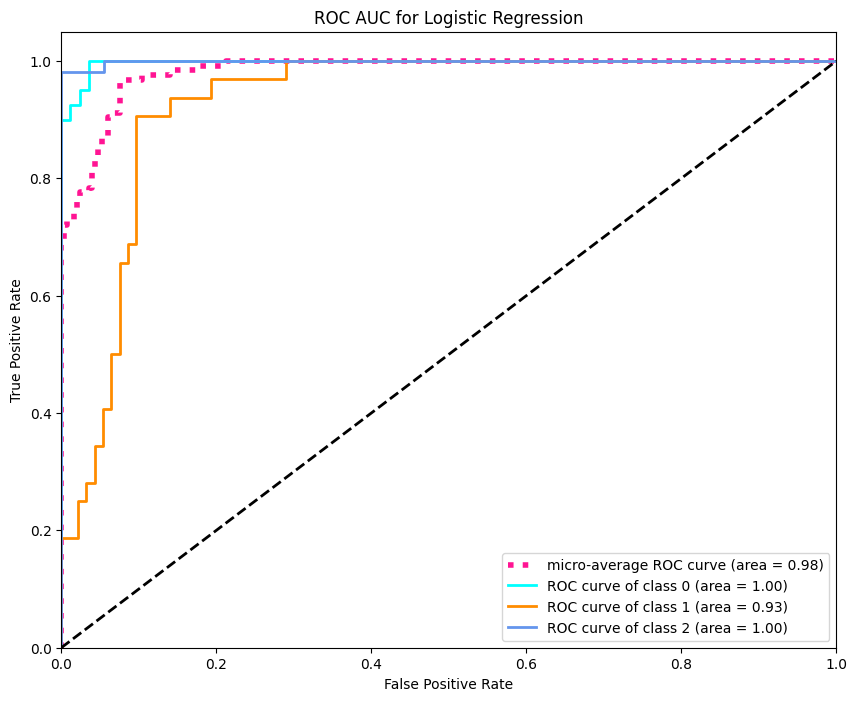

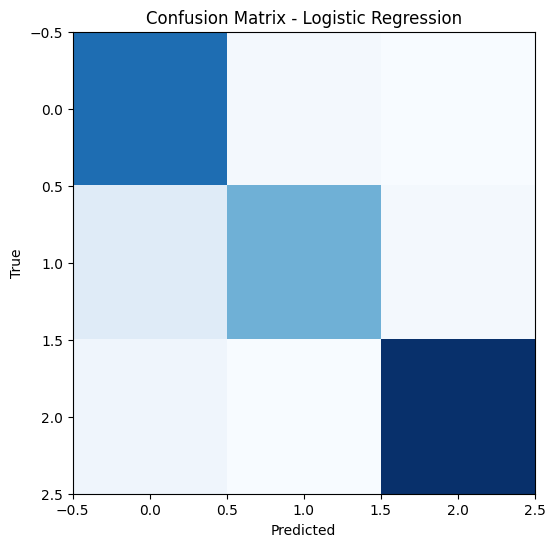

Model Logistic Regression saved at trained_models/EC/Logistic_Regression_model.joblib
Training Decision Tree with hyperparameter tuning...
Cross-validation scores: [0.92063492 0.9047619  0.92063492 0.98412698 0.98412698 0.93650794
 0.98412698 0.96774194 1.         0.98387097]
Mean CV score: 0.9587 (+/- 0.0653)
Best hyperparameters for Decision Tree: {'min_samples_split': 10, 'min_samples_leaf': 6, 'max_depth': None, 'criterion': 'gini'}
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91        40
           1       0.82      0.88      0.85        32
           2       0.98      0.92      0.95        53

    accuracy                           0.91       125
   macro avg       0.90      0.91      0.90       125
weighted avg       0.92      0.91      0.91       125

Confusion Matrix for Decision Tree:
[[37  3  0]
 [ 3 28  1]
 [ 1  3 49]]


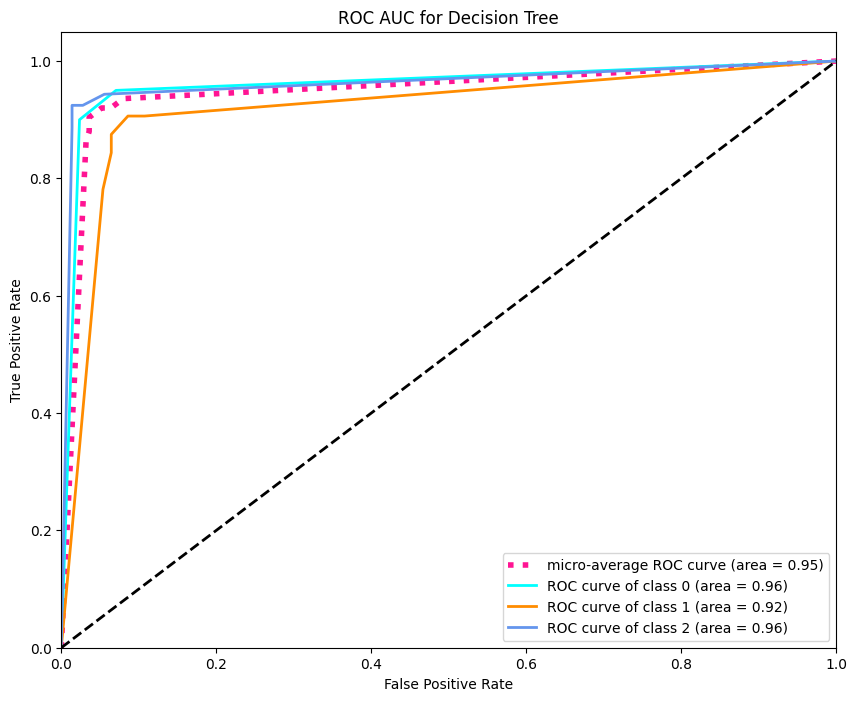

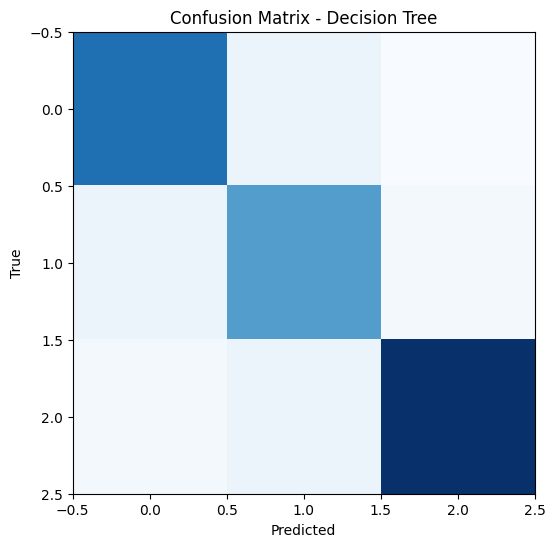

Model Decision Tree saved at trained_models/EC/Decision_Tree_model.joblib
Training Random Forest with hyperparameter tuning...
Cross-validation scores: [0.98412698 0.96825397 0.96825397 1.         0.96825397 0.98412698
 0.98412698 1.         1.         1.        ]
Mean CV score: 0.9857 (+/- 0.0264)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best hyperparameters for Random Forest: {'n_estimators': 450, 'min_samples_split': 20, 'min_samples_leaf': 25, 'max_features': 'sqrt', 'max_depth': 25}
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        40
           1       0.94      0.94      0.94        32
           2       1.00      0.98      0.99        53

    accuracy                           0.96       125
   macro avg       0.95      0.96      0.96       125
weighted avg       0.96      0.96      0.96       125

Confusion Matrix for Random Forest:
[[38  2  0]
 [ 2 30  0]
 [ 1  0 52]]


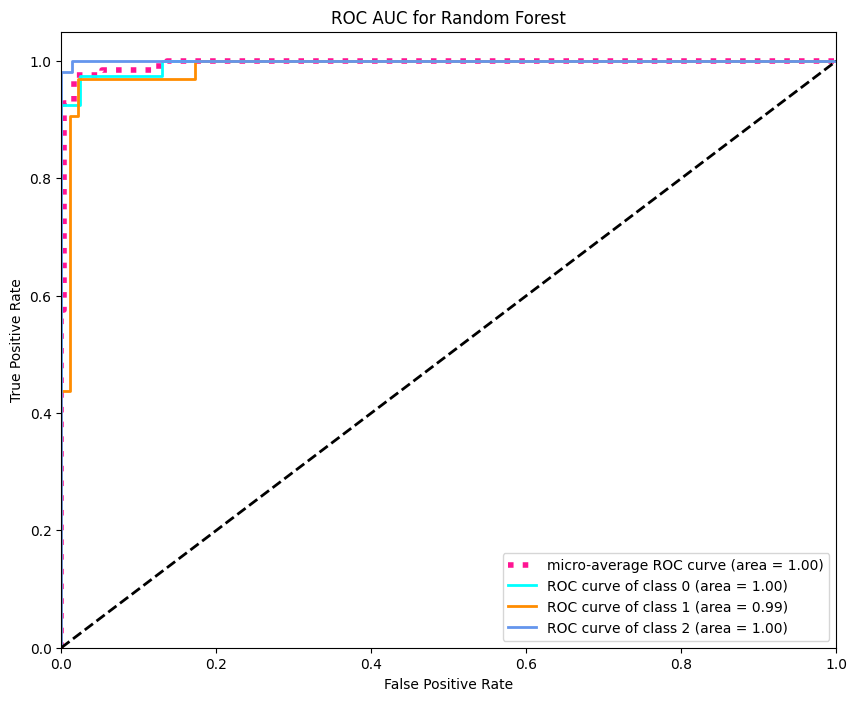

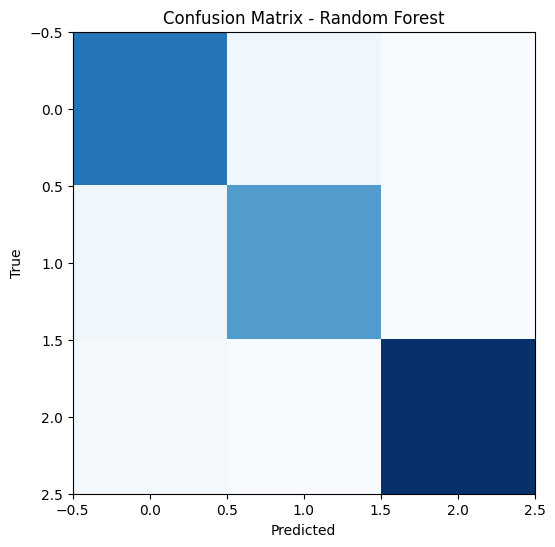

Model Random Forest saved at trained_models/EC/Random_Forest_model.joblib
Training XGBoost with hyperparameter tuning...
Cross-validation scores: [0.98412698 0.96825397 0.98412698 0.96825397 0.96825397 0.93650794
 1.         1.         1.         0.98387097]
Mean CV score: 0.9793 (+/- 0.0377)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:37:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_samples_leaf", "min_samples_split", "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Best hyperparameters for XGBoost: {'subsample': 0.4, 'n_estimators': 1000, 'min_samples_split': 17, 'min_samples_leaf': 8, 'min_child_weight': 9, 'max_depth': 1, 'learning_rate': 0.0005, 'gamma': 0.35, 'colsample_bytree': 0.7}
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        40
           1       0.82      0.84      0.83        32
           2       0.96      0.94      0.95        53

    accuracy                           0.91       125
   macro avg       0.90      0.90      0.90       125
weighted avg       0.91      0.91      0.91       125

Confusion Matrix for XGBoost:
[[37  3  0]
 [ 3 27  2]
 [ 0  3 50]]


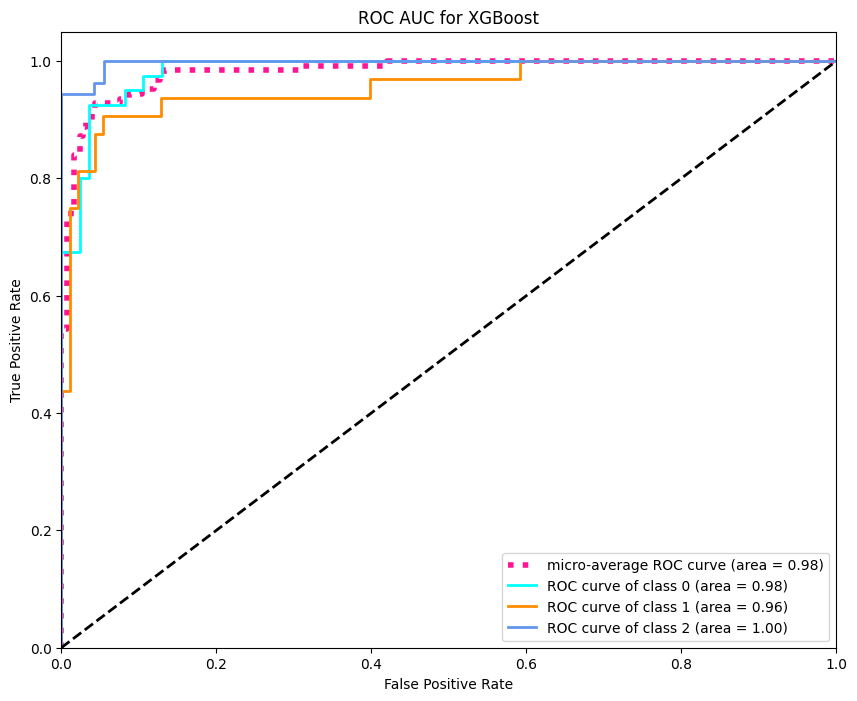

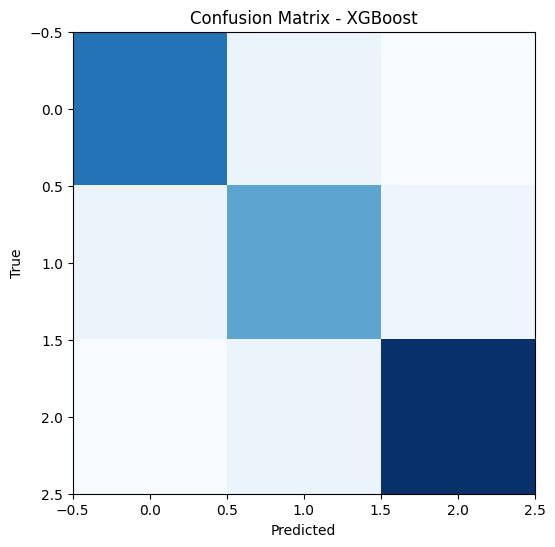

Model XGBoost saved at trained_models/EC/XGBoost_model.joblib
Training Neural Network with hyperparameter tuning...
Cross-validation scores: [1.         1.         1.         1.         0.98412698 0.98412698
 1.         1.         1.         1.        ]
Mean CV score: 0.9968 (+/- 0.0127)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best hyperparameters for Neural Network: {'solver': 'adam', 'momentum': 0.85, 'max_iter': 1000, 'learning_rate_init': 5e-05, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100, 150), 'batch_size': 128, 'alpha': 0.07, 'activation': 'tanh'}
Classification Report for Neural Network:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        40
           1       0.97      0.94      0.95        32
           2       1.00      1.00      1.00        53

    accuracy                           0.98       125
   macro avg       0.97      0.97      0.97       125
weighted avg       0.98      0.98      0.98       125

Confusion Matrix for Neural Network:
[[39  1  0]
 [ 2 30  0]
 [ 0  0 53]]


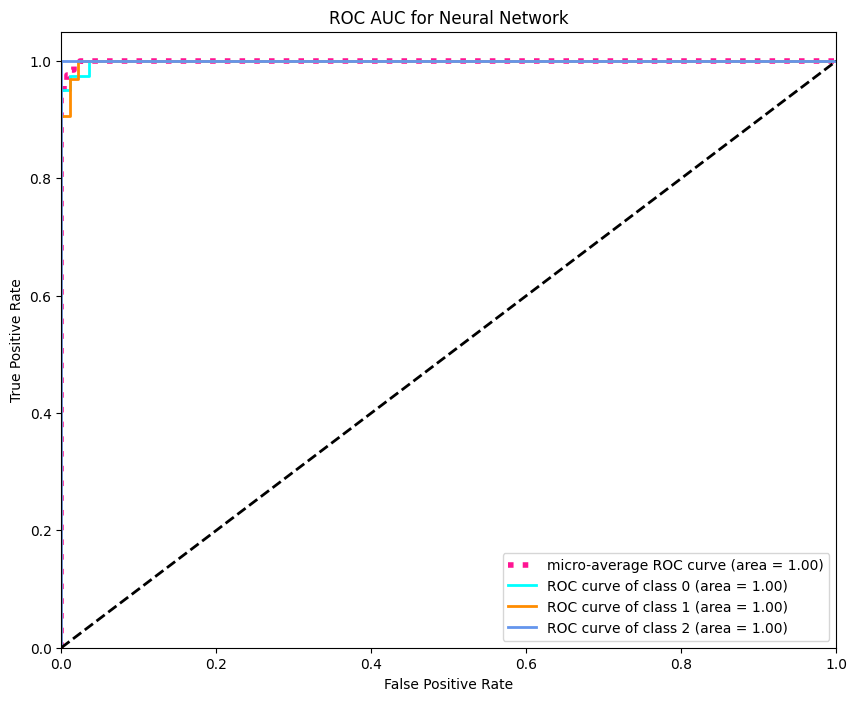

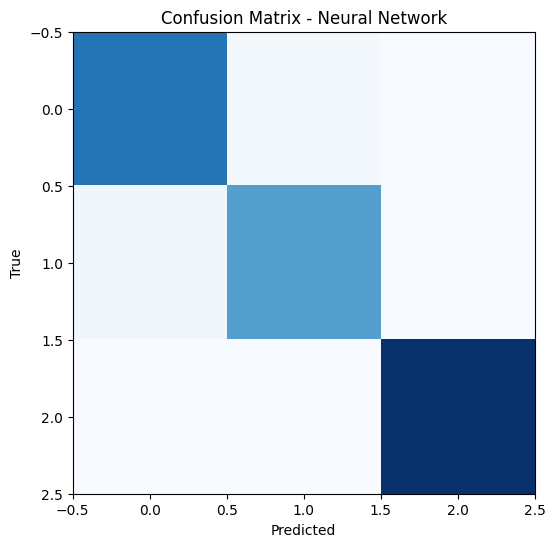

Model Neural Network saved at trained_models/EC/Neural_Network_model.joblib
Training SVM with hyperparameter tuning...
Cross-validation scores: [0.98412698 1.         1.         1.         0.98412698 0.98412698
 1.         1.         1.         1.        ]
Mean CV score: 0.9952 (+/- 0.0145)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best hyperparameters for SVM: {'kernel': 'rbf', 'gamma': 'scale', 'degree': 2, 'C': 0.1}
Classification Report for SVM:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        40
           1       0.91      1.00      0.96        32
           2       1.00      1.00      1.00        53

    accuracy                           0.98       125
   macro avg       0.97      0.97      0.97       125
weighted avg       0.98      0.98      0.98       125

Confusion Matrix for SVM:
[[37  3  0]
 [ 0 32  0]
 [ 0  0 53]]


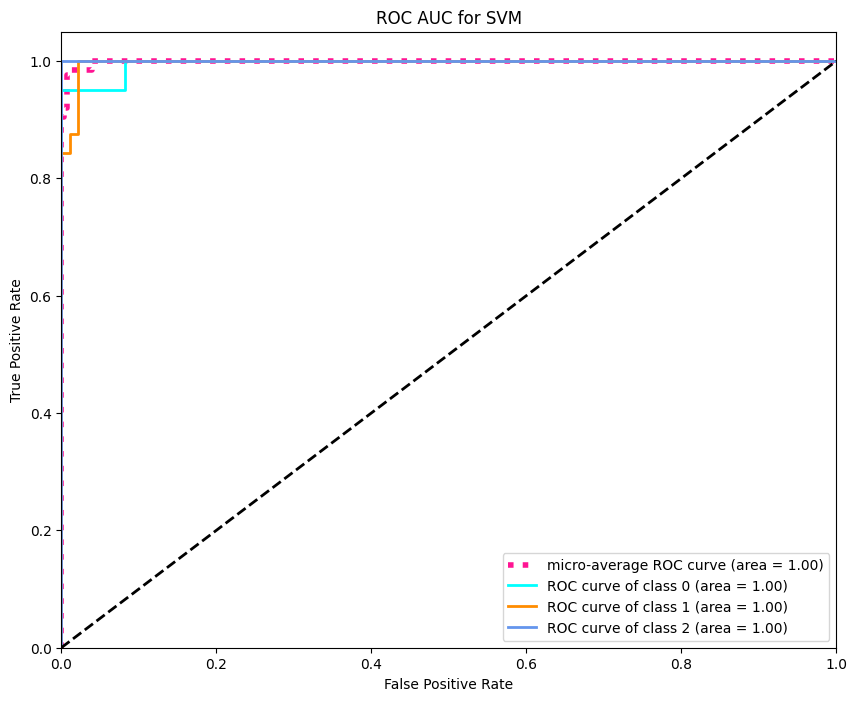

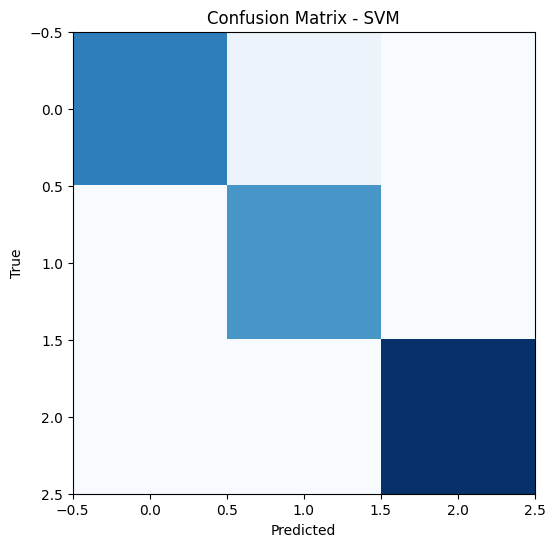

Model SVM saved at trained_models/EC/SVM_model.joblib
Training Gradient Boosting with hyperparameter tuning...
Cross-validation scores: [0.98412698 1.         0.95238095 0.98412698 0.98412698 0.95238095
 1.         0.98387097 1.         0.98387097]
Mean CV score: 0.9825 (+/- 0.0331)


KeyboardInterrupt: 

In [5]:
import os
import sys
import traceback
import multiprocessing
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.pipeline import Pipeline
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, label_binarize, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, f1_score, confusion_matrix, auc
from sklearn.base import clone, BaseEstimator, ClassifierMixin
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import VarianceThreshold, SelectFromModel
from itertools import cycle


class XGBoostWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, **kwargs):
        self.params = kwargs
        if 'objective' in self.params and self.params['objective'] == 'multi:softproba':
            self.params['objective'] = 'multi:softprob'
        self.model = None
        self.classes_ = None
        self.le = LabelEncoder()

    def fit(self, X, y, eval_set=None, early_stopping_rounds=None):
        self.le.fit(y)
        y_encoded = self.le.transform(y)
        self.classes_ = self.le.classes_

        # Set num_class parameter
        self.params['num_class'] = len(self.classes_)

        dtrain = xgb.DMatrix(X, label=y_encoded)

        if eval_set:
            eval_set = [(xgb.DMatrix(eval_set[0][0], label=self.le.transform(eval_set[0][1])), 'eval')]
        else:
            eval_set = []

        self.model = xgb.train(
            self.params,
            dtrain,
            num_boost_round=self.params.get('n_estimators', 100),
            evals=eval_set,
            early_stopping_rounds=early_stopping_rounds,
            verbose_eval=False
        )
        return self

    def predict(self, X):
        dtest = xgb.DMatrix(X)
        raw_pred = self.model.predict(dtest)
        return self.le.inverse_transform(raw_pred.argmax(axis=1))

    def predict_proba(self, X):
        dtest = xgb.DMatrix(X)
        return self.model.predict(dtest)

    def get_params(self, deep=True):
        return self.params

    def set_params(self, **params):
        self.params.update(params)
        return self


# Utility function to debug NaN values
def debug_nans(X, stage):
    print(f"\nDebugging NaNs at {stage}:")
    if isinstance(X, pd.DataFrame):
        print("NaN count per column:")
        print(X.isna().sum())
        print("\nData types of columns:")
        print(X.dtypes)
        print("\nSample of values:")
        print(X.head())
    elif isinstance(X, np.ndarray):
        print(f"Total NaNs: {np.isnan(X).sum()}")
        if np.isnan(X).any():
            nan_cols = np.isnan(X).any(axis=0)
            print(f"Columns with NaNs: {np.where(nan_cols)[0]}")
        print(f"Data type: {X.dtype}")
        print("Sample of values:")
        print(X[:5])
    else:
        print(f"Unsupported type: {type(X)}")
    print(f"Shape: {X.shape}")


# Utility Functions
def clean_data(X, y):
    if isinstance(X, pd.DataFrame):
        numeric_cols = X.select_dtypes(include=['number']).columns
        nan_in_X = X[numeric_cols].isna()
        inf_in_X = X[numeric_cols].apply(np.isinf)
        if nan_in_X.any().any():
            X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].mean())
        if inf_in_X.any().any():
            X[numeric_cols] = X[numeric_cols].replace([np.inf, -np.inf], np.nan).fillna(1e10)
    if isinstance(y, pd.Series) and y.isna().sum() > 0:
        non_nan_indices = ~y.isna()
        X = X[non_nan_indices]
        y = y[non_nan_indices]
    return X, y



def remove_leakage_features(df):
    leakage_columns = ['HG', 'AG', 'Result', 'HTHG', 'HTAG', 'HTR', 'TotalGoals', 'GoalDiff',
                       'HomeTeamPoints', 'AwayTeamPoints', 'HomeTeamRecentForm', 'AwayTeamRecentForm',
                       'HomeTeamGoalDifference', 'AwayTeamGoalDifference']
    return df.drop(columns=[col for col in leakage_columns if col in df.columns], errors='ignore')


# Preprocessing Functions
def preprocess_features(X):
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X.select_dtypes(include=['object', 'category']).columns

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    return preprocessor


# Function to apply PCA while keeping 80% of the variance
def apply_pca(X, n_components=0.80):
    pca = PCA(n_components=n_components)
    # pca = PCA(n_components=n_components if n_components else 0.80)
    return pca.fit_transform(X)


# Function to apply feature selection
def apply_feature_selection(X, y, k='auto'):
    # Variance Threshold to remove low-variance features
    selector = VarianceThreshold()
    X_selected = selector.fit_transform(X)

    # Using Random Forest to rank features by importance
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_selected, y)

    # Step 3: Select important features using SelectFromModel
    feature_selector = SelectFromModel(clf, prefit=True)
    X_selected = feature_selector.transform(X_selected)

    print(f"Shape after feature selection: {X_selected.shape}")

    return X_selected, selector, feature_selector


def apply_smote(X_train, y_train):
    class_counts = Counter(y_train)
    min_class_samples = min(class_counts.values())
    if min_class_samples < 6:
        print(f"Not enough samples for SMOTE (minimum class size: {min_class_samples}). Skipping SMOTE.")
        return X_train, y_train  # Skip SMOTE if too few samples
    smote = SMOTE(random_state=42, k_neighbors=min(5, min_class_samples - 1))
    return smote.fit_resample(X_train, y_train)


# Function to apply dimension reduction
def apply_dimensionality_reduction(X_train, X_test, n_components=50):
    min_samples = min(X_train.shape[0], X_test.shape[0])
    min_features = min(X_train.shape[1], X_test.shape[1])

    if n_components is None:
        n_components = max(1, min(min_samples, min_features, 100) - 1)
    else:
        n_components = min(n_components, min_samples - 1, min_features)

    print(f"Applying TruncatedSVD with n_components={n_components}")
    svd = TruncatedSVD(n_components=n_components, random_state=42)
    X_train_reduced = svd.fit_transform(X_train)
    X_test_reduced = svd.transform(X_test)

    print(f"Shapes after TruncatedSVD - Train: {X_train_reduced.shape}, Test: {X_test_reduced.shape}")
    return X_train_reduced, X_test_reduced, svd


# Function to drop highly correlated features
def drop_correlated_features(X, threshold=0.75):
    # Select only the numeric columns for correlation matrix computation
    numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

    if len(numeric_cols) == 0:
        print("No numeric columns found to compute correlation matrix.")
        return X  # Return the original dataframe if no numeric columns are found

    corr_matrix = X[numeric_cols].corr().abs()  # Compute correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Drop columns with correlation greater than the threshold
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    print(f"Dropping correlated features: {to_drop}")

    return X.drop(columns=to_drop, axis=1)


def plot_roc_auc(y_true, y_proba, classes, model_name):
    plt.figure(figsize=(10, 8))
    n_classes = len(classes)

    # Binarize the output
    y_test_bin = label_binarize(y_true, classes=range(n_classes))

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_proba.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Plot ROC curves
    plt.plot(fpr["micro"], tpr["micro"],
             label=f'micro-average ROC curve (area = {roc_auc["micro"]:.2f})',
             color='deeppink', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'ROC curve of class {classes[i]} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC AUC for {model_name}')
    plt.legend(loc="lower right")
    plt.show(f"{model_name}_ROC_AUC")
    plt.close()



# Function to plot confusion matrix
def plot_confusion_matrix_custom(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show(f"{model_name}_Confusion_Matrix")
    plt.close()


# Ensure consistent feature selection and dimensionality reduction
def preprocess_new_data(X_new, preprocessor, selector, feature_selector, dim_reduction):
    try:
        X_preprocessed = preprocessor.transform(X_new)
        X_selected = selector.transform(X_preprocessed)
        X_selected = feature_selector.transform(X_selected)
        X_reduced = dim_reduction.transform(X_selected)
        return X_reduced
    except ValueError as e:
        print(f"Error in preprocess_new_data: {e}")
        print(f"Shapes: X_new: {X_new.shape}, X_preprocessed: {X_preprocessed.shape}, "
              f"X_selected: {X_selected.shape}")
        raise


# Function to encode labels
def encode_labels(y):
    encoder = LabelEncoder()
    return encoder.fit_transform(y), encoder


# Function to save the models
def save_model(model, model_name, dataset_name):
    model_path = f'trained_models/{dataset_name}/{model_name.replace(" ", "_")}_model.joblib'
    os.makedirs(f'trained_models/{dataset_name}', exist_ok=True)
    joblib.dump(model, model_path)
    print(f"Model {model_name} saved at {model_path}")


# Define hyperparameters for tuning
def get_param_dists():
    return {
        'Logistic Regression': {
            'C': [0.0005, 0.0001, 0.0002, 0.00005], #'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
            'penalty': ['l2'],
            'solver': ['liblinear'],# 'saga'],# , 'lbfgs'],# , 'newton-cg'],
            'max_iter': [100, 200, 300]
        },
        'Decision Tree': {
            'max_depth': [None, 2, 5, 8, 10],
            'min_samples_split': [10, 15, 20],
            'min_samples_leaf': [6, 8, 10],
            'criterion': ['gini', 'entropy']
        },
        'Random Forest': {
            'n_estimators': [450],
            'max_depth': [25],
            'min_samples_split': [20],
            'min_samples_leaf': [25],
            'max_features': ['sqrt', 'log2']
        },
        'SVM': {
            'C': [0.1], # 1
            'kernel': ['rbf', 'poly'], # 'linear'
            'gamma': ['scale', 0.01, 0.1], # 'auto', 0.1, 1, 0.2,  0.001,
            'degree': [2] # 3
        },
        'XGBoost': {
            'learning_rate': [0.0005], # 0.01, 0.05, 0.1, 0.2
            'max_depth': [1], # None, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20
            'min_child_weight': [9], # 1, 3, 5, 7
            'min_samples_split': [17], # 2, 5, 10
            'min_samples_leaf': [8], # 1, 2, 4, 6
            'subsample': [0.4], # 0.6, 0.7, 0.8, 0.9, 1.0
            'colsample_bytree': [0.7, 0.8, 0.9, 1.0], # 0.6
            'gamma': [0.35], # 0, 0.1, 0.2, 0.3, 0.4
            'n_estimators': [1000]
        },
        'Neural Network': {
            'hidden_layer_sizes': [(100, 100), (100, 150), (150, 100)], # (150, 100), (100, 100, 50), (150, 150),
            'activation': ['tanh', 'relu'],
            'solver': ['adam'], # 'sgd', 'adam', 'lbfgs'
            'alpha': [0.07], # 0.0001, 0.001, 0.01, 0.1, 0.5, 0.75
            'learning_rate': ['adaptive'], # 'constant', 'adaptive'
            'learning_rate_init': [0.00005], # 0.00005, 0.0001, 0.0005, 0.001
            'max_iter': [1000], # 500, 600, 700,
            'momentum': [0.85], # 0.75, 0.8, 1, 0.9, 0.95,
            'batch_size': [128] # 32, 64, 128, 256,
        },
        'AdaBoost': {
            'n_estimators': [50, 100, 150],
            'learning_rate': [0.01, 0.1, 0.5, 1.0]
        },
        'Gradient Boosting': {
            'n_estimators': [50, 100, 200, 300, 500],
            'learning_rate': [0.001, 0.01, 0.05, 0.1],
            'max_depth': [1, 3, 5, 7],
            'min_samples_split': [5, 10, 15],
            'min_samples_leaf': [3, 5, 10],
            'subsample': [0.8, 0.9, 1.0]
        }
    }


# Define Models
def get_models():
    return {
        'Logistic Regression': LogisticRegression(class_weight='balanced'),
        'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
        'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
        'XGBoost': XGBoostWrapper(objective='multi:softprob', eval_metric='mlogloss', learning_rate=0.1, max_depth=6, random_state=42),
         'Neural Network': MLPClassifier(random_state=42),
        'SVM': SVC(probability=True, class_weight='balanced', random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'AdaBoost': AdaBoostClassifier(random_state=42)
    }


# Model training with hyperparameter tuning
def train_and_evaluate_models(X_train, y_train, X_test, y_test, models, param_dists, dataset_name):
    trained_models = {}
    skf = StratifiedKFold(n_splits=10)

    for model_name, model in models.items():
        try:
            print(f"Training {model_name} with hyperparameter tuning...")

            # Perform stratified cross-validation
            cv_scores = cross_val_score(model, X_train, y_train, cv=skf, scoring='accuracy')
            print(f"Cross-validation scores: {cv_scores}")
            print(f"Mean CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

            if model_name == 'XGBoost':
                # For XGBoost, we need to split the training data again to create a validation set
                X_train_xgb, X_val_xgb, y_train_xgb, y_val_xgb = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

                search = RandomizedSearchCV(
                    estimator=model,
                    param_distributions=param_dists[model_name],
                    n_iter=10,
                    cv=skf,
                    random_state=42,
                    n_jobs=-1
                )
                search.fit(
                    X_train_xgb,
                    y_train_xgb,
                    eval_set=[(X_val_xgb, y_val_xgb)],
                    early_stopping_rounds=10
                )
            else:
                search = RandomizedSearchCV(estimator=model, param_distributions=param_dists[model_name], n_iter=10, cv=skf, random_state=42, n_jobs=-1)
                search.fit(X_train, y_train)

            best_model = search.best_estimator_
            # Display the best hyperparameters
            print(f"Best hyperparameters for {model_name}: {search.best_params_}")

            y_pred = best_model.predict(X_test)
            y_proba = best_model.predict_proba(X_test)
            accuracy = accuracy_score(y_test, y_pred)

            print(f"Classification Report for {model_name}:\n{classification_report(y_test, y_pred)}")
            print(f"Confusion Matrix for {model_name}:\n{confusion_matrix(y_test, y_pred)}")

            plot_roc_auc(y_test, y_proba, np.unique(y_train), model_name)
            plot_confusion_matrix_custom(y_test, y_pred, model_name)

            save_model(best_model, model_name, dataset_name)

            trained_models[model_name] = best_model
        except Exception as e:
            print(f"Error training {model_name}: {str(e)}")
            print(traceback.format_exc())
    return trained_models



# Function to prepare and train the model
def prepare_and_train(df, dataset_name):
    try:
        print(f"\nProcessing dataset: {dataset_name}")

        # Checking for available target columns
        if 'Result' in df.columns:
            y = df['Result']
            X = df.drop(columns=['Result'])
        else:
            print(f"No 'Result' column found in {dataset_name}. Using first column as target.")
            y = df.iloc[:, 0]
            X = df.iloc[:, 1:]

        # Encode labels
        y_encoded, label_encoder = encode_labels(y)

        # Data Cleaning
        X, y_encoded = clean_data(X, y_encoded)
        X = drop_correlated_features(X, threshold=0.75)

        # Train/Test Split
        X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)


        # Preprocessing Features
        preprocessor = preprocess_features(X_train)
        X_train_preprocessed = preprocessor.fit_transform(X_train)
        X_test_preprocessed = preprocessor.transform(X_test)

        print(f"X_train shape after preprocessing: {X_train_preprocessed.shape}")
        print(f"X_test shape after preprocessing: {X_test_preprocessed.shape}")

        # Apply SMOTE
        if len(np.unique(y_train)) > 1:
            X_train_smote, y_train_smote = apply_smote(X_train_preprocessed, y_train)
        else:
            print(f"Only one class present in the training set for {dataset_name}. Skipping SMOTE.")
            X_train_smote, y_train_smote = X_train_preprocessed, y_train


        # Apply Feature Selection
        X_train_selected, selector, feature_selector = apply_feature_selection(X_train_smote, y_train_smote)
        X_test_selected = selector.transform(X_test_preprocessed)  # Apply the same transformation to the test set
        X_test_selected = feature_selector.transform(X_test_selected)


        print(f"X_train shape after feature selection: {X_train_selected.shape}")
        print(f"X_test shape after feature selection: {X_test_selected.shape}")

        # Dimensionality reduction
        X_train_reduced, X_test_reduced, svd = apply_dimensionality_reduction(X_train_selected, X_test_selected)

        # Model Training
        models = get_models()
        param_dists = get_param_dists()
        trained_models = train_and_evaluate_models(X_train_reduced, y_train_smote, X_test_reduced, y_test, models, param_dists, dataset_name)

        # Ensemble Training
        if trained_models:
            ensemble_estimators = [(name, model) for name, model in trained_models.items()]
            ensemble_clf = VotingClassifier(estimators=ensemble_estimators, voting='soft')
            ensemble_clf.fit(X_train_reduced, y_train_smote)

            # Evaluate Ensemble
            y_pred_ensemble = ensemble_clf.predict(X_test_reduced)
            y_proba_ensemble = ensemble_clf.predict_proba(X_test_reduced)
            accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)

            print(f"Classification Report for Ensemble Model:\n{classification_report(y_test, y_pred_ensemble, target_names=label_encoder.classes_)}")
            print(f"Confusion Matrix for Ensemble Model:\n{confusion_matrix(y_test, y_pred_ensemble)}")

            # Plotting
            unique_classes = np.unique(y_test)
            if len(np.unique(y_test)) > 1:
                plot_roc_auc(y_test, y_proba_ensemble, label_encoder.classes_, "Ensemble Model")
            else:
                print(f"Only one class present in the test set for {dataset_name}. Skipping ROC AUC plot.")

            plot_confusion_matrix_custom(y_test, y_pred_ensemble, "Ensemble Model")

            # Save the model
            save_model(ensemble_clf, "Ensemble_Model", dataset_name)

    except Exception as e:
        print(f"Error in prepare_and_train for dataset {dataset_name}: {str(e)}")
        print(traceback.format_exc())



def process_engineered_datasets(engineered_datasets):
    for dataset_name, df in engineered_datasets.items():
        try:
            print(f"Processing engineered dataset {dataset_name} with shape {df.shape}")
            prepare_and_train(df, dataset_name)
        except Exception as e:
            print(f"Error processing dataset {dataset_name}: {str(e)}")
            print(traceback.format_exc())



if __name__ == "__main__":
    prepared_data_dir = 'prepared_data'
    process_engineered_datasets(engineered_datasets)
    print("Training and evaluation complete for all models.")

In [7]:
!pip install scikeras tensorflow

INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 669.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 16.8 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Found 

In [ ]:
!pip install --upgrade scikit-learn
!pip install --upgrade scikeras

In [9]:
!pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 2.3 MB/s eta 0:00:00


**Model Training with Tensorflow**

Processing engineered dataset B1 with shape (624, 58)

Processing dataset: B1
Dropping correlated features: ['GoalDiff', 'Home_FailureToScore', 'Away_FailureToScore', 'Over_2.5_Goals', 'Under_3.5_Goals', 'Under_4.5_Goals', 'TotalYellowCards', 'TotalRedCards']
X shape after preprocessing: (624, 90)
Shape after feature selection: (624, 24)
Applying TruncatedSVD with n_components=24
Shapes after TruncatedSVD - Train: (624, 24), Test: (624, 24)
Training TensorFlow model on B1 with Stratified K-Fold cross-validation...

Training fold 1...
Train shape: (499, 24), Validation shape: (125, 24)
Train target distribution: [ 83  75 128 213], Validation target distribution: [21 19 32 53]
Applied SMOTE. Train shape after SMOTE: (852, 24)
Creating TensorFlow model with input_shape: 24, output_shape: 4
Input layer created with shape: (None, 24)
First Dense layer created with 131 units
Applied BatchNormalization and Dropout (rate=0.35)
Second Dense layer created with 262 units
Applied BatchNormalizatio

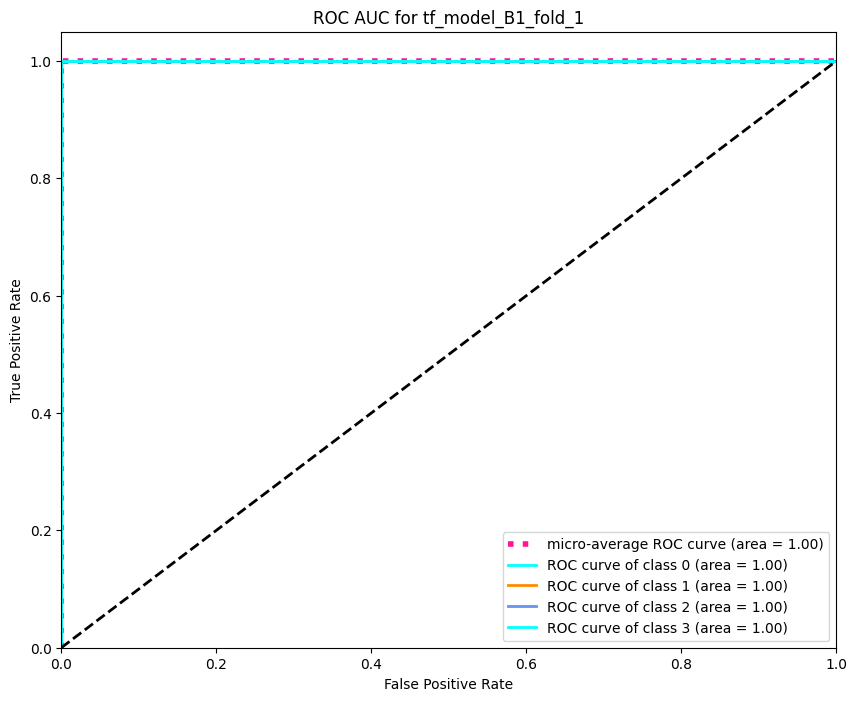

ROC AUC plotted


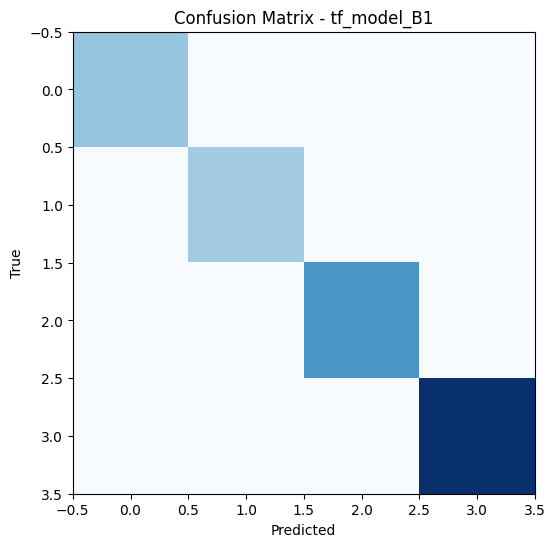

Confusion matrix plotted


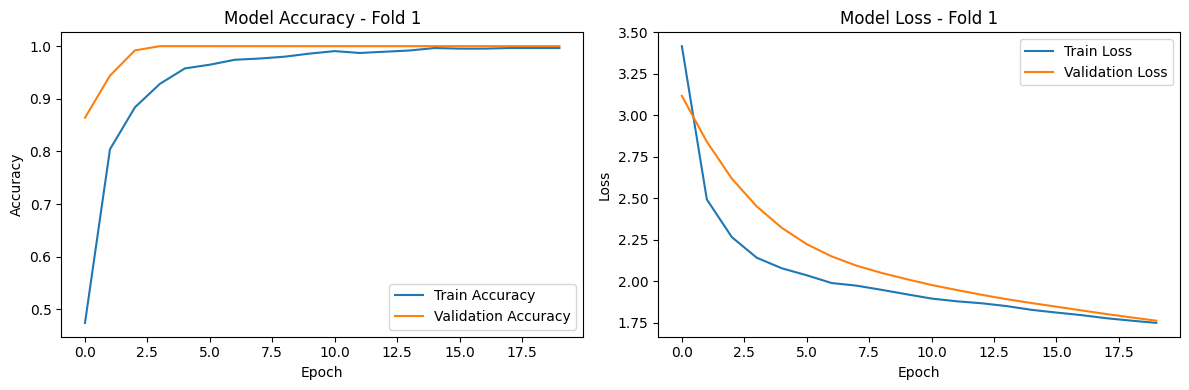

Training history plotted
Model tf_model_B1_fold_1 saved at tf_trained_models/SC3/models/tf_model_B1_fold_1_model.keras
Model for fold 1 saved

Training fold 2...
Train shape: (499, 24), Validation shape: (125, 24)
Train target distribution: [ 83  75 128 213], Validation target distribution: [21 19 32 53]
Applied SMOTE. Train shape after SMOTE: (852, 24)
Creating TensorFlow model with input_shape: 24, output_shape: 4
Input layer created with shape: (None, 24)
First Dense layer created with 131 units
Applied BatchNormalization and Dropout (rate=0.35)
Second Dense layer created with 262 units
Applied BatchNormalization and Dropout (rate=0.35) again
Third Dense layer created with 131 units
Applied BatchNormalization and Dropout (rate=0.35) again
Attention layer output shape: (None, 131)
Concatenated attention output with previous layer. Shape: (None, 262)
Flattened the output. Shape: (None, 262)
Final Dense layer created with 65 units
Applied BatchNormalization and Dropout (rate=0.35) on f

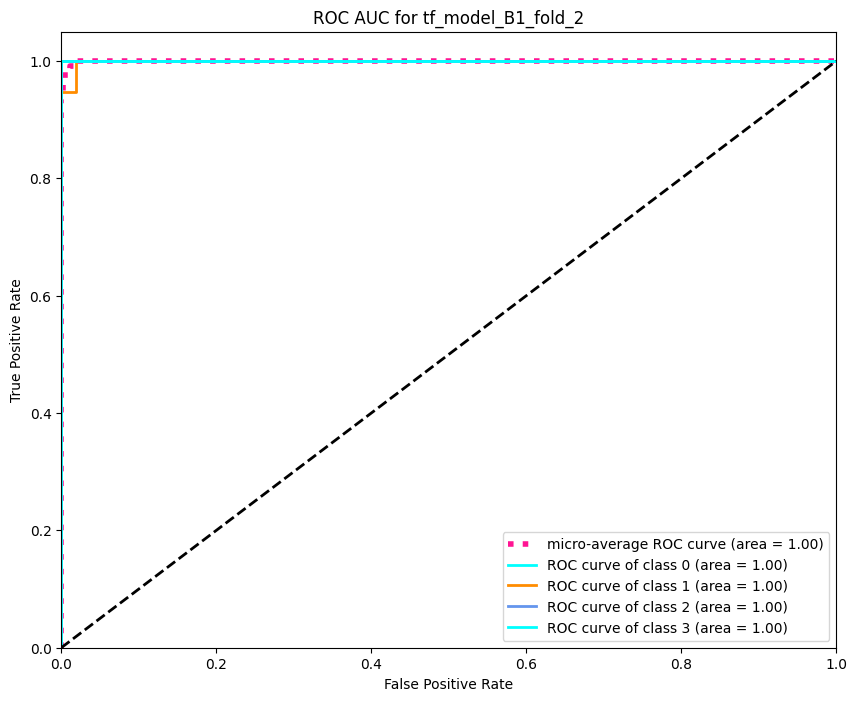

ROC AUC plotted


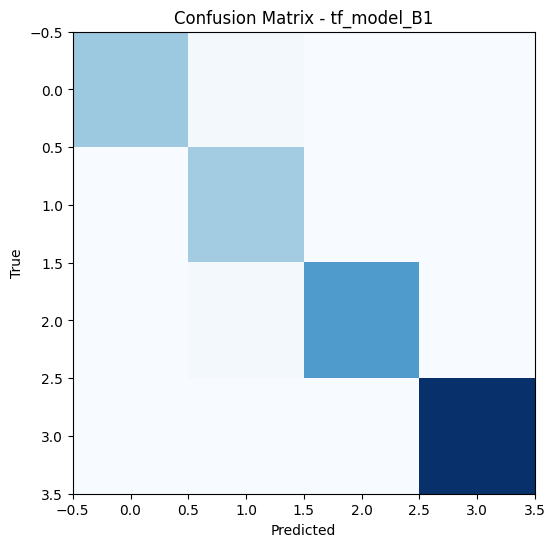

Confusion matrix plotted


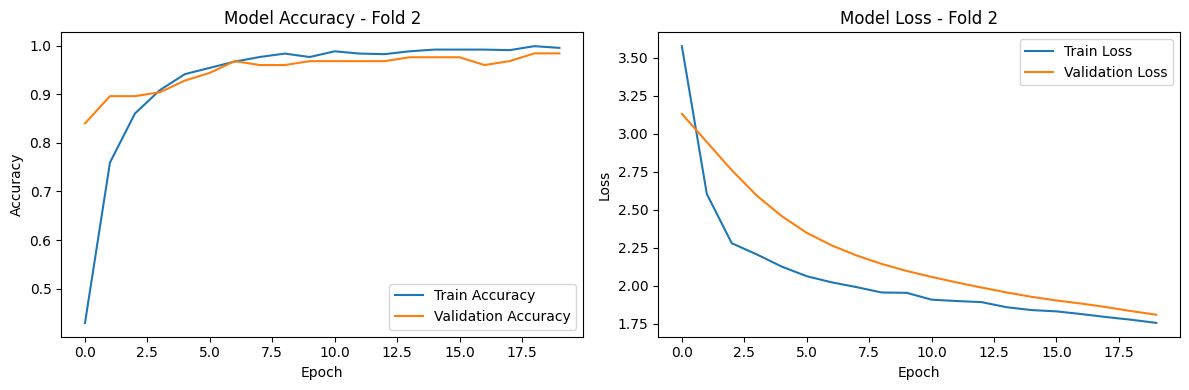

Training history plotted
Model tf_model_B1_fold_2 saved at tf_trained_models/SC3/models/tf_model_B1_fold_2_model.keras
Model for fold 2 saved

Training fold 3...
Train shape: (499, 24), Validation shape: (125, 24)
Train target distribution: [ 83  75 128 213], Validation target distribution: [21 19 32 53]
Applied SMOTE. Train shape after SMOTE: (852, 24)
Creating TensorFlow model with input_shape: 24, output_shape: 4
Input layer created with shape: (None, 24)
First Dense layer created with 131 units
Applied BatchNormalization and Dropout (rate=0.35)
Second Dense layer created with 262 units
Applied BatchNormalization and Dropout (rate=0.35) again
Third Dense layer created with 131 units
Applied BatchNormalization and Dropout (rate=0.35) again
Attention layer output shape: (None, 131)
Concatenated attention output with previous layer. Shape: (None, 262)
Flattened the output. Shape: (None, 262)
Final Dense layer created with 65 units
Applied BatchNormalization and Dropout (rate=0.35) on f

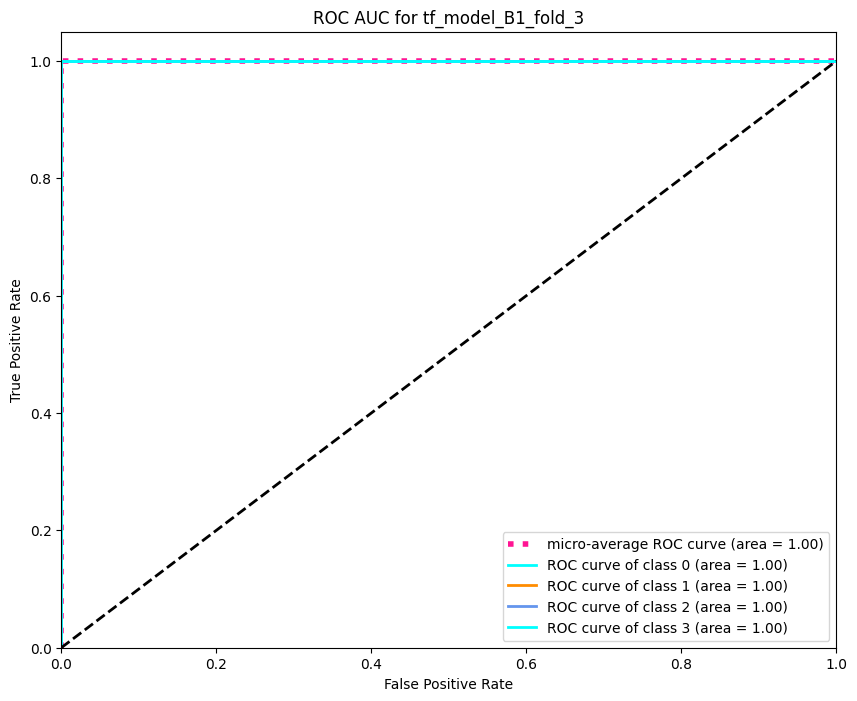

ROC AUC plotted


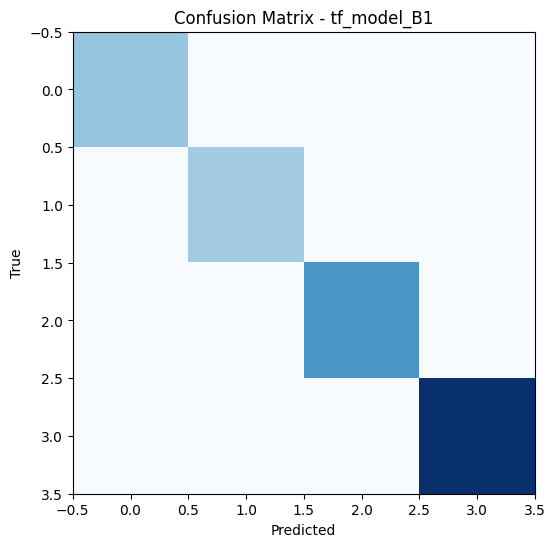

Confusion matrix plotted


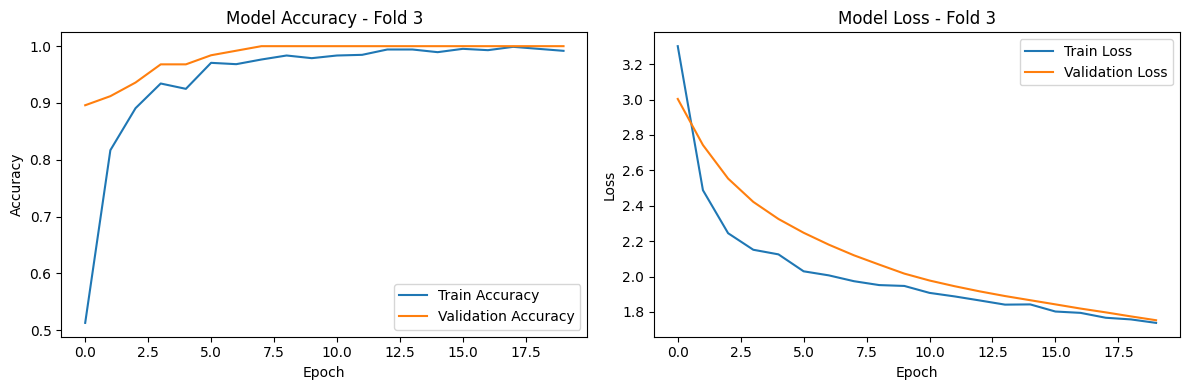

Training history plotted
Model tf_model_B1_fold_3 saved at tf_trained_models/SC3/models/tf_model_B1_fold_3_model.keras
Model for fold 3 saved

Training fold 4...
Train shape: (499, 24), Validation shape: (125, 24)
Train target distribution: [ 84  75 128 212], Validation target distribution: [20 19 32 54]
Applied SMOTE. Train shape after SMOTE: (848, 24)
Creating TensorFlow model with input_shape: 24, output_shape: 4
Input layer created with shape: (None, 24)
First Dense layer created with 131 units
Applied BatchNormalization and Dropout (rate=0.35)
Second Dense layer created with 262 units
Applied BatchNormalization and Dropout (rate=0.35) again
Third Dense layer created with 131 units
Applied BatchNormalization and Dropout (rate=0.35) again
Attention layer output shape: (None, 131)
Concatenated attention output with previous layer. Shape: (None, 262)
Flattened the output. Shape: (None, 262)
Final Dense layer created with 65 units
Applied BatchNormalization and Dropout (rate=0.35) on f

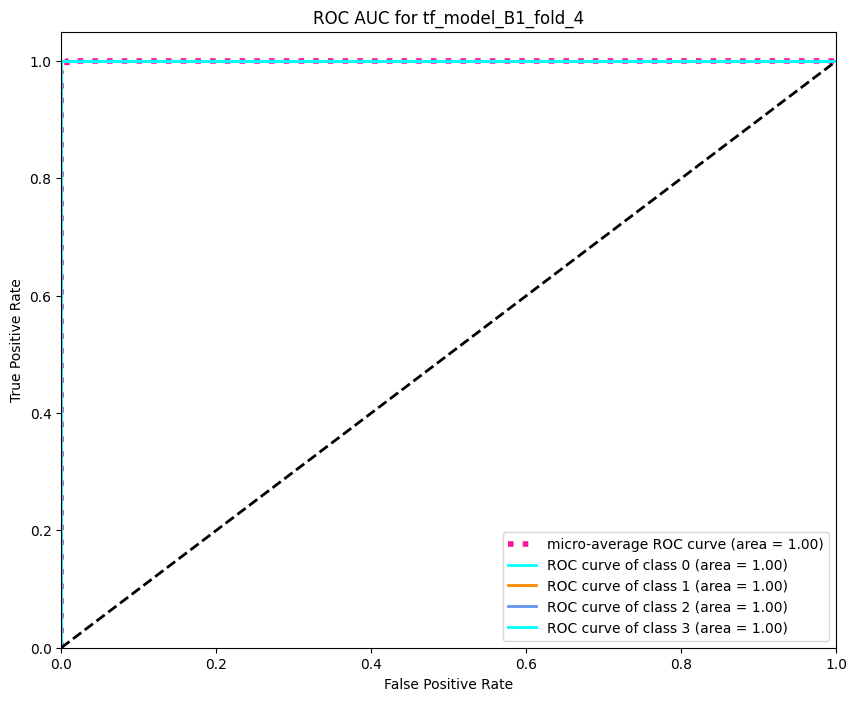

ROC AUC plotted


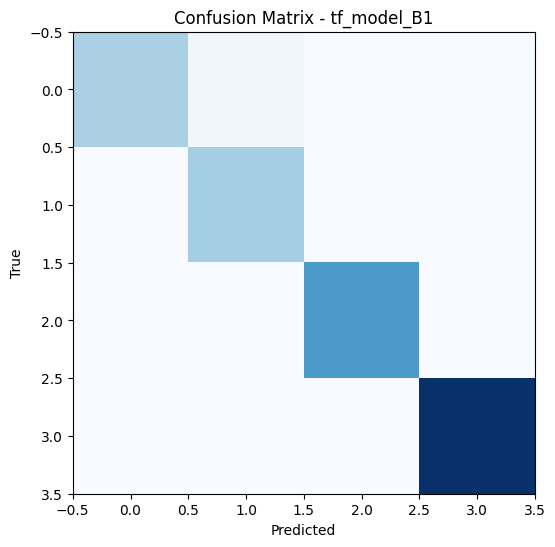

Confusion matrix plotted


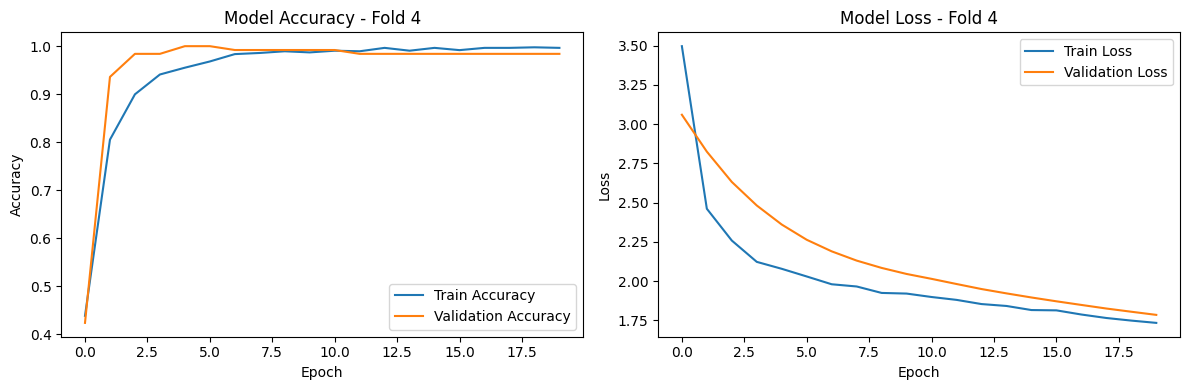

Training history plotted
Model tf_model_B1_fold_4 saved at tf_trained_models/SC3/models/tf_model_B1_fold_4_model.keras
Model for fold 4 saved

Training fold 5...
Train shape: (500, 24), Validation shape: (124, 24)
Train target distribution: [ 83  76 128 213], Validation target distribution: [21 18 32 53]
Applied SMOTE. Train shape after SMOTE: (852, 24)
Creating TensorFlow model with input_shape: 24, output_shape: 4
Input layer created with shape: (None, 24)
First Dense layer created with 131 units
Applied BatchNormalization and Dropout (rate=0.35)
Second Dense layer created with 262 units
Applied BatchNormalization and Dropout (rate=0.35) again
Third Dense layer created with 131 units
Applied BatchNormalization and Dropout (rate=0.35) again
Attention layer output shape: (None, 131)
Concatenated attention output with previous layer. Shape: (None, 262)
Flattened the output. Shape: (None, 262)
Final Dense layer created with 65 units
Applied BatchNormalization and Dropout (rate=0.35) on f

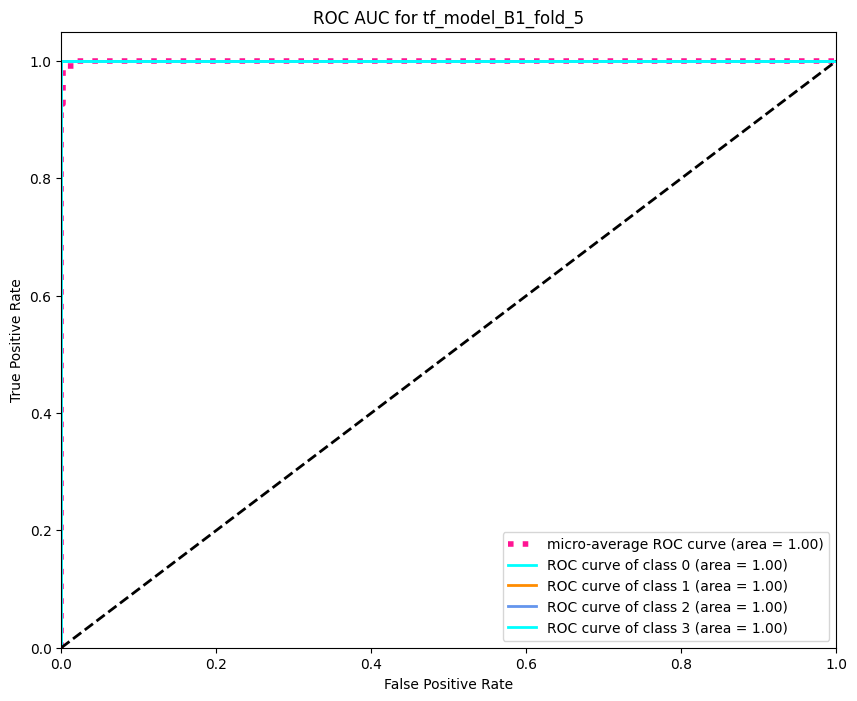

ROC AUC plotted


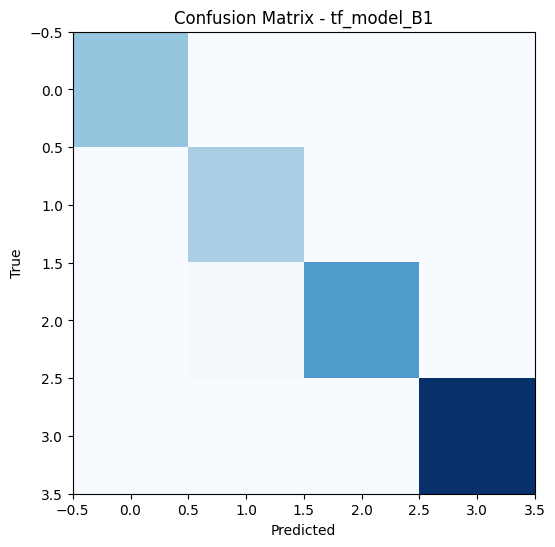

Confusion matrix plotted


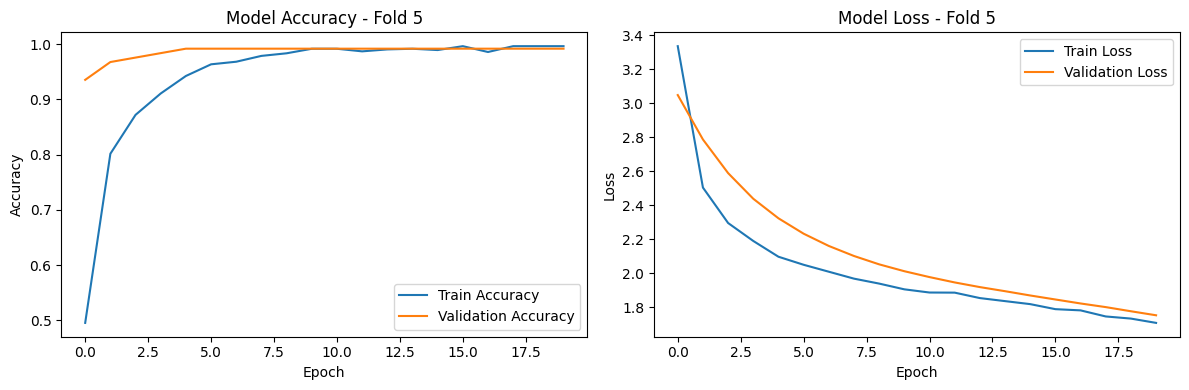

Training history plotted
Model tf_model_B1_fold_5 saved at tf_trained_models/SC3/models/tf_model_B1_fold_5_model.keras
Model for fold 5 saved


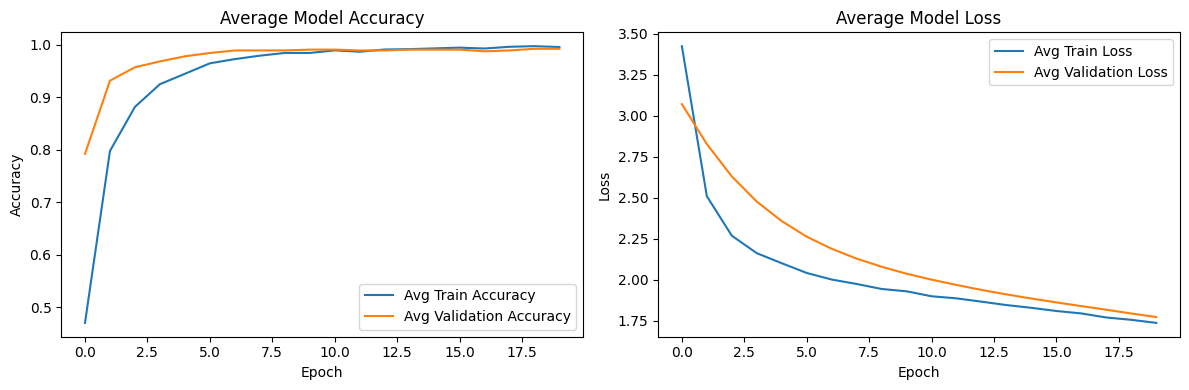

Plotted average training metrics across folds
Processing engineered dataset E3 with shape (600, 59)

Processing dataset: E3
Dropping correlated features: ['AwayTeamPoints', 'GoalDiff', 'Home_FailureToScore', 'Away_FailureToScore', 'Under_1.5_Goals', 'Over_2.5_Goals', 'Under_2.5_Goals', 'Over_3.5_Goals', 'Under_3.5_Goals', 'Over_4.5_Goals', 'Under_4.5_Goals', 'TotalYellowCards', 'TotalRedCards']
X shape after preprocessing: (600, 177)
Shape after feature selection: (600, 32)
Applying TruncatedSVD with n_components=32
Shapes after TruncatedSVD - Train: (600, 32), Test: (600, 32)
Training TensorFlow model on E3 with Stratified K-Fold cross-validation...

Training fold 1...
Train shape: (480, 32), Validation shape: (120, 32)
Train target distribution: [150 113 217], Validation target distribution: [37 28 55]
Applied SMOTE. Train shape after SMOTE: (651, 32)
Creating TensorFlow model with input_shape: 32, output_shape: 3
Input layer created with shape: (None, 32)
First Dense layer created w

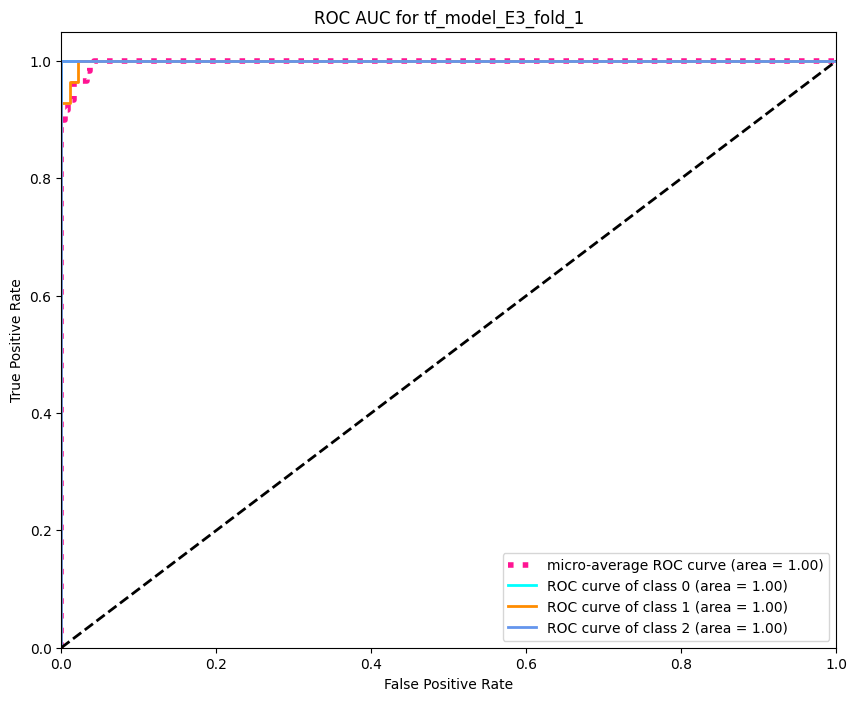

ROC AUC plotted


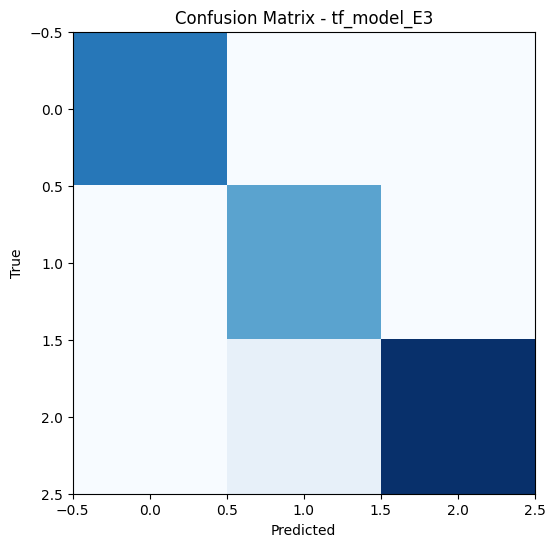

Confusion matrix plotted


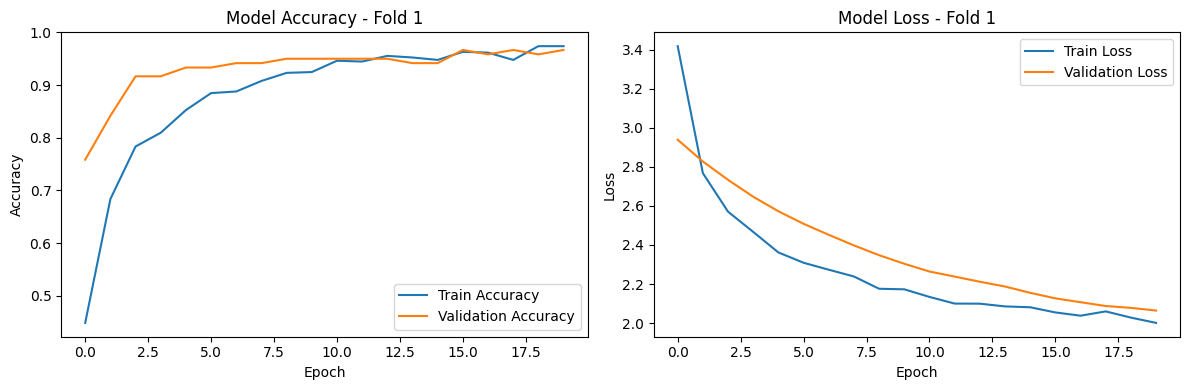

Training history plotted
Model tf_model_E3_fold_1 saved at tf_trained_models/SC3/models/tf_model_E3_fold_1_model.keras
Model for fold 1 saved

Training fold 2...
Train shape: (480, 32), Validation shape: (120, 32)
Train target distribution: [150 113 217], Validation target distribution: [37 28 55]
Applied SMOTE. Train shape after SMOTE: (651, 32)
Creating TensorFlow model with input_shape: 32, output_shape: 3
Input layer created with shape: (None, 32)
First Dense layer created with 131 units
Applied BatchNormalization and Dropout (rate=0.35)
Second Dense layer created with 262 units
Applied BatchNormalization and Dropout (rate=0.35) again
Third Dense layer created with 131 units
Applied BatchNormalization and Dropout (rate=0.35) again
Attention layer output shape: (None, 131)
Concatenated attention output with previous layer. Shape: (None, 262)
Flattened the output. Shape: (None, 262)
Final Dense layer created with 65 units
Applied BatchNormalization and Dropout (rate=0.35) on final De

KeyboardInterrupt: 

In [18]:
import os
import numpy as np
import tensorflow as tf
import traceback
import tqdm
from sklearn.pipeline import Pipeline
from tensorflow.keras import models, layers, regularizers, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, f1_score, confusion_matrix, auc
from sklearn.utils.class_weight import compute_class_weight
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
from tensorflow.keras.utils import get_custom_objects
from sklearn.model_selection import RandomizedSearchCV
from joblib import load
from sklearn.utils.class_weight import compute_class_weight
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import VarianceThreshold, SelectFromModel
from itertools import cycle




class AttentionLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], 1),
                                 initializer="normal")
        self.b = self.add_weight(name="att_bias", shape=(1,),
                                 initializer="zeros")
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        et = tf.nn.tanh(tf.matmul(x, self.W) + self.b)
        at = tf.nn.softmax(et, axis=1)
        output = x * at
        return output  # Return the attention-modulated features, not the reduced sum

    def compute_output_shape(self, input_shape):
        return input_shape  # Ensure the output shape matches the input shape

    def get_config(self):
        return super(AttentionLayer, self).get_config()




# Utility function to debug NaN values
def debug_nans(X, stage):
    print(f"\nDebugging NaNs at {stage}:")
    if isinstance(X, pd.DataFrame):
        print("NaN count per column:")
        print(X.isna().sum())
        print("\nData types of columns:")
        print(X.dtypes)
        print("\nSample of values:")
        print(X.head())
    elif isinstance(X, np.ndarray):
        print(f"Total NaNs: {np.isnan(X).sum()}")
        if np.isnan(X).any():
            nan_cols = np.isnan(X).any(axis=0)
            print(f"Columns with NaNs: {np.where(nan_cols)[0]}")
        print(f"Data type: {X.dtype}")
        print("Sample of values:")
        print(X[:5])
    else:
        print(f"Unsupported type: {type(X)}")
    print(f"Shape: {X.shape}")


# Utility Functions
def clean_data(X, y):
    if isinstance(X, pd.DataFrame):
        numeric_cols = X.select_dtypes(include=['number']).columns
        nan_in_X = X[numeric_cols].isna()
        inf_in_X = X[numeric_cols].apply(np.isinf)
        if nan_in_X.any().any():
            X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].mean())
        if inf_in_X.any().any():
            X[numeric_cols] = X[numeric_cols].replace([np.inf, -np.inf], np.nan).fillna(1e10)
    if isinstance(y, pd.Series) and y.isna().sum() > 0:
        non_nan_indices = ~y.isna()
        X = X[non_nan_indices]
        y = y[non_nan_indices]
    return X, y



def remove_leakage_features(df):
    leakage_columns = ['HG', 'AG', 'Result', 'HTHG', 'HTAG', 'HTR', 'TotalGoals', 'GoalDiff',
                       'HomeTeamPoints', 'AwayTeamPoints', 'HomeTeamRecentForm', 'AwayTeamRecentForm',
                       'HomeTeamGoalDifference', 'AwayTeamGoalDifference']
    return df.drop(columns=[col for col in leakage_columns if col in df.columns], errors='ignore')


# Preprocessing Functions
def preprocess_features(X):
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X.select_dtypes(include=['object', 'category']).columns

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    return preprocessor


# Function to apply PCA while keeping 80% of the variance
def apply_pca(X, n_components=0.80):
    pca = PCA(n_components=n_components)
    # pca = PCA(n_components=n_components if n_components else 0.80)
    return pca.fit_transform(X)


# Function to apply feature selection
def apply_feature_selection(X, y, k='auto'):
    # Variance Threshold to remove low-variance features
    selector = VarianceThreshold()
    X_selected = selector.fit_transform(X)

    # Using Random Forest to rank features by importance
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_selected, y)

    # Step 3: Select important features using SelectFromModel
    feature_selector = SelectFromModel(clf, prefit=True)
    X_selected = feature_selector.transform(X_selected)

    print(f"Shape after feature selection: {X_selected.shape}")

    return X_selected, selector, feature_selector

def apply_smote(X_train, y_train):
    class_counts = Counter(y_train)
    min_class_samples = min(class_counts.values())
    if min_class_samples < 6:
        print(f"Not enough samples for SMOTE (minimum class size: {min_class_samples}). Skipping SMOTE.")
        return X_train, y_train  # Skip SMOTE if too few samples
    smote = SMOTE(random_state=42, k_neighbors=min(5, min_class_samples - 1))
    return smote.fit_resample(X_train, y_train)


# Function to apply dimension reduction
def apply_dimensionality_reduction(X_train, X_test, n_components=50):
    min_samples = min(X_train.shape[0], X_test.shape[0])
    min_features = min(X_train.shape[1], X_test.shape[1])

    if n_components is None:
        n_components = max(1, min(min_samples, min_features, 100) - 1)
    else:
        n_components = min(n_components, min_samples - 1, min_features)

    print(f"Applying TruncatedSVD with n_components={n_components}")
    svd = TruncatedSVD(n_components=n_components, random_state=42)
    X_train_reduced = svd.fit_transform(X_train)
    X_test_reduced = svd.transform(X_test)

    print(f"Shapes after TruncatedSVD - Train: {X_train_reduced.shape}, Test: {X_test_reduced.shape}")
    return X_train_reduced, X_test_reduced, svd



# Function to drop highly correlated features
def drop_correlated_features(X, threshold=0.70):
    # Select only the numeric columns for correlation matrix computation
    numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

    if len(numeric_cols) == 0:
        print("No numeric columns found to compute correlation matrix.")
        return X  # Return the original dataframe if no numeric columns are found

    corr_matrix = X[numeric_cols].corr().abs()  # Compute correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Drop columns with correlation greater than the threshold
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    print(f"Dropping correlated features: {to_drop}")

    return X.drop(columns=to_drop, axis=1)


def plot_roc_auc(y_true, y_proba, classes, model_name):
    plt.figure(figsize=(10, 8))
    n_classes = len(classes)

    # Binarize the output
    y_test_bin = label_binarize(y_true, classes=range(n_classes))

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_proba.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Plot ROC curves
    plt.plot(fpr["micro"], tpr["micro"],
             label=f'micro-average ROC curve (area = {roc_auc["micro"]:.2f})',
             color='deeppink', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'ROC curve of class {classes[i]} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC AUC for {model_name}')
    plt.legend(loc="lower right")
    plt.show(f"{model_name}_ROC_AUC")
    plt.close()



def plot_average_training_history(histories, model_name):
    avg_train_loss = np.mean([h.history['loss'] for h in histories], axis=0)
    avg_val_loss = np.mean([h.history['val_loss'] for h in histories], axis=0)
    avg_train_acc = np.mean([h.history['accuracy'] for h in histories], axis=0)
    avg_val_acc = np.mean([h.history['val_accuracy'] for h in histories], axis=0)

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(avg_train_acc, label='Avg Train Accuracy')
    plt.plot(avg_val_acc, label='Avg Validation Accuracy')
    plt.title('Average Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(avg_train_loss, label='Avg Train Loss')
    plt.plot(avg_val_loss, label='Avg Validation Loss')
    plt.title('Average Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show(f"{model_name}_average_training_history")
    plt.close()


def plot_training_history(history, fold_no, model_name):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Model Accuracy - Fold {fold_no}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model Loss - Fold {fold_no}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show(f"{model_name}_fold_{fold_no}_training_history")
    plt.close()


# Function to plot confusion matrix
def plot_confusion_matrix_custom(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show(f"{model_name}_Confusion_Matrix")
    plt.close()

# Ensure consistent feature selection and dimensionality reduction
def preprocess_new_data(X_new, preprocessor, selector, feature_selector, dim_reduction):
    try:
        X_preprocessed = preprocessor.transform(X_new)
        X_selected = selector.transform(X_preprocessed)
        X_selected = feature_selector.transform(X_selected)
        X_reduced = dim_reduction.transform(X_selected)
        return X_reduced
    except ValueError as e:
        print(f"Error in preprocess_new_data: {e}")
        print(f"Shapes: X_new: {X_new.shape}, X_preprocessed: {X_preprocessed.shape}, "
              f"X_selected: {X_selected.shape}")
        raise

# Function to encode labels
def encode_labels(y):
    encoder = LabelEncoder()
    return encoder.fit_transform(y), encoder


# Function to save the models
def save_model(model, model_name, dataset_name):
    model_dir = f'tf_trained_models/{dataset_name}/models'
    os.makedirs(model_dir, exist_ok=True)  # Create the directory if it doesn't exist
    model_path = os.path.join(model_dir, f"{model_name.replace(' ', '_')}_model.keras")  # Save as a Keras model file
    model.save(model_path, save_format='tf')
    print(f"Model {model_name} saved at {model_path}")



# Function to create the TensorFlow model
def create_tf_model(input_shape, output_shape, learning_rate=0.001, dropout_rate=0.35, dense_units=131, l1_reg=0.0005, l2_reg=0.0005):
    print(f"Creating TensorFlow model with input_shape: {input_shape}, output_shape: {output_shape}")

    # Input layer
    inputs = layers.Input(shape=(input_shape,))
    print(f"Input layer created with shape: {inputs.shape}")

    # First dense layer
    x = layers.Dense(dense_units, activation='relu',
                     kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg))(inputs)
    print(f"First Dense layer created with {dense_units} units")
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout_rate)(x)
    print(f"Applied BatchNormalization and Dropout (rate={dropout_rate})")

    # Second dense layer (increased units)
    x = layers.Dense(dense_units * 2, activation='relu',
                     kernel_regularizer=regularizers.l1_l2(l1=l1_reg / 2, l2=l2_reg / 2))(x)
    print(f"Second Dense layer created with {dense_units * 2} units")
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout_rate)(x)
    print(f"Applied BatchNormalization and Dropout (rate={dropout_rate}) again")

    # Third dense layer (additional hidden layer)
    x = layers.Dense(dense_units, activation='relu',
                     kernel_regularizer=regularizers.l1_l2(l1=l1_reg / 2, l2=l2_reg / 2))(x)
    print(f"Third Dense layer created with {dense_units} units")
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout_rate)(x)
    print(f"Applied BatchNormalization and Dropout (rate={dropout_rate}) again")

    # Attention layer
    attention_output = AttentionLayer()(x)
    print(f"Attention layer output shape: {attention_output.shape}")

    # Concatenate attention output with the previous layer
    x = layers.Concatenate(axis=-1)([x, attention_output])
    print(f"Concatenated attention output with previous layer. Shape: {x.shape}")

    # Flatten the output
    x = layers.Flatten()(x)
    print(f"Flattened the output. Shape: {x.shape}")

    # Final Dense layer with reduced units
    x = layers.Dense(dense_units // 2, activation='relu',
                     kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg))(x)
    print(f"Final Dense layer created with {dense_units // 2} units")
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout_rate)(x)
    print(f"Applied BatchNormalization and Dropout (rate={dropout_rate}) on final Dense layer")

    # Output layer
    if output_shape == 1:
        outputs = layers.Dense(output_shape, activation='sigmoid')(x)
        print("Created output layer with sigmoid activation for binary classification")
    else:
        outputs = layers.Dense(output_shape, activation='softmax')(x)
        print("Created output layer with softmax activation for multi-class classification")

    # Model compilation
    model = models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(learning_rate=learning_rate),  # Adjusted learning rate
                  loss='binary_crossentropy' if output_shape == 1 else 'sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    print("Compiled the model")

    return model



custom_objects = {'AttentionLayer': AttentionLayer}

# Function to train and evaluate the model
def train_and_evaluate_tf_model(X, y_encoded, hyperparams, model_name, n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    fold_no = 1
    histories = []

    for train_index, val_index in skf.split(X, y_encoded):
        print(f"\nTraining fold {fold_no}...")
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y_encoded[train_index], y_encoded[val_index]

        print(f"Train shape: {X_train.shape}, Validation shape: {X_val.shape}")
        print(f"Train target distribution: {np.bincount(y_train)}, Validation target distribution: {np.bincount(y_val)}")

        # Apply SMOTE on the training data
        smote = SMOTE(random_state=42)
        X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
        print(f"Applied SMOTE. Train shape after SMOTE: {X_train_smote.shape}")

        model = create_tf_model(X_train_smote.shape[1], len(np.unique(y_encoded)),
                                  learning_rate=hyperparams['learning_rate'],
                                  dropout_rate=hyperparams['dropout_rate'],
                                  dense_units=hyperparams['dense_units'],
                                  l1_reg=hyperparams['l1_reg'],
                                  l2_reg=hyperparams['l2_reg'])
        print(f"Model created for fold {fold_no}")

        early_stopping = tf.keras.callbacks.EarlyStopping(
            monitor='val_loss', patience=10, restore_best_weights=True)

        lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)
        # Calculate class weights
        class_weights = compute_class_weight('balanced', classes=np.unique(y_train_smote), y=y_train_smote)
        class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}


        print("Starting model training...")
        history = model.fit(
            X_train_smote, y_train_smote,
            epochs=hyperparams['epochs'],
            batch_size=hyperparams['batch_size'],
            validation_data=(X_val, y_val),
            callbacks=[early_stopping, lr_scheduler],
            class_weight=class_weights_dict,
            verbose=1
        )

        histories.append(history)

        # Evaluate the model
        y_pred = model.predict(X_val)
        y_pred_classes = np.argmax(y_pred, axis=1)
        print(f"Model predictions shape: {y_pred.shape}")

        print(f"Fold {fold_no} - Accuracy: {accuracy_score(y_val, y_pred_classes):.4f}")
        print(f"Classification Report:\n{classification_report(y_val, y_pred_classes)}")
        print(f"Confusion Matrix:\n{confusion_matrix(y_val, y_pred_classes)}")

        print(f"Fold {fold_no} - Training completed")
        print(f"Final training accuracy: {history.history['accuracy'][-1]:.4f}")
        print(f"Final validation accuracy: {history.history['val_accuracy'][-1]:.4f}")
        print(f"Final training loss: {history.history['loss'][-1]:.4f}")
        print(f"Final validation loss: {history.history['val_loss'][-1]:.4f}")

        # Plot the ROC AUC curve
        plot_roc_auc(y_val, y_pred, np.unique(y_encoded), f"{model_name}_fold_{fold_no}")
        print("ROC AUC plotted")

        # Plot confusion matrix and training history
        plot_confusion_matrix_custom(y_val, y_pred_classes, model_name)
        print("Confusion matrix plotted")

        plot_training_history(history, fold_no, model_name)
        print("Training history plotted")

        # Save the model for this fold
        save_model(model, f"{model_name}_fold_{fold_no}", dataset_name)
        print(f"Model for fold {fold_no} saved")

        fold_no += 1

    # Plot average metrics across all folds
    plot_average_training_history(histories, model_name)
    print("Plotted average training metrics across folds")




# Function to prepare and train the TensorFlow model
def prepare_and_train_with_tensorflow(df, dataset_name):
    try:
        print(f"\nProcessing dataset: {dataset_name}")

        # Checking for available target columns
        if 'Result' in df.columns:
            y = df['Result']
            X = df.drop(columns=['Result'])
        else:
            print(f"No 'Result' column found in {dataset_name}. Using first column as target.")
            y = df.iloc[:, 0]
            X = df.iloc[:, 1:]

        # Encode labels
        y_encoded, label_encoder = encode_labels(y)

        # Data Cleaning
        X, y_encoded = clean_data(X, y_encoded)
        X = drop_correlated_features(X, threshold=0.75)

        # Preprocessing Features
        preprocessor = preprocess_features(X)
        X_preprocessed = preprocessor.fit_transform(X)

        print(f"X shape after preprocessing: {X_preprocessed.shape}")

        # Apply Feature Selection (Optional step)
        X_selected, selector, feature_selector = apply_feature_selection(X_preprocessed, y_encoded)

        # Apply Dimensionality Reduction (Optional)
        X_reduced, _, svd = apply_dimensionality_reduction(X_selected, X_selected)

        # Set hyperparameters
        hyperparams = {
            'learning_rate': 0.001, # 0.0003
            'dropout_rate': 0.35, # 0.3
            'dense_units': 131,
            'l1_reg': 0.0005,
            'l2_reg': 0.0005,
            'epochs': 20,
            'batch_size': 160
        }

        # Train TensorFlow model using Stratified K-Folds
        print(f"Training TensorFlow model on {dataset_name} with Stratified K-Fold cross-validation...")
        train_and_evaluate_tf_model(X_reduced, y_encoded, hyperparams, f"tf_model_{dataset_name}")

    except Exception as e:
        print(f"Error in prepare_and_train_with_tensorflow: {e}")
        traceback.print_exc()


# Process all datasets with KFold cross-validation
def process_engineered_datasets(engineered_datasets):
    for dataset_name, df in engineered_datasets.items():
        try:
            print(f"Processing engineered dataset {dataset_name} with shape {df.shape}")
            prepare_and_train_with_tensorflow(df, dataset_name)
        except Exception as e:
            print(f"Error processing dataset {dataset_name}: {str(e)}")
            print(traceback.format_exc())


if __name__ == "__main__":
    prepared_data_dir = 'prepared_data'
    process_engineered_datasets(engineered_datasets)
    print("Training and evaluation complete for all models.")

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers, regularizers, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, auc
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from tensorflow.keras.utils import get_custom_objects
from sklearn.model_selection import RandomizedSearchCV
from joblib import load
from scikeras.wrappers import KerasClassifier



# Ensure the directory to save models exists
save_dir = 'models'
os.makedirs(save_dir, exist_ok=True)


# Function to load artifacts (preprocessor, selector, dim_reduction)
def load_artifacts(dataset_dir):
    try:
        preprocessor_path = os.path.join(dataset_dir, 'preprocessor.joblib')
        dim_reduction_path = os.path.join(dataset_dir, 'dim_reduction.joblib')

        preprocessor = load(preprocessor_path)
        dim_reduction = None
        if os.path.exists(dim_reduction_path):
            dim_reduction = load(dim_reduction_path)

        print(f"Artifacts loaded from {dataset_dir}")
        return preprocessor, dim_reduction

    except Exception as e:
        print(f"Error loading artifacts: {str(e)}")
        return None, None


# Function to load data
def load_data(dataset_dir):
    try:
        X_train_path = os.path.join(dataset_dir, 'X_train.npy')
        y_train_path = os.path.join(dataset_dir, 'y_train.npy')
        X_test_path = os.path.join(dataset_dir, 'X_test.npy')
        y_test_path = os.path.join(dataset_dir, 'y_test.npy')

        # Load data from the directory
        X_train = np.load(X_train_path, allow_pickle=True)
        y_train = np.load(y_train_path, allow_pickle=True)
        X_test = np.load(X_test_path, allow_pickle=True)
        y_test = np.load(y_test_path, allow_pickle=True)

        # Print unique values in y
        print(f"Unique values in y_train: {np.unique(y_train)}")
        print(f"Unique values in y_test: {np.unique(y_test)}")

        # Ensure consistent shapes
        min_train_samples = min(X_train.shape[0], y_train.shape[0])
        X_train = X_train[:min_train_samples]
        y_train = y_train[:min_train_samples]

        min_test_samples = min(X_test.shape[0], y_test.shape[0])
        X_test = X_test[:min_test_samples]
        y_test = y_test[:min_test_samples]

        print(f"Data loaded from {dataset_dir}")
        return X_train, y_train, X_test, y_test

    except Exception as e:
        print(f"Error loading data from {dataset_dir}: {str(e)}")
        return None, None, None, None


# Preprocess data using the loaded preprocessor and dimensionality reduction
def preprocess_data(X_train, X_test, preprocessor, dim_reduction=None):
    X_train_preprocessed = preprocessor.transform(X_train)
    X_test_preprocessed = preprocessor.transform(X_test)

    if dim_reduction:
        X_train_preprocessed = dim_reduction.transform(X_train_preprocessed)
        X_test_preprocessed = dim_reduction.transform(X_test_preprocessed)

    return X_train_preprocessed, X_test_preprocessed


# Define the custom Attention layer
class Attention(tf.keras.layers.Layer):
    def __init__(self, units, **kwargs):
        super(Attention, self).__init__(**kwargs)
        self.units = units

    def build(self, input_shape):
        self.W = self.add_weight(name='attention_weight', shape=(input_shape[-1], self.units),
                                 initializer='random_normal', trainable=True)
        self.b = self.add_weight(name='attention_bias', shape=(self.units,),
                                 initializer='zeros', trainable=True)
        self.V = self.add_weight(name='attention_score', shape=(self.units, 1),
                                 initializer='random_normal', trainable=True)
        super(Attention, self).build(input_shape)

    def call(self, inputs):
        score = tf.nn.tanh(tf.matmul(inputs, self.W) + self.b)
        attention_weights = tf.nn.softmax(tf.matmul(score, self.V), axis=1)
        context_vector = attention_weights * inputs
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector

    def get_config(self):
        config = super(Attention, self).get_config()
        config.update({"units": self.units})
        return config


# Register the custom Attention layer globally
tf.keras.utils.get_custom_objects()['Attention'] = Attention


# Define the model creation function with the Attention layer
def create_model_with_attention(input_shape, output_shape=1, learning_rate=0.001, dropout_rate=0.3, dense_units=64, l1_reg=0.01, l2_reg=0.01):
    inputs = Input(shape=(input_shape,))
    x = layers.Dense(dense_units, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg))(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout_rate)(x)

    # Integrating the Attention layer
    attention = Attention(units=dense_units // 2)(x)
    attention = layers.Flatten()(attention)

    attention = layers.Dense(dense_units // 2, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg))(attention)
    attention = layers.BatchNormalization()(attention)
    attention = layers.Dropout(dropout_rate)(attention)

    x = layers.Dense(dense_units // 4, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg))(attention)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout_rate)(x)

    if output_shape == 1:
        outputs = layers.Dense(output_shape, activation='sigmoid', kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg))(x)
    else:
        outputs = layers.Dense(output_shape, activation='softmax', kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg))(x)

    model = models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy' if output_shape == 1 else 'sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Wrapper function for KerasClassifier
def create_model_wrapper(input_shape, n_classes, learning_rate=0.001, dropout_rate=0.3, dense_units=64, l1_reg=0.001, l2_reg=0.001):
    return create_model_with_attention(
        input_shape=input_shape,
        output_shape=n_classes,
        learning_rate=learning_rate,
        dropout_rate=dropout_rate,
        dense_units=dense_units,
        l1_reg=l1_reg,
        l2_reg=l2_reg
    )

# Hyperparameter grid
param_grid = {
    'model__learning_rate': [0.001, 0.0001, 0.01],
    'model__dropout_rate': [0.3, 0.5],
    'model__dense_units': [64, 128, 256],
    'model__l1_reg': [0.01, 0.001],
    'model__l2_reg': [0.01, 0.001],
    'batch_size': [32, 64],
    'epochs': [50, 100]
}

# Create the KerasClassifier wrapper
model = KerasClassifier(build_fn=create_model_wrapper, verbose=0)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, scoring='accuracy', cv=3, verbose=1)

# Training and evaluation function
def train_and_evaluate(X_train, y_train, X_test, y_test, model_name, **hyperparams):
    print(f"Initial X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
    print(f"Initial X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

    # Calculate class weights
    class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
    class_weights = dict(enumerate(class_weights))

    print(f"Class weights: {class_weights}")

    # Strip 'model__' prefix from hyperparameters and select only relevant ones
    model_params = {k.replace('model__', ''): v for k, v in hyperparams.items() if k.startswith('model__')}

    # Create and compile the model
    model = create_model_with_attention(X_train.shape[1], output_shape=len(np.unique(y_train)), **model_params)

    # Set up callbacks
    early_stopping = EarlyStopping(patience=10, restore_best_weights=True, monitor='val_loss')
    model_checkpoint = ModelCheckpoint(os.path.join(save_dir, f'{model_name}.keras'), save_best_only=True, monitor='val_loss')
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.0001)

    # Train the model
    history = model.fit(X_train, y_train, epochs=hyperparams.get('epochs', 100), batch_size=hyperparams.get('batch_size', 32),
                        validation_split=0.2, class_weight=class_weights,
                        callbacks=[early_stopping, model_checkpoint, reduce_lr], verbose=1)

    # Evaluate the model
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    print(f"{model_name} Accuracy: {accuracy_score(y_test, y_pred_classes)}")
    print(f"{model_name} Report:\n{classification_report(y_test, y_pred_classes)}")

    return model, history


# Function to process all datasets in the prepared_data directory
def process_all_datasets(prepared_data_dir):
    for dataset in os.listdir(prepared_data_dir):
        dataset_dir = os.path.join(prepared_data_dir, dataset)

        if os.path.isdir(dataset_dir):
            print(f"\nProcessing dataset from directory: {dataset_dir}")

            # Load the artifacts (preprocessor and dim_reduction)
            preprocessor, dim_reduction = load_artifacts(dataset_dir)

            if preprocessor:  # Only check for preprocessor as it's essential
                X_train, y_train, X_test, y_test = load_data(dataset_dir)

                if X_train is not None and y_train is not None:
                    print(f"Loaded data shapes - X_train: {X_train.shape}, y_train: {y_train.shape}")
                    print(f"X_train type: {type(X_train)}")
                    print(f"X_train dtype: {X_train.dtype}")

                    if preprocessor:
                        print(f"Preprocessor expected features: {preprocessor.n_features_in_}")

                    # Check if X_train is empty or not in the expected shape
                    if X_train.size == 0 or X_train.ndim != 2:
                        print(f"Invalid X_train shape for {dataset}. Skipping this dataset.")
                        continue

                    # Ensure X_train and y_train have the same number of samples
                    min_samples = min(X_train.shape[0], y_train.shape[0])
                    X_train = X_train[:min_samples]
                    y_train = y_train[:min_samples]
                    print(f"Adjusted data shapes - X_train: {X_train.shape}, y_train: {y_train.shape}")

                    # If there's a feature mismatch, refit the preprocessor
                    if X_train.shape[1] != preprocessor.n_features_in_:
                        print(f"Feature mismatch detected. Refitting preprocessor for {dataset}.")
                        preprocessor = StandardScaler()
                        preprocessor.fit(X_train)
                        print(f"Preprocessor refitted. New feature count: {X_train.shape[1]}")

                    # Preprocess data
                    try:
                        X_train = preprocessor.transform(X_train)
                        X_test = preprocessor.transform(X_test)
                        if dim_reduction:
                            X_train = dim_reduction.transform(X_train)
                            X_test = dim_reduction.transform(X_test)
                    except Exception as e:
                        print(f"Error during preprocessing for {dataset}: {str(e)}")
                        continue

                    print(f"Preprocessed data shapes - X_train: {X_train.shape}, X_test: {X_test.shape}")

                    # Encode labels
                    label_encoder = LabelEncoder()
                    y_train = label_encoder.fit_transform(y_train.ravel())
                    y_test = label_encoder.transform(y_test.ravel())

                    n_classes = len(label_encoder.classes_)
                    print(f"Number of classes: {n_classes}")

                    # Create the KerasClassifier wrapper
                    model = KerasClassifier(
                        model=create_model_wrapper,
                        input_shape=X_train.shape[1],
                        n_classes=n_classes,
                        verbose=0
                    )

                    # Set up RandomizedSearchCV
                    random_search = RandomizedSearchCV(
                        estimator=model,
                        param_distributions=param_grid,
                        n_iter=10,
                        scoring='accuracy',
                        cv=3,
                        verbose=1
                    )

                    # Perform hyperparameter search and train the model
                    random_search_result = random_search.fit(X_train, y_train)
                    best_params = random_search_result.best_params_

                    # Train and evaluate the model
                    print(f"Training TensorFlow model with the best hyperparameters for dataset {dataset}...")
                    tensorflow_model, tensorflow_history = train_and_evaluate(
                        X_train, y_train,
                        X_test, y_test,
                        f"tensorflow_model_{dataset}",
                        **best_params
                    )
                    print(f"Training complete for dataset: {dataset}")
                else:
                    print(f"Skipping dataset in {dataset_dir} due to failed data loading.")
            else:
                print(f"Skipping dataset in {dataset_dir} due to failed artifact loading.")
        else:
            print(f"Skipping non-directory item: {dataset_dir}")


# Process all datasets in the 'prepared_data' directory
prepared_data_dir = 'prepared_data'
process_all_datasets(prepared_data_dir)

print("Training and evaluation complete for all models.")

**Data Preparation for Transformer Model**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import os

def debug_nans(X, stage):
    print(f"Debugging NaNs at {stage}:")

    if isinstance(X, pd.DataFrame) or isinstance(X, pd.Series):
        nan_counts = X.isna().sum()
        print("NaN count per column:")
        print(nan_counts[nan_counts > 0])
        print("\nData types of columns:")
        print(X.dtypes)
        print("\nSample of values:")
        print(X.head())
    elif isinstance(X, np.ndarray):
        if np.issubdtype(X.dtype, np.number):
            print(f"Total NaNs: {np.isnan(X).sum()}")
            if np.isnan(X).any():
                nan_cols = np.isnan(X).any(axis=0)
                print("Columns with NaNs:", nan_cols)
            print("\nSample of values:")
            print(X[:5])
        else:
            print("Array contains non-numeric data, skipping NaN check.")
            df = pd.DataFrame(X)
            nan_counts = df.isna().sum()
            print("NaN count per column (in non-numeric array):")
            print(nan_counts[nan_counts > 0])
            print("\nSample of values:")
            print(df.head())
    else:
        print("Unsupported data type for NaN debugging.")

def prepare_transformer_dataset(df, dataset_name):
    print(f"\nProcessing dataset: {dataset_name}")

    # Remove rows where 'Result' is NaN
    df = df.dropna(subset=['Result'])

    # Convert 'Result' to string
    df['Result'] = df['Result'].astype(str)

    # Define categorical features for transformer (these will be label-encoded)
    categorical_features = ['Home', 'Away', 'Country', 'League', 'Season']

    # Define preprocessing steps for numerical columns
    numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()

    # Label encode categorical features
    label_encoders = {}
    for feature in categorical_features:
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature].astype(str))
        label_encoders[feature] = le

    # Impute and scale numerical features
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])
    df[numeric_features] = numeric_transformer.fit_transform(df[numeric_features])


    # Split the data into features and target
    X = df.drop(['Result'], axis=1)
    y = df['Result']

    debug_nans(X, f"after preprocessing - {dataset_name}")

    return X, y, label_encoders, numeric_transformer

# Ensure the directory to save results exists
if not os.path.exists('transformer_prepared_data'):
    os.makedirs('transformer_prepared_data')

# Prepare all datasets
prepared_datasets = {}
for dataset_name, df in engineered_datasets.items():
    X, y, label_encoders, numeric_transformer = prepare_transformer_dataset(df, dataset_name)
    prepared_datasets[dataset_name] = {
        'X': X,
        'y': y,
        'label_encoders': label_encoders,
        'numeric_transformer': numeric_transformer
    }

# Combine data while preserving country and league information
full_dataset = pd.concat([pd.DataFrame(data['X']) for data in prepared_datasets.values()], ignore_index=True)
full_dataset['Result'] = pd.concat([data['y'] for data in prepared_datasets.values()], ignore_index=True)

debug_nans(full_dataset, "after combining all datasets")

# Prepare features and target
X = full_dataset.drop(['Result'], axis=1)
y = full_dataset['Result']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Separate the inputs for the transformer model
X_train_home_team = X_train['Home'].values
X_train_away_team = X_train['Away'].values
X_train_league = X_train['League'].values
X_train_country = X_train['Country'].values
X_train_season = X_train['Season'].values
X_train_numerical = X_train.drop(['Home', 'Away', 'League', 'Country', 'Season'], axis=1).values

X_test_home_team = X_test['Home'].values
X_test_away_team = X_test['Away'].values
X_test_league = X_test['League'].values
X_test_country = X_test['Country'].values
X_test_season = X_test['Season'].values
X_test_numerical = X_test.drop(['Home', 'Away', 'League', 'Country', 'Season'], axis=1).values

# Check for NaNs and infinite values in X_train and y_train
debug_nans(X_train_numerical, "X_train_numerical after split")
debug_nans(y_train, "y_train after split")

def clean_data(X, y):
    # Ensure X is a numeric array before checking for NaNs and infinities
    if not np.issubdtype(X.dtype, np.number):
        print("X contains non-numeric data. Converting to numeric.")
        X = pd.DataFrame(X).apply(pd.to_numeric, errors='coerce').values

    # Check and handle NaNs or infinities in X
    nan_in_X = np.isnan(X)
    inf_in_X = np.isinf(X)

    if np.any(nan_in_X):
        print(f"NaN values found in X_train: {np.sum(nan_in_X)}. Replacing with column mean.")
        col_means = np.nanmean(X, axis=0)
        inds = np.where(np.isnan(X))
        X[inds] = np.take(col_means, inds[1])

    if np.any(inf_in_X):
        print(f"Infinite values found in X_train: {np.sum(inf_in_X)}. Replacing with large finite values.")
        X = np.nan_to_num(X, posinf=1e10, neginf=-1e10)

    # Check and handle NaNs in y
    if y.isna().sum() > 0:
        print(f"NaN values found in y_train: {y.isna().sum()}. Dropping rows with NaN in y_train.")
        non_nan_indices = ~y.isna()
        X = X[non_nan_indices]
        y = y[non_nan_indices]

    return X, y

# Clean the data
X_train_numerical_clean, y_train_clean = clean_data(X_train_numerical, y_train)

# Ensure y_train_clean is a series of strings
y_train_clean = pd.Series(y_train_clean).astype(str)

# Save the preprocessed data
np.save('transformer_prepared_data/X_train_home_team.npy', X_train_home_team)
np.save('transformer_prepared_data/X_train_away_team.npy', X_train_away_team)
np.save('transformer_prepared_data/X_train_league.npy', X_train_league)
np.save('transformer_prepared_data/X_train_country.npy', X_train_country)
np.save('transformer_prepared_data/X_train_season.npy', X_train_season)
np.save('transformer_prepared_data/X_train_numerical.npy', X_train_numerical_clean)

np.save('transformer_prepared_data/X_test_home_team.npy', X_test_home_team)
np.save('transformer_prepared_data/X_test_away_team.npy', X_test_away_team)
np.save('transformer_prepared_data/X_test_league.npy', X_test_league)
np.save('transformer_prepared_data/X_test_country.npy', X_test_country)
np.save('transformer_prepared_data/X_test_season.npy', X_test_season)
np.save('transformer_prepared_data/X_test_numerical.npy', X_test_numerical)

np.save('transformer_prepared_data/y_train.npy', y_train_clean)
np.save('transformer_prepared_data/y_test.npy', y_test)

print("\nAll datasets have been processed and prepared for transformer model training.")

**Try**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import os

def debug_nans(X, stage):
    print(f"Debugging NaNs at {stage}:")

    if isinstance(X, pd.DataFrame) or isinstance(X, pd.Series):
        nan_counts = X.isna().sum()
        print("NaN count per column:")
        print(nan_counts[nan_counts > 0])
        print("\nData types of columns:")
        print(X.dtypes)
        print("\nSample of values:")
        print(X.head())
    elif isinstance(X, np.ndarray):
        if np.issubdtype(X.dtype, np.number):
            print(f"Total NaNs: {np.isnan(X).sum()}")
            if np.isnan(X).any():
                nan_cols = np.isnan(X).any(axis=0)
                print("Columns with NaNs:", nan_cols)
            print("\nSample of values:")
            print(X[:5])
        else:
            print("Array contains non-numeric data, skipping NaN check.")
            df = pd.DataFrame(X)
            nan_counts = df.isna().sum()
            print("NaN count per column (in non-numeric array):")
            print(nan_counts[nan_counts > 0])
            print("\nSample of values:")
            print(df.head())
    else:
        print("Unsupported data type for NaN debugging.")

def prepare_transformer_dataset(df, dataset_name):
    print(f"\nProcessing dataset: {dataset_name}")

    # Remove rows where 'Result' is NaN
    df = df.dropna(subset=['Result'])

    # Convert 'Result' to string
    df['Result'] = df['Result'].astype(str)

    # Define categorical features for transformer (these will be label-encoded)
    categorical_features = ['Home', 'Away', 'Country', 'League', 'Season']

    # Define preprocessing steps for numerical columns
    numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()

    # Handling missing statistics differently across datasets
    for feature in ['TotalFouls', 'TotalCorners', 'TotalYellowCards', 'TotalRedCards']:
        if feature in df.columns:
            df[feature] = df[feature].fillna(df[feature].median())
        else:
            df[feature] = 0  # Add feature and set to 0 if missing

    # Label encode categorical features
    label_encoders = {}
    for feature in categorical_features:
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature].astype(str))
        label_encoders[feature] = le

    # Impute and scale numerical features
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])
    df[numeric_features] = numeric_transformer.fit_transform(df[numeric_features])

    # Split the data into features and target
    X = df.drop(['Result'], axis=1)
    y = df['Result']

    debug_nans(X, f"after preprocessing - {dataset_name}")

    return X, y, label_encoders, numeric_transformer

# Ensure the directory to save results exists
if not os.path.exists('transformer_prepared_data'):
    os.makedirs('transformer_prepared_data')

# Prepare all datasets
prepared_datasets = {}
for dataset_name, df in engineered_datasets.items():
    X, y, label_encoders, numeric_transformer = prepare_transformer_dataset(df, dataset_name)
    prepared_datasets[dataset_name] = {
        'X': X,
        'y': y,
        'label_encoders': label_encoders,
        'numeric_transformer': numeric_transformer
    }

# Combine data while preserving country and league information
full_dataset = pd.concat([pd.DataFrame(data['X']) for data in prepared_datasets.values()], ignore_index=True)
full_dataset['Result'] = pd.concat([data['y'] for data in prepared_datasets.values()], ignore_index=True)

debug_nans(full_dataset, "after combining all datasets")

# Prepare features and target
X = full_dataset.drop(['Result'], axis=1)
y = full_dataset['Result']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Separate the inputs for the transformer model
X_train_home_team = X_train['Home'].values
X_train_away_team = X_train['Away'].values
X_train_league = X_train['League'].values
X_train_country = X_train['Country'].values
X_train_season = X_train['Season'].values
X_train_numerical = X_train.drop(['Home', 'Away', 'League', 'Country', 'Season'], axis=1).values

X_test_home_team = X_test['Home'].values
X_test_away_team = X_test['Away'].values
X_test_league = X_test['League'].values
X_test_country = X_test['Country'].values
X_test_season = X_test['Season'].values
X_test_numerical = X_test.drop(['Home', 'Away', 'League', 'Country', 'Season'], axis=1).values

# Check for NaNs and infinite values in X_train and y_train
debug_nans(X_train_numerical, "X_train_numerical after split")
debug_nans(y_train, "y_train after split")

def clean_data(X, y):
    # Ensure X is a numeric array before checking for NaNs and infinities
    if not np.issubdtype(X.dtype, np.number):
        print("X contains non-numeric data. Converting to numeric.")
        X = pd.DataFrame(X).apply(pd.to_numeric, errors='coerce').values

    # Check and handle NaNs or infinities in X
    nan_in_X = np.isnan(X)
    inf_in_X = np.isinf(X)

    if np.any(nan_in_X):
        print(f"NaN values found in X_train: {np.sum(nan_in_X)}. Replacing with column mean.")
        col_means = np.nanmean(X, axis=0)
        inds = np.where(np.isnan(X))
        X[inds] = np.take(col_means, inds[1])

    if np.any(inf_in_X):
        print(f"Infinite values found in X_train: {np.sum(inf_in_X)}. Replacing with large finite values.")
        X = np.nan_to_num(X, posinf=1e10, neginf=-1e10)

    # Check and handle NaNs in y
    if y.isna().sum() > 0:
        print(f"NaN values found in y_train: {y.isna().sum()}. Dropping rows with NaN in y_train.")
        non_nan_indices = ~y.isna()
        X = X[non_nan_indices]
        y = y[non_nan_indices]

    return X, y

# Clean the data
X_train_numerical_clean, y_train_clean = clean_data(X_train_numerical, y_train)

# Ensure y_train_clean is a series of strings
y_train_clean = pd.Series(y_train_clean).astype(str)

# Save the preprocessed data
np.save('transformer_prepared_data/X_train_home_team.npy', X_train_home_team)
np.save('transformer_prepared_data/X_train_away_team.npy', X_train_away_team)
np.save('transformer_prepared_data/X_train_league.npy', X_train_league)
np.save('transformer_prepared_data/X_train_country.npy', X_train_country)
np.save('transformer_prepared_data/X_train_season.npy', X_train_season)
np.save('transformer_prepared_data/X_train_numerical.npy', X_train_numerical_clean)

np.save('transformer_prepared_data/X_test_home_team.npy', X_test_home_team)
np.save('transformer_prepared_data/X_test_away_team.npy', X_test_away_team)
np.save('transformer_prepared_data/X_test_league.npy', X_test_league)
np.save('transformer_prepared_data/X_test_country.npy', X_test_country)
np.save('transformer_prepared_data/X_test_season.npy', X_test_season)
np.save('transformer_prepared_data/X_test_numerical.npy', X_test_numerical)

np.save('transformer_prepared_data/y_train.npy', y_train_clean)
np.save('transformer_prepared_data/y_test.npy', y_test)

print("\nAll datasets have been processed and prepared for transformer model training.")

In [ ]:
!pip install shap==0.39.0

In [ ]:
import sklearn
import shap
print(f"scikit-learn version: {sklearn.__version__}")
print(f"shap version: {shap.__version__}")

**Transformer Model**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils.class_weight import compute_class_weight
import shap
from matplotlib import pyplot as plt


# Load the original y_train and y_test
y_train_original = np.load('transformer_prepared_data/y_train.npy', allow_pickle=True)
y_test_original = np.load('transformer_prepared_data/y_test.npy', allow_pickle=True)

print("Original y_train (first 10):", y_train_original[:10])
print("Original y_test (first 10):", y_test_original[:10])
print("Original unique values in y_train:", np.unique(y_train_original))
print("Original unique values in y_test:", np.unique(y_test_original))

# Since the labels are categorical, we just need to ensure they are valid categories.
def process_labels(labels):
    labels_series = pd.Series(labels)

    if labels_series.nunique() <= 1:
        raise ValueError("The labels must contain at least 2 unique classes to perform classification.")

    return labels_series.values

# Process the labels
y_train_processed = process_labels(y_train_original)
y_test_processed = process_labels(y_test_original)

print("\nProcessed y_train (first 10):", y_train_processed[:10])
print("Processed y_test (first 10):", y_test_processed[:10])
print("Processed unique values in y_train:", np.unique(y_train_processed))
print("Processed unique values in y_test:", np.unique(y_test_processed))

# Encode the target variables
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_processed)
y_test_encoded = label_encoder.transform(y_test_processed)

# One-hot encode the labels for categorical cross-entropy
y_train_encoded_onehot = to_categorical(y_train_encoded)
y_test_encoded_onehot = to_categorical(y_test_encoded)

print("Unique encoded values:", np.unique(y_train_encoded))
print("Number of classes:", len(np.unique(y_train_encoded)))

num_classes = len(label_encoder.classes_)
print("Number of classes:", num_classes)

# Normalize the numerical data
scaler = StandardScaler()

X_train_numerical = np.load('transformer_prepared_data/X_train_numerical.npy', allow_pickle=True)
X_train_numerical = np.array(pd.DataFrame(X_train_numerical).apply(pd.to_numeric, errors='coerce').values, dtype=np.float32)
X_train_numerical = np.nan_to_num(X_train_numerical, nan=0, posinf=0, neginf=0)
X_train_numerical = scaler.fit_transform(X_train_numerical)

X_test_numerical = np.load('transformer_prepared_data/X_test_numerical.npy', allow_pickle=True)
X_test_numerical = np.array(pd.DataFrame(X_test_numerical).apply(pd.to_numeric, errors='coerce').values, dtype=np.float32)
X_test_numerical = np.nan_to_num(X_test_numerical, nan=0, posinf=0, neginf=0)
X_test_numerical = scaler.transform(X_test_numerical)

# Reload the other data after cleaning
X_train_home_team = np.load('transformer_prepared_data/X_train_home_team.npy')
X_train_away_team = np.load('transformer_prepared_data/X_train_away_team.npy')
X_train_league = np.load('transformer_prepared_data/X_train_league.npy')
X_train_country = np.load('transformer_prepared_data/X_train_country.npy')
X_train_season = np.load('transformer_prepared_data/X_train_season.npy')

X_test_home_team = np.load('transformer_prepared_data/X_test_home_team.npy')
X_test_away_team = np.load('transformer_prepared_data/X_test_away_team.npy')
X_test_league = np.load('transformer_prepared_data/X_test_league.npy')
X_test_country = np.load('transformer_prepared_data/X_test_country.npy')
X_test_season = np.load('transformer_prepared_data/X_test_season.npy')

# Check for NaN/Inf values before training
assert not np.isnan(X_train_numerical).any(), "Training data contains NaN values!"
assert not np.isinf(X_train_numerical).any(), "Training data contains infinite values!"

# Define the transformer model
def create_transformer_model(input_shape, num_teams, num_leagues, num_countries, num_seasons, num_classes):
    # Inputs
    home_team_input = layers.Input(shape=(1,), name='home_team')
    away_team_input = layers.Input(shape=(1,), name='away_team')
    league_input = layers.Input(shape=(1,), name='league')
    country_input = layers.Input(shape=(1,), name='country')
    season_input = layers.Input(shape=(1,), name='season')
    numerical_input = layers.Input(shape=(input_shape,), name='numerical')

    # Embedding layers
    team_embedding = layers.Embedding(input_dim=num_teams, output_dim=32)
    league_embedding = layers.Embedding(input_dim=num_leagues, output_dim=8)
    country_embedding = layers.Embedding(input_dim=num_countries, output_dim=8)
    season_embedding = layers.Embedding(input_dim=num_seasons, output_dim=8)

    # Embedding lookups
    home_team_embedded = layers.Flatten()(team_embedding(home_team_input))
    away_team_embedded = layers.Flatten()(team_embedding(away_team_input))
    league_embedded = layers.Flatten()(league_embedding(league_input))
    country_embedded = layers.Flatten()(country_embedding(country_input))
    season_embedded = layers.Flatten()(season_embedding(season_input))

    # Concatenate all inputs
    concatenated = layers.Concatenate()([
        home_team_embedded,
        away_team_embedded,
        league_embedded,
        country_embedded,
        season_embedded,
        numerical_input
    ])
    print("Shape after concatenation:", tf.keras.backend.int_shape(concatenated))

    # Transformer block
    x = layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(concatenated)
    print("Shape after first Dense layer:", tf.keras.backend.int_shape(x))

    x = layers.BatchNormalization()(x)
    x = layers.Reshape((4, 32))(x)  # Reshape for MultiHeadAttention
    attention_output = layers.MultiHeadAttention(num_heads=4, key_dim=8)(x, x)
    x = layers.Add()([x, attention_output])  # Residual connection
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    x = layers.Flatten()(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
    print("Shape after second Dense layer:", tf.keras.backend.int_shape(x))

    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)

    # Output layer
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    print("Shape of output:", tf.keras.backend.int_shape(outputs))

    # Model definition
    model = models.Model(
        inputs=[home_team_input, away_team_input, league_input, country_input, season_input, numerical_input],
        outputs=outputs
    )

    # Learning rate schedule
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=1e-3,
        decay_steps=10000,
        decay_rate=0.9
    )

    # Compile the model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule, clipnorm=1.0)
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

    model.summary()

    return model

model = create_transformer_model(
    input_shape=X_train_numerical.shape[1],
    num_teams=len(np.unique(X_train_home_team)),
    num_leagues=len(np.unique(X_train_league)),
    num_countries=len(np.unique(X_train_country)),
    num_seasons=len(np.unique(X_train_season)),
    num_classes=num_classes
)

# Class weights to handle imbalanced data
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_encoded), y=y_train_encoded)
class_weight_dict = dict(enumerate(class_weights))

# Monitor training progress
class MonitorTraining(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch % 5 == 0:  # Print every 5 epochs
            print(f"\nEpoch {epoch}")
            print(f"Training Loss: {logs['loss']:.4f}")
            print(f"Training Accuracy: {logs['accuracy']:.4f}")
            print(f"Validation Loss: {logs['val_loss']:.4f}")
            print(f"Validation Accuracy: {logs['val_accuracy']:.4f}")

# Train the model
history = model.fit(
    [X_train_home_team, X_train_away_team, X_train_league, X_train_country, X_train_season, X_train_numerical],
    y_train_encoded_onehot,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    class_weight=class_weight_dict,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
        tf.keras.callbacks.ModelCheckpoint('football_model.keras', save_best_only=True),
        MonitorTraining()
    ]
)

# Evaluate the model
print("Evaluating the model...")
evaluation = model.evaluate(
    [X_test_home_team, X_test_away_team, X_test_league, X_test_country, X_test_season, X_test_numerical],
    y_test_encoded_onehot
)


def combine_inputs(inputs):
    return np.concatenate([arr.reshape(arr.shape[0], -1) for arr in inputs], axis=1)

# Prepare background data
background = [
    X_train_home_team[:100],
    X_train_away_team[:100],
    X_train_league[:100],
    X_train_country[:100],
    X_train_season[:100],
    X_train_numerical[:100]
]

for i, arr in enumerate(background):
    print(f"Shape of background input {i}: {arr.shape}")

# Function to calculate gradients
@tf.function
def get_gradients(inputs):
    with tf.GradientTape() as tape:
        for input_tensor in inputs:
            tape.watch(input_tensor)
        predictions = model(inputs)
    return tape.gradient(predictions, inputs)

# Calculate gradients
gradients = get_gradients(background)

# Calculate feature importance
feature_importance = []
for grad, input_arr in zip(gradients, background):
    if grad is not None:
        if len(input_arr.shape) == 1:
            importance = np.mean(np.abs(grad.numpy()))
            feature_importance.append(importance)
        else:
            importance = np.mean(np.abs(grad.numpy()), axis=0)
            feature_importance.extend(importance)
    else:
        if len(input_arr.shape) == 1:
            feature_importance.append(0)
        else:
            feature_importance.extend([0] * input_arr.shape[1])

feature_importance = np.array(feature_importance)

# Create feature names
feature_names = ['home_team', 'away_team', 'league', 'country', 'season']
feature_names += [f'numerical_{i}' for i in range(X_train_numerical.shape[1])]

# Sort feature importance
sorted_idx = np.argsort(feature_importance)[::-1]  # Sort in descending order
sorted_features = [feature_names[i] for i in sorted_idx]
sorted_importance = feature_importance[sorted_idx]

# Plot feature importance (top 20 features)
plt.figure(figsize=(12, 8))
plt.barh(range(min(20, len(sorted_importance))), sorted_importance[:20])
plt.yticks(range(min(20, len(sorted_importance))), sorted_features[:20])
plt.xlabel('Mean Absolute Gradient')
plt.title('Top 20 Feature Importance')
plt.tight_layout()
plt.show()



plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Print the evaluation results
print(f"Test Loss: {evaluation[0]}")
print(f"Test Accuracy: {evaluation[1]}")
print(f"Test Precision: {evaluation[2]}")
print(f"Test Recall: {evaluation[3]}")

# Convert predictions back to original labels
y_pred = model.predict([X_test_home_team, X_test_away_team, X_test_league, X_test_country, X_test_season, X_test_numerical])
y_pred_classes = label_encoder.inverse_transform(np.argmax(y_pred, axis=1))

print("Predicted classes (first 10):", y_pred_classes[:10])

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming you have access to the original numerical training data
X_train_numerical = np.load('transformer_prepared_data/X_train_numerical.npy', allow_pickle=True)
X_train_numerical = np.array(pd.DataFrame(X_train_numerical).apply(pd.to_numeric, errors='coerce').values, dtype=np.float32)
X_train_numerical = np.nan_to_num(X_train_numerical, nan=0, posinf=0, neginf=0)

# Recreate the scaler and fit it to the training numerical data
scaler = StandardScaler()
scaler.fit(X_train_numerical)

# Optionally, save the scaler for future use
import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


In [ ]:
import pickle

# After preparing all datasets
for dataset_name, data in prepared_datasets.items():
    label_encoders = data['label_encoders']  # Extract the label encoders from the processed dataset

    # Assuming 'Home' and 'Away' use the same encoder
    team_encoder = label_encoders['Home']
    league_encoder = label_encoders['League']
    country_encoder = label_encoders['Country']
    season_encoder = label_encoders['Season']

    # Save each encoder
    with open(f'team_encoder_{dataset_name}.pkl', 'wb') as f:
        pickle.dump(team_encoder, f)

    with open(f'league_encoder_{dataset_name}.pkl', 'wb') as f:
        pickle.dump(league_encoder, f)

    with open(f'country_encoder_{dataset_name}.pkl', 'wb') as f:
        pickle.dump(country_encoder, f)

    with open(f'season_encoder_{dataset_name}.pkl', 'wb') as f:
        pickle.dump(season_encoder, f)


In [ ]:
# Load the season encoder
with open('season_encoder_USA.pkl', 'rb') as f:
    season_encoder = pickle.load(f)

# Print the classes in the season encoder
print("Classes in season encoder:", season_encoder.classes_)

In [ ]:
# Load the League encoder
with open('league_encoder_USA.pkl', 'rb') as f:
    league_encoder = pickle.load(f)

# Print the classes in the League encoder
print("Classes in League encoder:", league_encoder.classes_)

In [ ]:
# Load the team encoder
with open('country_encoder_USA.pkl', 'rb') as f:
    country_encoder = pickle.load(f)

# Print the classes in the team encoder
print("Classes in country encoder:", country_encoder.classes_)

In [ ]:
# Load the team encoder
with open('team_encoder_USA.pkl', 'rb') as f:
    team_encoder = pickle.load(f)

# Print the classes in the team encoder
print("Classes in team encoder:", team_encoder.classes_)

In [ ]:
import numpy as np
import pickle
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler
import os
import pandas as pd

# Step 1: Load the saved model
model = load_model('football_model.keras')

# Step 2: Load the encoders for team, league, and season
with open('team_encoder_SP1.pkl', 'rb') as f:
    team_encoder = pickle.load(f)

with open('league_encoder_SP1.pkl', 'rb') as f:
    league_encoder = pickle.load(f)

with open('season_encoder_SP1.pkl', 'rb') as f:
    season_encoder = pickle.load(f)

# Step 3: Recreate the scaler using the original training data
X_train_numerical = np.load('transformer_prepared_data/X_train_numerical.npy', allow_pickle=True)
X_train_numerical = pd.DataFrame(X_train_numerical).apply(pd.to_numeric, errors='coerce').values.astype(np.float32)
X_train_numerical = np.nan_to_num(X_train_numerical, nan=0, posinf=0, neginf=0)

scaler = StandardScaler()
scaler.fit(X_train_numerical)

# Step 4: Define the function to dynamically load the correct country encoder
def load_country_encoder(country):
    # Map full country names to their corresponding file names
    country_file_map = {
        'England': 'E0',
        'Spain': 'SP1',
        'Germany': 'D1',
        'Italy': 'I1',
        'France': 'F1',
        'USA': 'USA',
        # Add other mappings if needed
    }
    country_code = country_file_map.get(country, country)
    encoder_filename = f'country_encoder_{country_code}.pkl'
    if not os.path.exists(encoder_filename):
        raise FileNotFoundError(f"Country encoder for {country} not found.")

    with open(encoder_filename, 'rb') as f:
        country_encoder = pickle.load(f)

    return country_encoder

# Step 5: Define the prediction function
def predict_outcome(home_team, away_team, league, country, season, numerical_features):
    # Load the appropriate country encoder
    country_encoder = load_country_encoder(country)

    # Encode the categorical inputs
    home_team_encoded = team_encoder.transform([home_team])[0]
    away_team_encoded = team_encoder.transform([away_team])[0]
    league_encoded = league_encoder.transform([league])[0]
    country_encoded = country_encoder.transform([country])[0]
    season_encoded = season_encoder.transform([season])[0]

    # Prepare the inputs in the format expected by the model
    home_team_input = np.array([[home_team_encoded]])
    away_team_input = np.array([[away_team_encoded]])
    league_input = np.array([[league_encoded]])
    country_input = np.array([[country_encoded]])
    season_input = np.array([[season_encoded]])
    numerical_input = scaler.transform([numerical_features])  # Assuming numerical_features is a list of numerical values

    # Make the prediction
    prediction = model.predict([home_team_input, away_team_input, league_input, country_input, season_input, numerical_input])

    # The model's prediction returns probabilities for each class
    win_probability = prediction[0][0]
    draw_probability = prediction[0][1]
    lose_probability = prediction[0][2]

    # Determine the most likely outcome
    if win_probability > draw_probability and win_probability > lose_probability:
        outcome = f"{home_team} is likely to win."
    elif draw_probability > win_probability and draw_probability > lose_probability:
        outcome = "The match is likely to end in a draw."
    else:
        outcome = f"{away_team} is likely to win."

    # Print the predicted probabilities
    print(f"{home_team} win probability: {win_probability * 100:.2f}%")
    print(f"Draw probability: {draw_probability * 100:.2f}%")
    print(f"{away_team} win probability: {lose_probability * 100:.2f}%")

    return outcome

# Example usage:
home_team = "Las Palmas"
away_team = "Real Madrid"
league = "La Liga"
country = "Spain"  # Use the actual country name
season = "24/25"
# Example: Assume missing features are filled with zeros
numerical_features = [10, 15, 22, 13] + [0] * (53 - len([10, 15, 22, 13]))

predicted_outcome = predict_outcome(home_team, away_team, league, country, season, numerical_features)

print(f"The predicted outcome is: {predicted_outcome}")
